# Task - 

### Importing Libraries and settings

In [1]:
# For data cleaning and EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import random as rnd
import plotly.express as px 
import datetime

# To print multiple outputs in a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Plot settings
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina')
%config InlineBackend.figure_format = 'retina'
plt.style.use('tableau-colorblind10')

# Use Plotly color palette
plotly_color_scale = px.colors.qualitative.Plotly
custom_colors = plotly_color_scale

### **Note**
- The dataframe ***"df_combined"*** has data from 2020 to 2023.
-  We also had data from 2015-2020 as a separate file from another source, which had AQI calculated already.
- The dataframe ***"df_combined"*** dataset is merged into 2015-2020 data by Rudra Chatterjee (team member in this Omdena project ) and we finally have the merged data from 2015 to 2023.
- The dataset name is ***"Gurugram_Hourly_Compiled.csv"***

# 1. Exploratory Data Analysis

In [3]:
df = pd.read_csv('../../data/preprocessing_data/Gurugram_Hourly_Compiled.csv')
df

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_27142/3033016460.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/preprocessing_data/Gurugram_Hourly_Compiled.csv')


Datetime      Station  PM2.5      NO    NO2     NOx    SO2  \
0          04-03-2020 00:00  Vikas Sadan  60.92  141.22  61.53  144.62   10.5   
1          04-03-2020 01:00  Vikas Sadan  56.88  177.38  56.39  170.94   5.64   
2          04-03-2020 02:00  Vikas Sadan  63.33  302.33  40.26  262.69    7.6   
3          04-03-2020 03:00  Vikas Sadan   67.6  377.93  29.18  317.53  10.53   
4          04-03-2020 04:00  Vikas Sadan  72.72   319.8  33.66  273.25   9.98   
...                     ...          ...    ...     ...    ...     ...    ...   
147526  2020-06-30 20:00:00          NaN  54.74    6.23  10.67    12.6   4.18   
147527  2020-06-30 21:00:00          NaN  54.37     6.3  10.28   11.88   4.03   
147528  2020-06-30 22:00:00          NaN  50.34    6.93  10.36   13.01   6.17   
147529  2020-06-30 23:00:00          NaN  53.23    6.64   10.3   12.75   6.31   
147530  2020-07-01 00:00:00          NaN  61.64    5.99  10.58   12.37   7.57   

          CO  Ozone Benzene  ... Xylene    AT    RF TOT-RF    PM10   NH3  CO2  \
0       3.01   5.08    2.04  ...    3.1  None  None    0.0     NaN   NaN  NaN   
1       5.38   6.15       2  ...   3.03  None  None    0.0     NaN   NaN  NaN   
2       1.85  12.72    2.02  ...   3.08  None  None    0.0     NaN   NaN  NaN   
3       1.31  11.46    1.96  ...   3.02  None  None    0.0     NaN   NaN  NaN   
4       0.63   4.76    2.01  ...   2.97  None  None    0.0     NaN   NaN  NaN   
...      ...    ...     ...  ...    ...   ...   ...    ...     ...   ...  ...   
147526   0.6    NaN    2.14  ...    4.7   NaN   NaN    NaN  135.42  2.95  NaN   
147527   1.2    NaN    1.87  ...   4.29   NaN   NaN    NaN  136.11  3.47  NaN   
147528   1.0    NaN    2.41  ...   4.59   NaN   NaN    NaN  147.32  3.76  NaN   
147529  0.86    NaN    2.54  ...   4.61   NaN   NaN    NaN  163.15  3.36  NaN   
147530  1.11    NaN    2.67  ...   4.73   NaN   NaN    NaN  174.08  2.91  NaN   

           O3    AQI AQI_Bucket  
0         NaN    NaN        NaN  
1         NaN    NaN        NaN  
2         NaN    NaN        NaN  
3         NaN    NaN        NaN  
4         NaN    NaN        NaN  
...       ...    ...        ...  
147526  70.95  154.0   Moderate  
147527  55.13  154.0   Moderate  
147528  42.60  155.0   Moderate  
147529  35.61  156.0   Moderate  
147530  44.14  157.0   Moderate  

[147531 rows x 31 columns]

### 2.1 Looking into the dataset

In [4]:
df.head(5)

Datetime      Station  PM2.5      NO    NO2     NOx    SO2    CO  \
0  04-03-2020 00:00  Vikas Sadan  60.92  141.22  61.53  144.62   10.5  3.01   
1  04-03-2020 01:00  Vikas Sadan  56.88  177.38  56.39  170.94   5.64  5.38   
2  04-03-2020 02:00  Vikas Sadan  63.33  302.33  40.26  262.69    7.6  1.85   
3  04-03-2020 03:00  Vikas Sadan   67.6  377.93  29.18  317.53  10.53  1.31   
4  04-03-2020 04:00  Vikas Sadan  72.72   319.8  33.66  273.25   9.98  0.63   

   Ozone Benzene  ... Xylene    AT    RF TOT-RF PM10  NH3  CO2  O3 AQI  \
0   5.08    2.04  ...    3.1  None  None    0.0  NaN  NaN  NaN NaN NaN   
1   6.15       2  ...   3.03  None  None    0.0  NaN  NaN  NaN NaN NaN   
2  12.72    2.02  ...   3.08  None  None    0.0  NaN  NaN  NaN NaN NaN   
3  11.46    1.96  ...   3.02  None  None    0.0  NaN  NaN  NaN NaN NaN   
4   4.76    2.01  ...   2.97  None  None    0.0  NaN  NaN  NaN NaN NaN   

  AQI_Bucket  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  

[5 rows x 31 columns]

In [5]:
df.tail(5)

Datetime Station  PM2.5    NO    NO2    NOx   SO2    CO  \
147526  2020-06-30 20:00:00     NaN  54.74  6.23  10.67   12.6  4.18   0.6   
147527  2020-06-30 21:00:00     NaN  54.37   6.3  10.28  11.88  4.03   1.2   
147528  2020-06-30 22:00:00     NaN  50.34  6.93  10.36  13.01  6.17   1.0   
147529  2020-06-30 23:00:00     NaN  53.23  6.64   10.3  12.75  6.31  0.86   
147530  2020-07-01 00:00:00     NaN  61.64  5.99  10.58  12.37  7.57  1.11   

       Ozone Benzene  ... Xylene   AT   RF TOT-RF    PM10   NH3  CO2     O3  \
147526   NaN    2.14  ...    4.7  NaN  NaN    NaN  135.42  2.95  NaN  70.95   
147527   NaN    1.87  ...   4.29  NaN  NaN    NaN  136.11  3.47  NaN  55.13   
147528   NaN    2.41  ...   4.59  NaN  NaN    NaN  147.32  3.76  NaN  42.60   
147529   NaN    2.54  ...   4.61  NaN  NaN    NaN  163.15  3.36  NaN  35.61   
147530   NaN    2.67  ...   4.73  NaN  NaN    NaN  174.08  2.91  NaN  44.14   

          AQI AQI_Bucket  
147526  154.0   Moderate  
147527  154.0   Moderate  
147528  155.0   Moderate  
147529  156.0   Moderate  
147530  157.0   Moderate  

[5 rows x 31 columns]

In [6]:
df.sample(5)

Datetime    Station   PM2.5     NO    NO2    NOx    SO2  \
141810  2019-11-05 16:00:00        NaN   74.61   3.35  22.56  16.76  11.99   
46698      10-06-2022 10:00  Sector 51  110.98   9.93  16.39  13.31   1.18   
42025      27-11-2021 17:00  Sector 51  144.82   8.01  14.21   5.22   3.09   
120905  2017-06-17 15:00:00        NaN   35.16  26.69  18.98    NaN    0.4   
53489      20-03-2023 09:00  Sector 51   83.03  12.82  31.04  26.88   1.76   

          CO  Ozone Benzene  ... Xylene     AT   RF TOT-RF    PM10     NH3  \
141810  0.34    NaN    1.98  ...    NaN    NaN  NaN    NaN  122.67     NaN   
46698   0.32  10.77    None  ...   None  38.92    0    0.0  742.21   33.36   
42025   1.19  41.23    None  ...   None  21.33    0    0.0  250.23   24.11   
120905   0.7    NaN    0.03  ...    NaN    NaN  NaN    NaN     NaN     NaN   
53489   0.75  38.31    10.8  ...   None  21.46    0    0.0   153.8  100.27   

        CO2     O3    AQI AQI_Bucket  
141810  NaN  45.06  340.0  Very Poor  
46698   NaN    NaN    NaN        NaN  
42025   NaN    NaN    NaN        NaN  
120905  NaN   4.84    NaN        NaN  
53489   NaN    NaN    NaN        NaN  

[5 rows x 31 columns]

### 2.2 Checking the datatypes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147531 entries, 0 to 147530
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Datetime     147531 non-null  object 
 1   Station      107273 non-null  object 
 2   PM2.5        141387 non-null  object 
 3   NO           140785 non-null  object 
 4   NO2          141476 non-null  object 
 5   NOx          134829 non-null  object 
 6   SO2          112070 non-null  object 
 7   CO           142368 non-null  object 
 8   Ozone        107273 non-null  object 
 9   Benzene      108032 non-null  object 
 10  Toluene      104172 non-null  object 
 11  Eth-Benzene  80457 non-null   object 
 12  MP-Xylene    80457 non-null   object 
 13  O            26816 non-null   object 
 14  Temp         26816 non-null   object 
 15  RH           80457 non-null   object 
 16  WS           53641 non-null   object 
 17  WD           80457 non-null   object 
 18  SR           80457 non-n

In [8]:
df.columns.duplicated().sum()

0

### 2.3 Checking the Statistics

In [9]:
df.describe().T # Includes only numeric columns

count        mean         std    min     25%     50%     75%  \
TOT-RF  107273.0    0.070499    2.380372   0.00    0.00    0.00    0.00   
O3       34793.0   34.747413   31.186317   0.01   11.33   23.96   50.36   
AQI      33420.0  223.877409  121.771297  31.00  119.00  205.00  321.00   

           max  
TOT-RF  246.81  
O3      199.80  
AQI     966.00

In [10]:
# Includes all the columns that are 'object' type
df.describe(include='object').T

count unique               top   freq
Datetime     147531  67083  04-03-2020 00:00      4
Station      107273      4         Sector 51  26825
PM2.5        141387  36863              None  11113
NO           140785  13883              None  10697
NO2          141476  14463              None   9863
NOx          134829  16927              None   7613
SO2          112070   7891              None   8535
CO           142368   1677              None   7541
Ozone        107273  13252              None   9341
Benzene      108032   3697              None  16015
Toluene      104172  11669              None  16045
Eth-Benzene   80457   3438              None  19867
MP-Xylene     80457   3985              None   6987
O             26816   3496              None   4600
Temp          26816   7398              None   4594
RH            80457   9355              None   7196
WS            53641    316              None    942
WD            80457  26787              None  16101
SR            80457  23439              None  25722
BP            26816   5520              None   5000
VWS           26816     71              None   4596
Xylene        83274   3339              None  24236
AT            80457   3954              None  29007
RF           107273    149              None  65466
PM10          97007  43552              None   5838
NH3           56363  13959              None   5677
CO2           26816      1              None  26816
AQI_Bucket    33420      6          Moderate  10271

In [11]:
df.describe(include='object').T.shape
df.describe(include='float').T.shape

(28, 4)

(3, 8)

### 2.4 Missing values

In [12]:
for i in df.columns:
    print(i,"has",df[i].isnull().sum(),"missing values")
    print()

Datetime has 0 missing values

Station has 40258 missing values

PM2.5 has 6144 missing values

NO has 6746 missing values

NO2 has 6055 missing values

NOx has 12702 missing values

SO2 has 35461 missing values

CO has 5163 missing values

Ozone has 40258 missing values

Benzene has 39499 missing values

Toluene has 43359 missing values

Eth-Benzene has 67074 missing values

MP-Xylene has 67074 missing values

O has 120715 missing values

Temp has 120715 missing values

RH has 67074 missing values

WS has 93890 missing values

WD has 67074 missing values

SR has 67074 missing values

BP has 120715 missing values

VWS has 120715 missing values

Xylene has 64257 missing values

AT has 67074 missing values

RF has 40258 missing values

TOT-RF has 40258 missing values

PM10 has 50524 missing values

NH3 has 91168 missing values

CO2 has 120715 missing values

O3 has 112738 missing values

AQI has 114111 missing values

AQI_Bucket has 114111 missing values



In [13]:
df_describe_object = df.describe(include=['object','float']).T
l = []
for i in df_describe_object.index:
    l.append(df[i].isnull().sum())
df_describe_object["Missing values"] = l

In [14]:
df_describe_object = df_describe_object[['count', 'Missing values', 'unique', 'top', 'freq']]
df_describe_object

count  Missing values unique               top   freq
Datetime       147531               0  67083  04-03-2020 00:00      4
Station        107273           40258      4         Sector 51  26825
PM2.5          141387            6144  36863              None  11113
NO             140785            6746  13883              None  10697
NO2            141476            6055  14463              None   9863
NOx            134829           12702  16927              None   7613
SO2            112070           35461   7891              None   8535
CO             142368            5163   1677              None   7541
Ozone          107273           40258  13252              None   9341
Benzene        108032           39499   3697              None  16015
Toluene        104172           43359  11669              None  16045
Eth-Benzene     80457           67074   3438              None  19867
MP-Xylene       80457           67074   3985              None   6987
O               26816          120715   3496              None   4600
Temp            26816          120715   7398              None   4594
RH              80457           67074   9355              None   7196
WS              53641           93890    316              None    942
WD              80457           67074  26787              None  16101
SR              80457           67074  23439              None  25722
BP              26816          120715   5520              None   5000
VWS             26816          120715     71              None   4596
Xylene          83274           64257   3339              None  24236
AT              80457           67074   3954              None  29007
RF             107273           40258    149              None  65466
TOT-RF       107273.0           40258    NaN               NaN    NaN
PM10            97007           50524  43552              None   5838
NH3             56363           91168  13959              None   5677
CO2             26816          120715      1              None  26816
O3            34793.0          112738    NaN               NaN    NaN
AQI           33420.0          114111    NaN               NaN    NaN
AQI_Bucket      33420          114111      6          Moderate  10271

In [15]:
# df.info()
len(df.columns)
len(df_describe_object.index)
df.describe(include=['object','float']).T

31

31

count unique               top   freq        mean         std  \
Datetime       147531  67083  04-03-2020 00:00      4         NaN         NaN   
Station        107273      4         Sector 51  26825         NaN         NaN   
PM2.5          141387  36863              None  11113         NaN         NaN   
NO             140785  13883              None  10697         NaN         NaN   
NO2            141476  14463              None   9863         NaN         NaN   
NOx            134829  16927              None   7613         NaN         NaN   
SO2            112070   7891              None   8535         NaN         NaN   
CO             142368   1677              None   7541         NaN         NaN   
Ozone          107273  13252              None   9341         NaN         NaN   
Benzene        108032   3697              None  16015         NaN         NaN   
Toluene        104172  11669              None  16045         NaN         NaN   
Eth-Benzene     80457   3438              None  19867         NaN         NaN   
MP-Xylene       80457   3985              None   6987         NaN         NaN   
O               26816   3496              None   4600         NaN         NaN   
Temp            26816   7398              None   4594         NaN         NaN   
RH              80457   9355              None   7196         NaN         NaN   
WS              53641    316              None    942         NaN         NaN   
WD              80457  26787              None  16101         NaN         NaN   
SR              80457  23439              None  25722         NaN         NaN   
BP              26816   5520              None   5000         NaN         NaN   
VWS             26816     71              None   4596         NaN         NaN   
Xylene          83274   3339              None  24236         NaN         NaN   
AT              80457   3954              None  29007         NaN         NaN   
RF             107273    149              None  65466         NaN         NaN   
TOT-RF       107273.0    NaN               NaN    NaN    0.070499    2.380372   
PM10            97007  43552              None   5838         NaN         NaN   
NH3             56363  13959              None   5677         NaN         NaN   
CO2             26816      1              None  26816         NaN         NaN   
O3            34793.0    NaN               NaN    NaN   34.747413   31.186317   
AQI           33420.0    NaN               NaN    NaN  223.877409  121.771297   
AQI_Bucket      33420      6          Moderate  10271         NaN         NaN   

              min    25%    50%    75%     max  
Datetime      NaN    NaN    NaN    NaN     NaN  
Station       NaN    NaN    NaN    NaN     NaN  
PM2.5         NaN    NaN    NaN    NaN     NaN  
NO            NaN    NaN    NaN    NaN     NaN  
NO2           NaN    NaN    NaN    NaN     NaN  
NOx           NaN    NaN    NaN    NaN     NaN  
SO2           NaN    NaN    NaN    NaN     NaN  
CO            NaN    NaN    NaN    NaN     NaN  
Ozone         NaN    NaN    NaN    NaN     NaN  
Benzene       NaN    NaN    NaN    NaN     NaN  
Toluene       NaN    NaN    NaN    NaN     NaN  
Eth-Benzene   NaN    NaN    NaN    NaN     NaN  
MP-Xylene     NaN    NaN    NaN    NaN     NaN  
O             NaN    NaN    NaN    NaN     NaN  
Temp          NaN    NaN    NaN    NaN     NaN  
RH            NaN    NaN    NaN    NaN     NaN  
WS            NaN    NaN    NaN    NaN     NaN  
WD            NaN    NaN    NaN    NaN     NaN  
SR            NaN    NaN    NaN    NaN     NaN  
BP            NaN    NaN    NaN    NaN     NaN  
VWS           NaN    NaN    NaN    NaN     NaN  
Xylene        NaN    NaN    NaN    NaN     NaN  
AT            NaN    NaN    NaN    NaN     NaN  
RF            NaN    NaN    NaN    NaN     NaN  
TOT-RF        0.0    0.0    0.0    0.0  246.81  
PM10          NaN    NaN    NaN    NaN     NaN  
NH3           NaN    NaN    NaN    NaN     NaN  
CO2           NaN    NaN    NaN    NaN     NaN  
O3

In [16]:
df_describe_object['Missing %'] = round((df_describe_object['Missing values'] /
                                   df.shape[0]) * 100, 2)
df_describe_object

count  Missing values unique               top   freq  \
Datetime       147531               0  67083  04-03-2020 00:00      4   
Station        107273           40258      4         Sector 51  26825   
PM2.5          141387            6144  36863              None  11113   
NO             140785            6746  13883              None  10697   
NO2            141476            6055  14463              None   9863   
NOx            134829           12702  16927              None   7613   
SO2            112070           35461   7891              None   8535   
CO             142368            5163   1677              None   7541   
Ozone          107273           40258  13252              None   9341   
Benzene        108032           39499   3697              None  16015   
Toluene        104172           43359  11669              None  16045   
Eth-Benzene     80457           67074   3438              None  19867   
MP-Xylene       80457           67074   3985              None   6987   
O               26816          120715   3496              None   4600   
Temp            26816          120715   7398              None   4594   
RH              80457           67074   9355              None   7196   
WS              53641           93890    316              None    942   
WD              80457           67074  26787              None  16101   
SR              80457           67074  23439              None  25722   
BP              26816          120715   5520              None   5000   
VWS             26816          120715     71              None   4596   
Xylene          83274           64257   3339              None  24236   
AT              80457           67074   3954              None  29007   
RF             107273           40258    149              None  65466   
TOT-RF       107273.0           40258    NaN               NaN    NaN   
PM10            97007           50524  43552              None   5838   
NH3             56363           91168  13959              None   5677   
CO2             26816          120715      1              None  26816   
O3            34793.0          112738    NaN               NaN    NaN   
AQI           33420.0          114111    NaN               NaN    NaN   
AQI_Bucket      33420          114111      6          Moderate  10271   

             Missing %  
Datetime          0.00  
Station          27.29  
PM2.5             4.16  
NO                4.57  
NO2               4.10  
NOx               8.61  
SO2              24.04  
CO                3.50  
Ozone            27.29  
Benzene          26.77  
Toluene          29.39  
Eth-Benzene      45.46  
MP-Xylene        45.46  
O                81.82  
Temp             81.82  
RH               45.46  
WS               63.64  
WD               45.46  
SR               45.46  
BP               81.82  
VWS              81.82  
Xylene           43.55  
AT               45.46  
RF               27.29  
TOT-RF           27.29  
PM10             34.25  
NH3              61.80  
CO2              81.82  
O3               76.42  
AQI              77.35  
AQI_Bucket       77.35

In [17]:
df_describe_object.sort_values(by = ['Missing %'], ascending = False).style.bar()

<Figure size 1400x800 with 0 Axes>

Text(0.5, 1.0, 'Missing values %')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'O'),
  Text(1, 0, 'CO2'),
  Text(2, 0, 'VWS'),
  Text(3, 0, 'BP'),
  Text(4, 0, 'Temp'),
  Text(5, 0, 'AQI_Bucket'),
  Text(6, 0, 'AQI'),
  Text(7, 0, 'O3'),
  Text(8, 0, 'WS'),
  Text(9, 0, 'NH3'),
  Text(10, 0, 'AT'),
  Text(11, 0, 'SR'),
  Text(12, 0, 'WD'),
  Text(13, 0, 'RH'),
  Text(14, 0, 'MP-Xylene'),
  Text(15, 0, 'Eth-Benzene'),
  Text(16, 0, 'Xylene'),
  Text(17, 0, 'PM10'),
  Text(18, 0, 'Toluene'),
  Text(19, 0, 'TOT-RF'),
  Text(20, 0, 'Ozone'),
  Text(21, 0, 'Station'),
  Text(22, 0, 'RF'),
  Text(23, 0, 'Benzene'),
  Text(24, 0, 'SO2'),
  Text(25, 0, 'NOx'),
  Text(26, 0, 'NO'),
  Text(27, 0, 'PM2.5'),
  Text(28, 0, 'NO2'),
  Text(29, 0, 'CO'),
  Text(30, 0, 'Datetime')])

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70'),
  Text(0, 80.0, '80'),
  Text(0, 90.0, '90')])

Text(0, 10, '82')

Text(0, 10, '82')

Text(0, 10, '82')

Text(0, 10, '82')

Text(0, 10, '82')

Text(0, 10, '77')

Text(0, 10, '77')

Text(0, 10, '76')

Text(0, 10, '64')

Text(0, 10, '62')

Text(0, 10, '45')

Text(0, 10, '45')

Text(0, 10, '45')

Text(0, 10, '45')

Text(0, 10, '45')

Text(0, 10, '45')

Text(0, 10, '44')

Text(0, 10, '34')

Text(0, 10, '29')

Text(0, 10, '27')

Text(0, 10, '27')

Text(0, 10, '27')

Text(0, 10, '27')

Text(0, 10, '27')

Text(0, 10, '24')

Text(0, 10, '9')

Text(0, 10, '5')

Text(0, 10, '4')

Text(0, 10, '4')

Text(0, 10, '4')

Text(0, 10, '0')

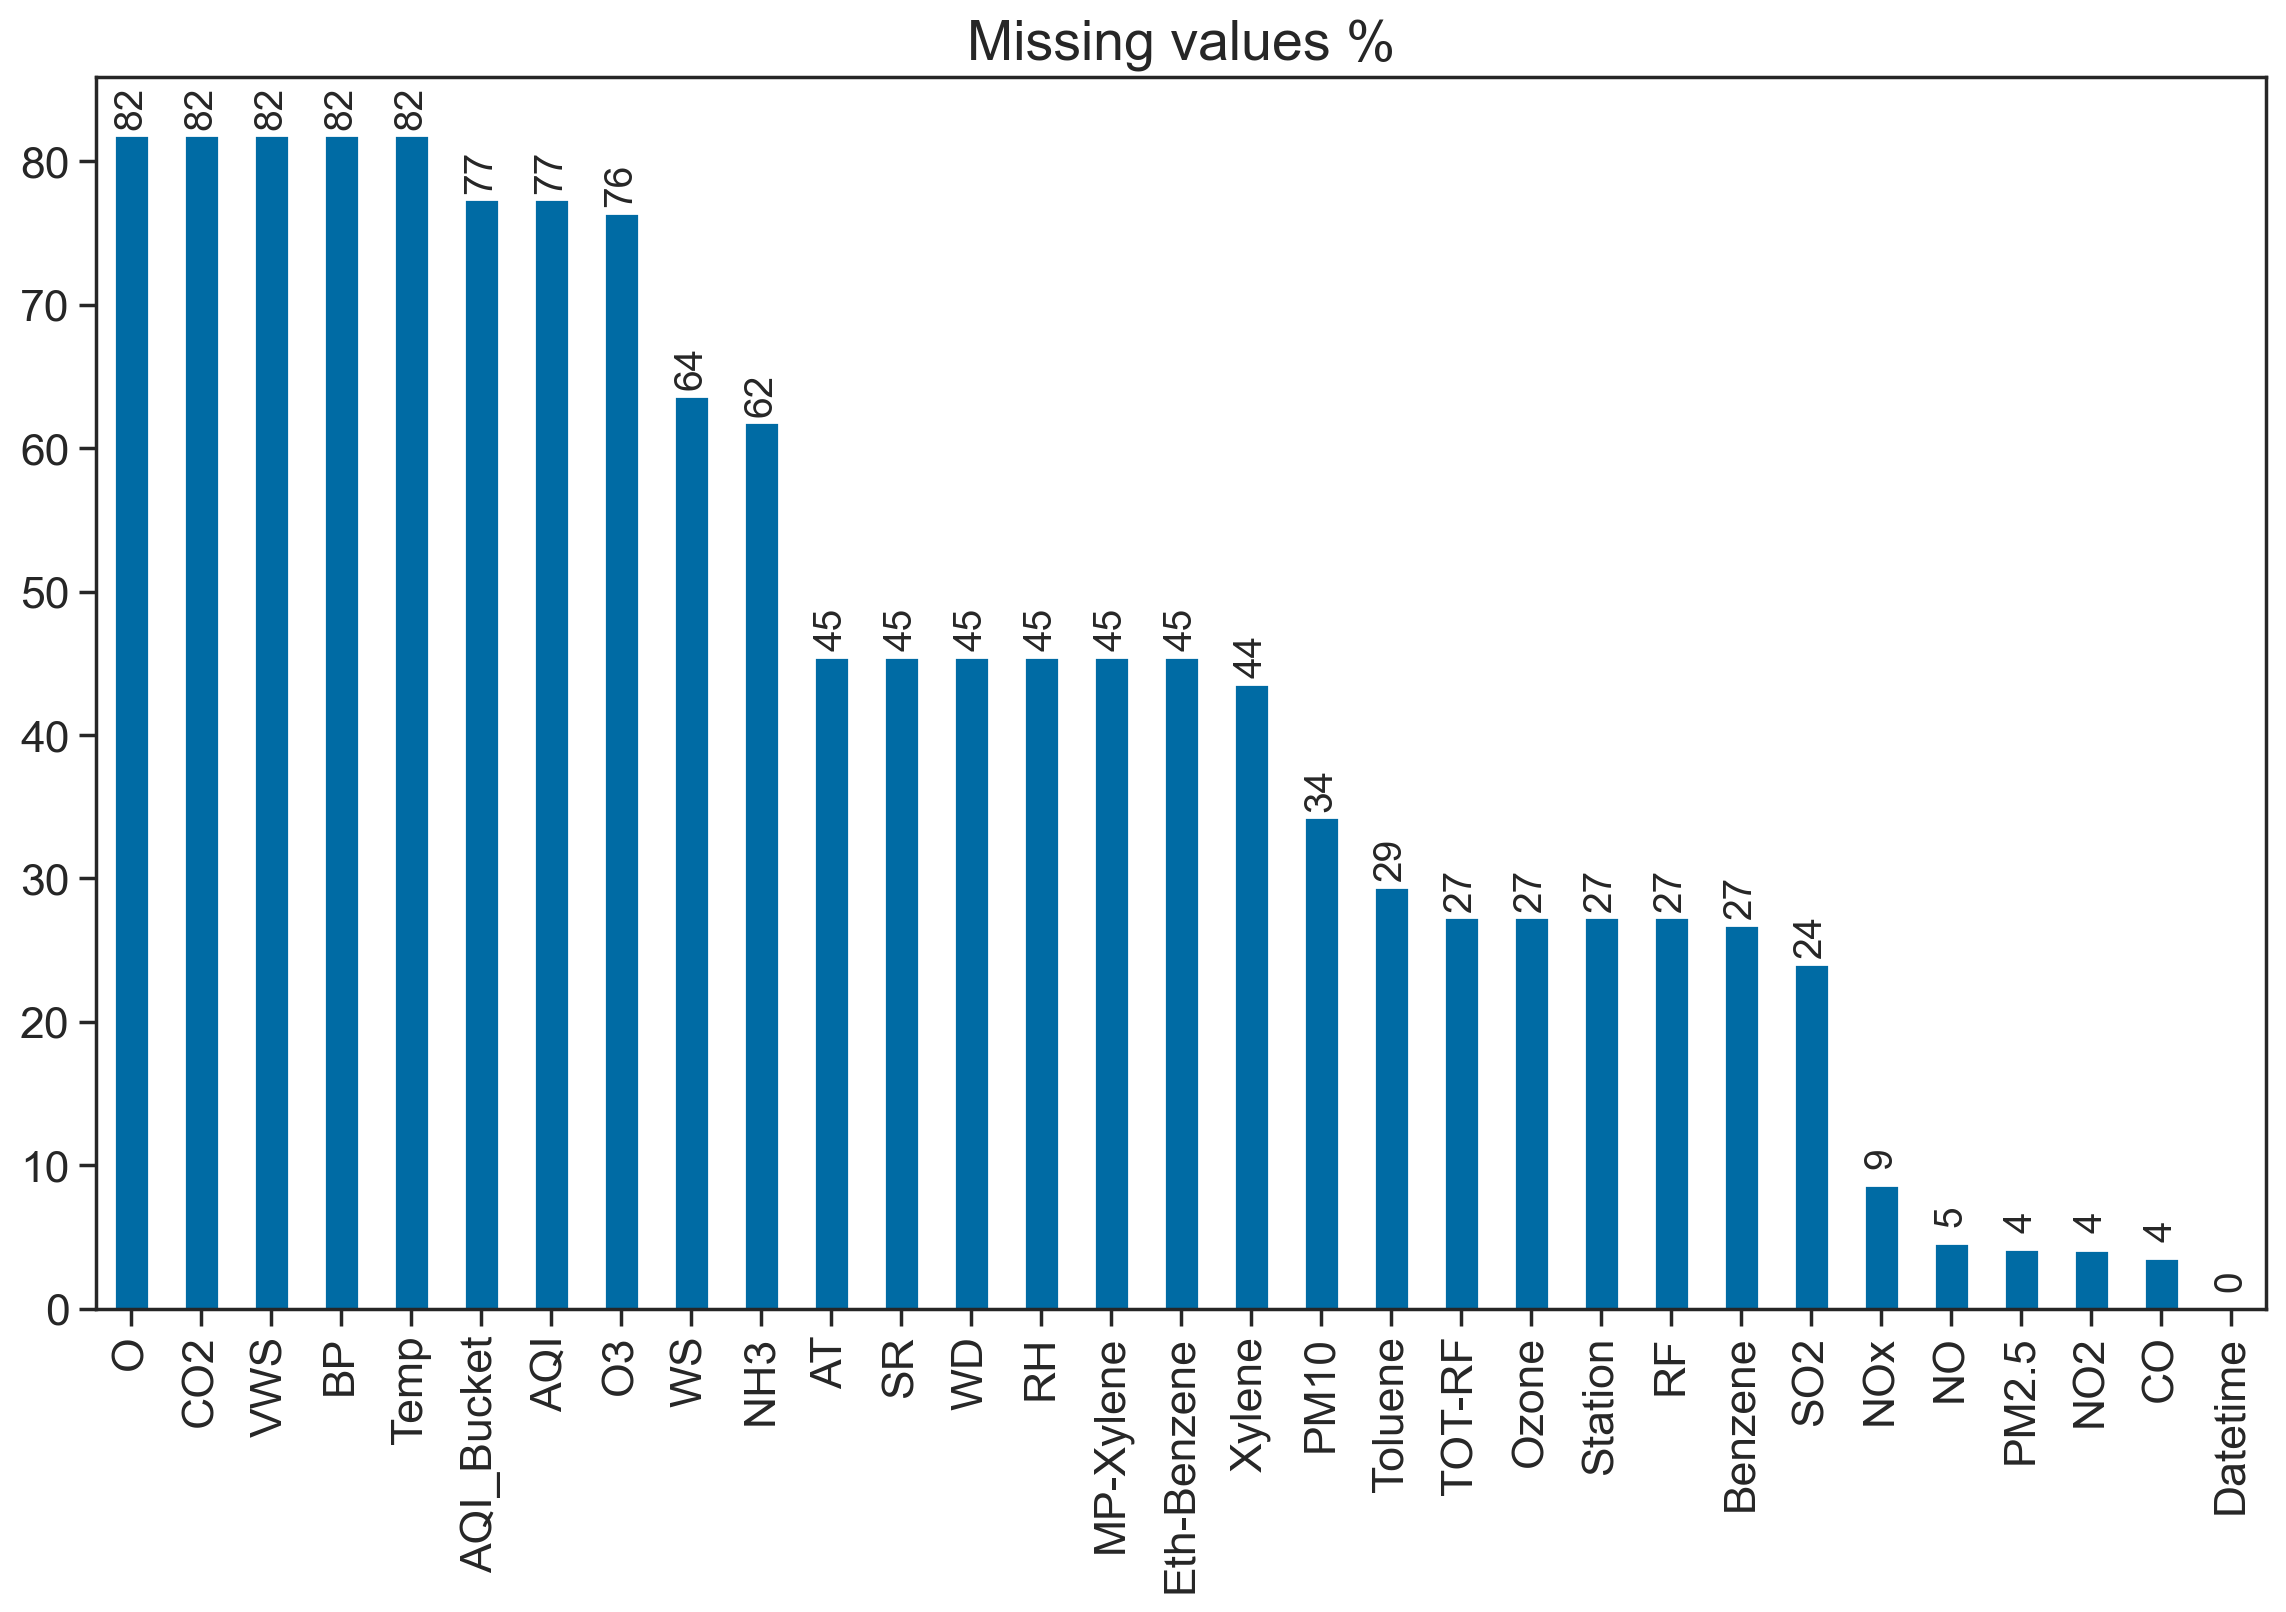

In [18]:
plt.figure(figsize=(14,8))
ax = df_describe_object['Missing %'].sort_values(ascending=False).plot.bar()
plt.title("Missing values %", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

for p in ax.patches:
        ax.annotate(round(p.get_height()),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center',
                    va='center',
                    fontsize=14,
                    rotation=90,
                    xytext=(0, 10),
                    textcoords='offset points')

In [19]:
px.bar(df_describe_object['Missing %'].sort_values(ascending=False),
       text_auto=True)

### 3. Data Cleaning

In [20]:
compiled = pd.read_csv('../../data/preprocessing_data/Gurugram_Hourly_Compiled.csv')
compiled

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_27142/1995461245.py:1: DtypeWarning:

Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,30) have mixed types. Specify dtype option on import or set low_memory=False.



Datetime      Station  PM2.5      NO    NO2     NOx    SO2  \
0          04-03-2020 00:00  Vikas Sadan  60.92  141.22  61.53  144.62   10.5   
1          04-03-2020 01:00  Vikas Sadan  56.88  177.38  56.39  170.94   5.64   
2          04-03-2020 02:00  Vikas Sadan  63.33  302.33  40.26  262.69    7.6   
3          04-03-2020 03:00  Vikas Sadan   67.6  377.93  29.18  317.53  10.53   
4          04-03-2020 04:00  Vikas Sadan  72.72   319.8  33.66  273.25   9.98   
...                     ...          ...    ...     ...    ...     ...    ...   
147526  2020-06-30 20:00:00          NaN  54.74    6.23  10.67    12.6   4.18   
147527  2020-06-30 21:00:00          NaN  54.37     6.3  10.28   11.88   4.03   
147528  2020-06-30 22:00:00          NaN  50.34    6.93  10.36   13.01   6.17   
147529  2020-06-30 23:00:00          NaN  53.23    6.64   10.3   12.75   6.31   
147530  2020-07-01 00:00:00          NaN  61.64    5.99  10.58   12.37   7.57   

          CO  Ozone Benzene  ... Xylene    AT    RF TOT-RF    PM10   NH3  CO2  \
0       3.01   5.08    2.04  ...    3.1  None  None    0.0     NaN   NaN  NaN   
1       5.38   6.15       2  ...   3.03  None  None    0.0     NaN   NaN  NaN   
2       1.85  12.72    2.02  ...   3.08  None  None    0.0     NaN   NaN  NaN   
3       1.31  11.46    1.96  ...   3.02  None  None    0.0     NaN   NaN  NaN   
4       0.63   4.76    2.01  ...   2.97  None  None    0.0     NaN   NaN  NaN   
...      ...    ...     ...  ...    ...   ...   ...    ...     ...   ...  ...   
147526   0.6    NaN    2.14  ...    4.7   NaN   NaN    NaN  135.42  2.95  NaN   
147527   1.2    NaN    1.87  ...   4.29   NaN   NaN    NaN  136.11  3.47  NaN   
147528   1.0    NaN    2.41  ...   4.59   NaN   NaN    NaN  147.32  3.76  NaN   
147529  0.86    NaN    2.54  ...   4.61   NaN   NaN    NaN  163.15  3.36  NaN   
147530  1.11    NaN    2.67  ...   4.73   NaN   NaN    NaN  174.08  2.91  NaN   

           O3    AQI AQI_Bucket  
0         NaN    NaN        NaN  
1         NaN    NaN        NaN  
2         NaN    NaN        NaN  
3         NaN    NaN        NaN  
4         NaN    NaN        NaN  
...       ...    ...        ...  
147526  70.95  154.0   Moderate  
147527  55.13  154.0   Moderate  
147528  42.60  155.0   Moderate  
147529  35.61  156.0   Moderate  
147530  44.14  157.0   Moderate  

[147531 rows x 31 columns]

In [21]:
# Convert object to float and string
schema = {
    "Datetime": str,
    "Station": str,
    "PM2.5": np.float64,
    "NO": np.float64,
    "NO2": np.float64,
    "NOx": np.float64,
    "SO2": np.float64,
    "CO": np.float64,
    "Ozone": np.float64,
    "Benzene": np.float64,
    "Toluene": np.float64,
    "Eth-Benzene": np.float64,
    "MP-Xylene": np.float64,
    "O": np.float64,
    "Temp": np.float64,
    "RH": np.float64,
    "WS": np.float64,
    "WD": np.float64,
    "SR": np.float64,
    "BP": np.float64,
    "VWS": np.float64,
    "Xylene": np.float64,
    "AT": np.float64,
    "RF": np.float64,
    "TOT-RF": np.float64,
    "PM10": np.float64,
    "NH3": np.float64,
    "CO2": np.float64,
    "O3": np.float64,
    "AQI": np.float64,
    "AQI_Bucket": str
}
compiled

Datetime      Station  PM2.5      NO    NO2     NOx    SO2  \
0          04-03-2020 00:00  Vikas Sadan  60.92  141.22  61.53  144.62   10.5   
1          04-03-2020 01:00  Vikas Sadan  56.88  177.38  56.39  170.94   5.64   
2          04-03-2020 02:00  Vikas Sadan  63.33  302.33  40.26  262.69    7.6   
3          04-03-2020 03:00  Vikas Sadan   67.6  377.93  29.18  317.53  10.53   
4          04-03-2020 04:00  Vikas Sadan  72.72   319.8  33.66  273.25   9.98   
...                     ...          ...    ...     ...    ...     ...    ...   
147526  2020-06-30 20:00:00          NaN  54.74    6.23  10.67    12.6   4.18   
147527  2020-06-30 21:00:00          NaN  54.37     6.3  10.28   11.88   4.03   
147528  2020-06-30 22:00:00          NaN  50.34    6.93  10.36   13.01   6.17   
147529  2020-06-30 23:00:00          NaN  53.23    6.64   10.3   12.75   6.31   
147530  2020-07-01 00:00:00          NaN  61.64    5.99  10.58   12.37   7.57   

          CO  Ozone Benzene  ... Xylene    AT    RF TOT-RF    PM10   NH3  CO2  \
0       3.01   5.08    2.04  ...    3.1  None  None    0.0     NaN   NaN  NaN   
1       5.38   6.15       2  ...   3.03  None  None    0.0     NaN   NaN  NaN   
2       1.85  12.72    2.02  ...   3.08  None  None    0.0     NaN   NaN  NaN   
3       1.31  11.46    1.96  ...   3.02  None  None    0.0     NaN   NaN  NaN   
4       0.63   4.76    2.01  ...   2.97  None  None    0.0     NaN   NaN  NaN   
...      ...    ...     ...  ...    ...   ...   ...    ...     ...   ...  ...   
147526   0.6    NaN    2.14  ...    4.7   NaN   NaN    NaN  135.42  2.95  NaN   
147527   1.2    NaN    1.87  ...   4.29   NaN   NaN    NaN  136.11  3.47  NaN   
147528   1.0    NaN    2.41  ...   4.59   NaN   NaN    NaN  147.32  3.76  NaN   
147529  0.86    NaN    2.54  ...   4.61   NaN   NaN    NaN  163.15  3.36  NaN   
147530  1.11    NaN    2.67  ...   4.73   NaN   NaN    NaN  174.08  2.91  NaN   

           O3    AQI AQI_Bucket  
0         NaN    NaN        NaN  
1         NaN    NaN        NaN  
2         NaN    NaN        NaN  
3         NaN    NaN        NaN  
4         NaN    NaN        NaN  
...       ...    ...        ...  
147526  70.95  154.0   Moderate  
147527  55.13  154.0   Moderate  
147528  42.60  155.0   Moderate  
147529  35.61  156.0   Moderate  
147530  44.14  157.0   Moderate  

[147531 rows x 31 columns]

In [22]:
# We have None in columns.
compiled.replace(to_replace=['None'], value=np.nan, inplace=True)
compiled

Datetime      Station  PM2.5      NO    NO2     NOx    SO2  \
0          04-03-2020 00:00  Vikas Sadan  60.92  141.22  61.53  144.62   10.5   
1          04-03-2020 01:00  Vikas Sadan  56.88  177.38  56.39  170.94   5.64   
2          04-03-2020 02:00  Vikas Sadan  63.33  302.33  40.26  262.69    7.6   
3          04-03-2020 03:00  Vikas Sadan   67.6  377.93  29.18  317.53  10.53   
4          04-03-2020 04:00  Vikas Sadan  72.72   319.8  33.66  273.25   9.98   
...                     ...          ...    ...     ...    ...     ...    ...   
147526  2020-06-30 20:00:00          NaN  54.74    6.23  10.67    12.6   4.18   
147527  2020-06-30 21:00:00          NaN  54.37     6.3  10.28   11.88   4.03   
147528  2020-06-30 22:00:00          NaN  50.34    6.93  10.36   13.01   6.17   
147529  2020-06-30 23:00:00          NaN  53.23    6.64   10.3   12.75   6.31   
147530  2020-07-01 00:00:00          NaN  61.64    5.99  10.58   12.37   7.57   

          CO  Ozone Benzene  ... Xylene   AT   RF TOT-RF    PM10   NH3 CO2  \
0       3.01   5.08    2.04  ...    3.1  NaN  NaN    0.0     NaN   NaN NaN   
1       5.38   6.15       2  ...   3.03  NaN  NaN    0.0     NaN   NaN NaN   
2       1.85  12.72    2.02  ...   3.08  NaN  NaN    0.0     NaN   NaN NaN   
3       1.31  11.46    1.96  ...   3.02  NaN  NaN    0.0     NaN   NaN NaN   
4       0.63   4.76    2.01  ...   2.97  NaN  NaN    0.0     NaN   NaN NaN   
...      ...    ...     ...  ...    ...  ...  ...    ...     ...   ...  ..   
147526   0.6    NaN    2.14  ...    4.7  NaN  NaN    NaN  135.42  2.95 NaN   
147527   1.2    NaN    1.87  ...   4.29  NaN  NaN    NaN  136.11  3.47 NaN   
147528   1.0    NaN    2.41  ...   4.59  NaN  NaN    NaN  147.32  3.76 NaN   
147529  0.86    NaN    2.54  ...   4.61  NaN  NaN    NaN  163.15  3.36 NaN   
147530  1.11    NaN    2.67  ...   4.73  NaN  NaN    NaN  174.08  2.91 NaN   

           O3    AQI AQI_Bucket  
0         NaN    NaN        NaN  
1         NaN    NaN        NaN  
2         NaN    NaN        NaN  
3         NaN    NaN        NaN  
4         NaN    NaN        NaN  
...       ...    ...        ...  
147526  70.95  154.0   Moderate  
147527  55.13  154.0   Moderate  
147528  42.60  155.0   Moderate  
147529  35.61  156.0   Moderate  
147530  44.14  157.0   Moderate  

[147531 rows x 31 columns]

In [23]:
compiled.dtypes
compiled = compiled.astype(schema)
compiled.dtypes

Datetime        object
Station         object
PM2.5           object
NO              object
NO2             object
NOx             object
SO2             object
CO              object
Ozone           object
Benzene         object
Toluene         object
Eth-Benzene     object
MP-Xylene       object
O               object
Temp            object
RH              object
WS              object
WD              object
SR              object
BP              object
VWS             object
Xylene          object
AT              object
RF              object
TOT-RF         float64
PM10            object
NH3             object
CO2            float64
O3             float64
AQI            float64
AQI_Bucket      object
dtype: object

Datetime        object
Station         object
PM2.5          float64
NO             float64
NO2            float64
NOx            float64
SO2            float64
CO             float64
Ozone          float64
Benzene        float64
Toluene        float64
Eth-Benzene    float64
MP-Xylene      float64
O              float64
Temp           float64
RH             float64
WS             float64
WD             float64
SR             float64
BP             float64
VWS            float64
Xylene         float64
AT             float64
RF             float64
TOT-RF         float64
PM10           float64
NH3            float64
CO2            float64
O3             float64
AQI            float64
AQI_Bucket      object
dtype: object

In [24]:
compiled['Station'].value_counts(dropna=False)
compiled['Station'].isna().sum()

nan            40258
Sector 51      26825
Vikas Sadan    26816
NISE           26816
Teri Gram      26816
Name: Station, dtype: int64

0

In [25]:
compiled['Station'].replace(to_replace=['nan'], value="No Station", inplace=True)
compiled

Datetime      Station  PM2.5      NO    NO2     NOx    SO2  \
0          04-03-2020 00:00  Vikas Sadan  60.92  141.22  61.53  144.62  10.50   
1          04-03-2020 01:00  Vikas Sadan  56.88  177.38  56.39  170.94   5.64   
2          04-03-2020 02:00  Vikas Sadan  63.33  302.33  40.26  262.69   7.60   
3          04-03-2020 03:00  Vikas Sadan  67.60  377.93  29.18  317.53  10.53   
4          04-03-2020 04:00  Vikas Sadan  72.72  319.80  33.66  273.25   9.98   
...                     ...          ...    ...     ...    ...     ...    ...   
147526  2020-06-30 20:00:00   No Station  54.74    6.23  10.67   12.60   4.18   
147527  2020-06-30 21:00:00   No Station  54.37    6.30  10.28   11.88   4.03   
147528  2020-06-30 22:00:00   No Station  50.34    6.93  10.36   13.01   6.17   
147529  2020-06-30 23:00:00   No Station  53.23    6.64  10.30   12.75   6.31   
147530  2020-07-01 00:00:00   No Station  61.64    5.99  10.58   12.37   7.57   

          CO  Ozone  Benzene  ...  Xylene  AT  RF  TOT-RF    PM10   NH3  CO2  \
0       3.01   5.08     2.04  ...    3.10 NaN NaN     0.0     NaN   NaN  NaN   
1       5.38   6.15     2.00  ...    3.03 NaN NaN     0.0     NaN   NaN  NaN   
2       1.85  12.72     2.02  ...    3.08 NaN NaN     0.0     NaN   NaN  NaN   
3       1.31  11.46     1.96  ...    3.02 NaN NaN     0.0     NaN   NaN  NaN   
4       0.63   4.76     2.01  ...    2.97 NaN NaN     0.0     NaN   NaN  NaN   
...      ...    ...      ...  ...     ...  ..  ..     ...     ...   ...  ...   
147526  0.60    NaN     2.14  ...    4.70 NaN NaN     NaN  135.42  2.95  NaN   
147527  1.20    NaN     1.87  ...    4.29 NaN NaN     NaN  136.11  3.47  NaN   
147528  1.00    NaN     2.41  ...    4.59 NaN NaN     NaN  147.32  3.76  NaN   
147529  0.86    NaN     2.54  ...    4.61 NaN NaN     NaN  163.15  3.36  NaN   
147530  1.11    NaN     2.67  ...    4.73 NaN NaN     NaN  174.08  2.91  NaN   

           O3    AQI  AQI_Bucket  
0         NaN    NaN         nan  
1         NaN    NaN         nan  
2         NaN    NaN         nan  
3         NaN    NaN         nan  
4         NaN    NaN         nan  
...       ...    ...         ...  
147526  70.95  154.0    Moderate  
147527  55.13  154.0    Moderate  
147528  42.60  155.0    Moderate  
147529  35.61  156.0    Moderate  
147530  44.14  157.0    Moderate  

[147531 rows x 31 columns]

In [26]:
compiled['Station'] .unique()

array(['Vikas Sadan', 'Sector 51', 'NISE', 'Teri Gram', 'No Station'],
      dtype=object)

In [27]:
len(['Datetime', 'Station', 'PM2.5', 'NO', 'NO2', 'NOx', 'SO2', 'CO',
       'Ozone', 'Benzene', 'Toluene', 'Eth-Benzene', 'MP-Xylene', 'O', 'Temp',
       'RH', 'WS', 'WD', 'SR', 'BP', 'VWS', 'Xylene'])

22

<AxesSubplot: >

Text(0.5, 1.0, 'Total missing values by station')

Text(0.5, 0, 'Column')

Text(0, 0.5, 'Count')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Datetime'),
  Text(1, 0, 'Station'),
  Text(2, 0, 'PM2.5'),
  Text(3, 0, 'NO'),
  Text(4, 0, 'NO2'),
  Text(5, 0, 'NOx'),
  Text(6, 0, 'SO2'),
  Text(7, 0, 'CO'),
  Text(8, 0, 'Ozone'),
  Text(9, 0, 'Benzene'),
  Text(10, 0, 'Toluene'),
  Text(11, 0, 'Eth-Benzene'),
  Text(12, 0, 'MP-Xylene'),
  Text(13, 0, 'O'),
  Text(14, 0, 'Temp'),
  Text(15, 0, 'RH'),
  Text(16, 0, 'WS'),
  Text(17, 0, 'WD'),
  Text(18, 0, 'SR'),
  Text(19, 0, 'BP'),
  Text(20, 0, 'VWS'),
  Text(21, 0, 'Xylene'),
  Text(22, 0, 'AT'),
  Text(23, 0, 'RF'),
  Text(24, 0, 'TOT-RF'),
  Text(25, 0, 'PM10'),
  Text(26, 0, 'NH3'),
  Text(27, 0, 'CO2'),
  Text(28, 0, 'O3'),
  Text(29, 0, 'AQI'),
  Text(30, 0, 'AQI_Bucket')])

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 [Text(0, 0.0, '0'),
  Text(0, 20000.0, '20000'),
  Text(0, 40000.0, '40000'),
  Text(0, 60000.0, '60000'),
  Text(0, 80000.0, '80000'),
  Text(0, 100000.0, '100000'),
  Text(0, 120000.0, '120000'),
  Text(0, 140000.0, '140000'),
  Text(0, 160000.0, '160000')])

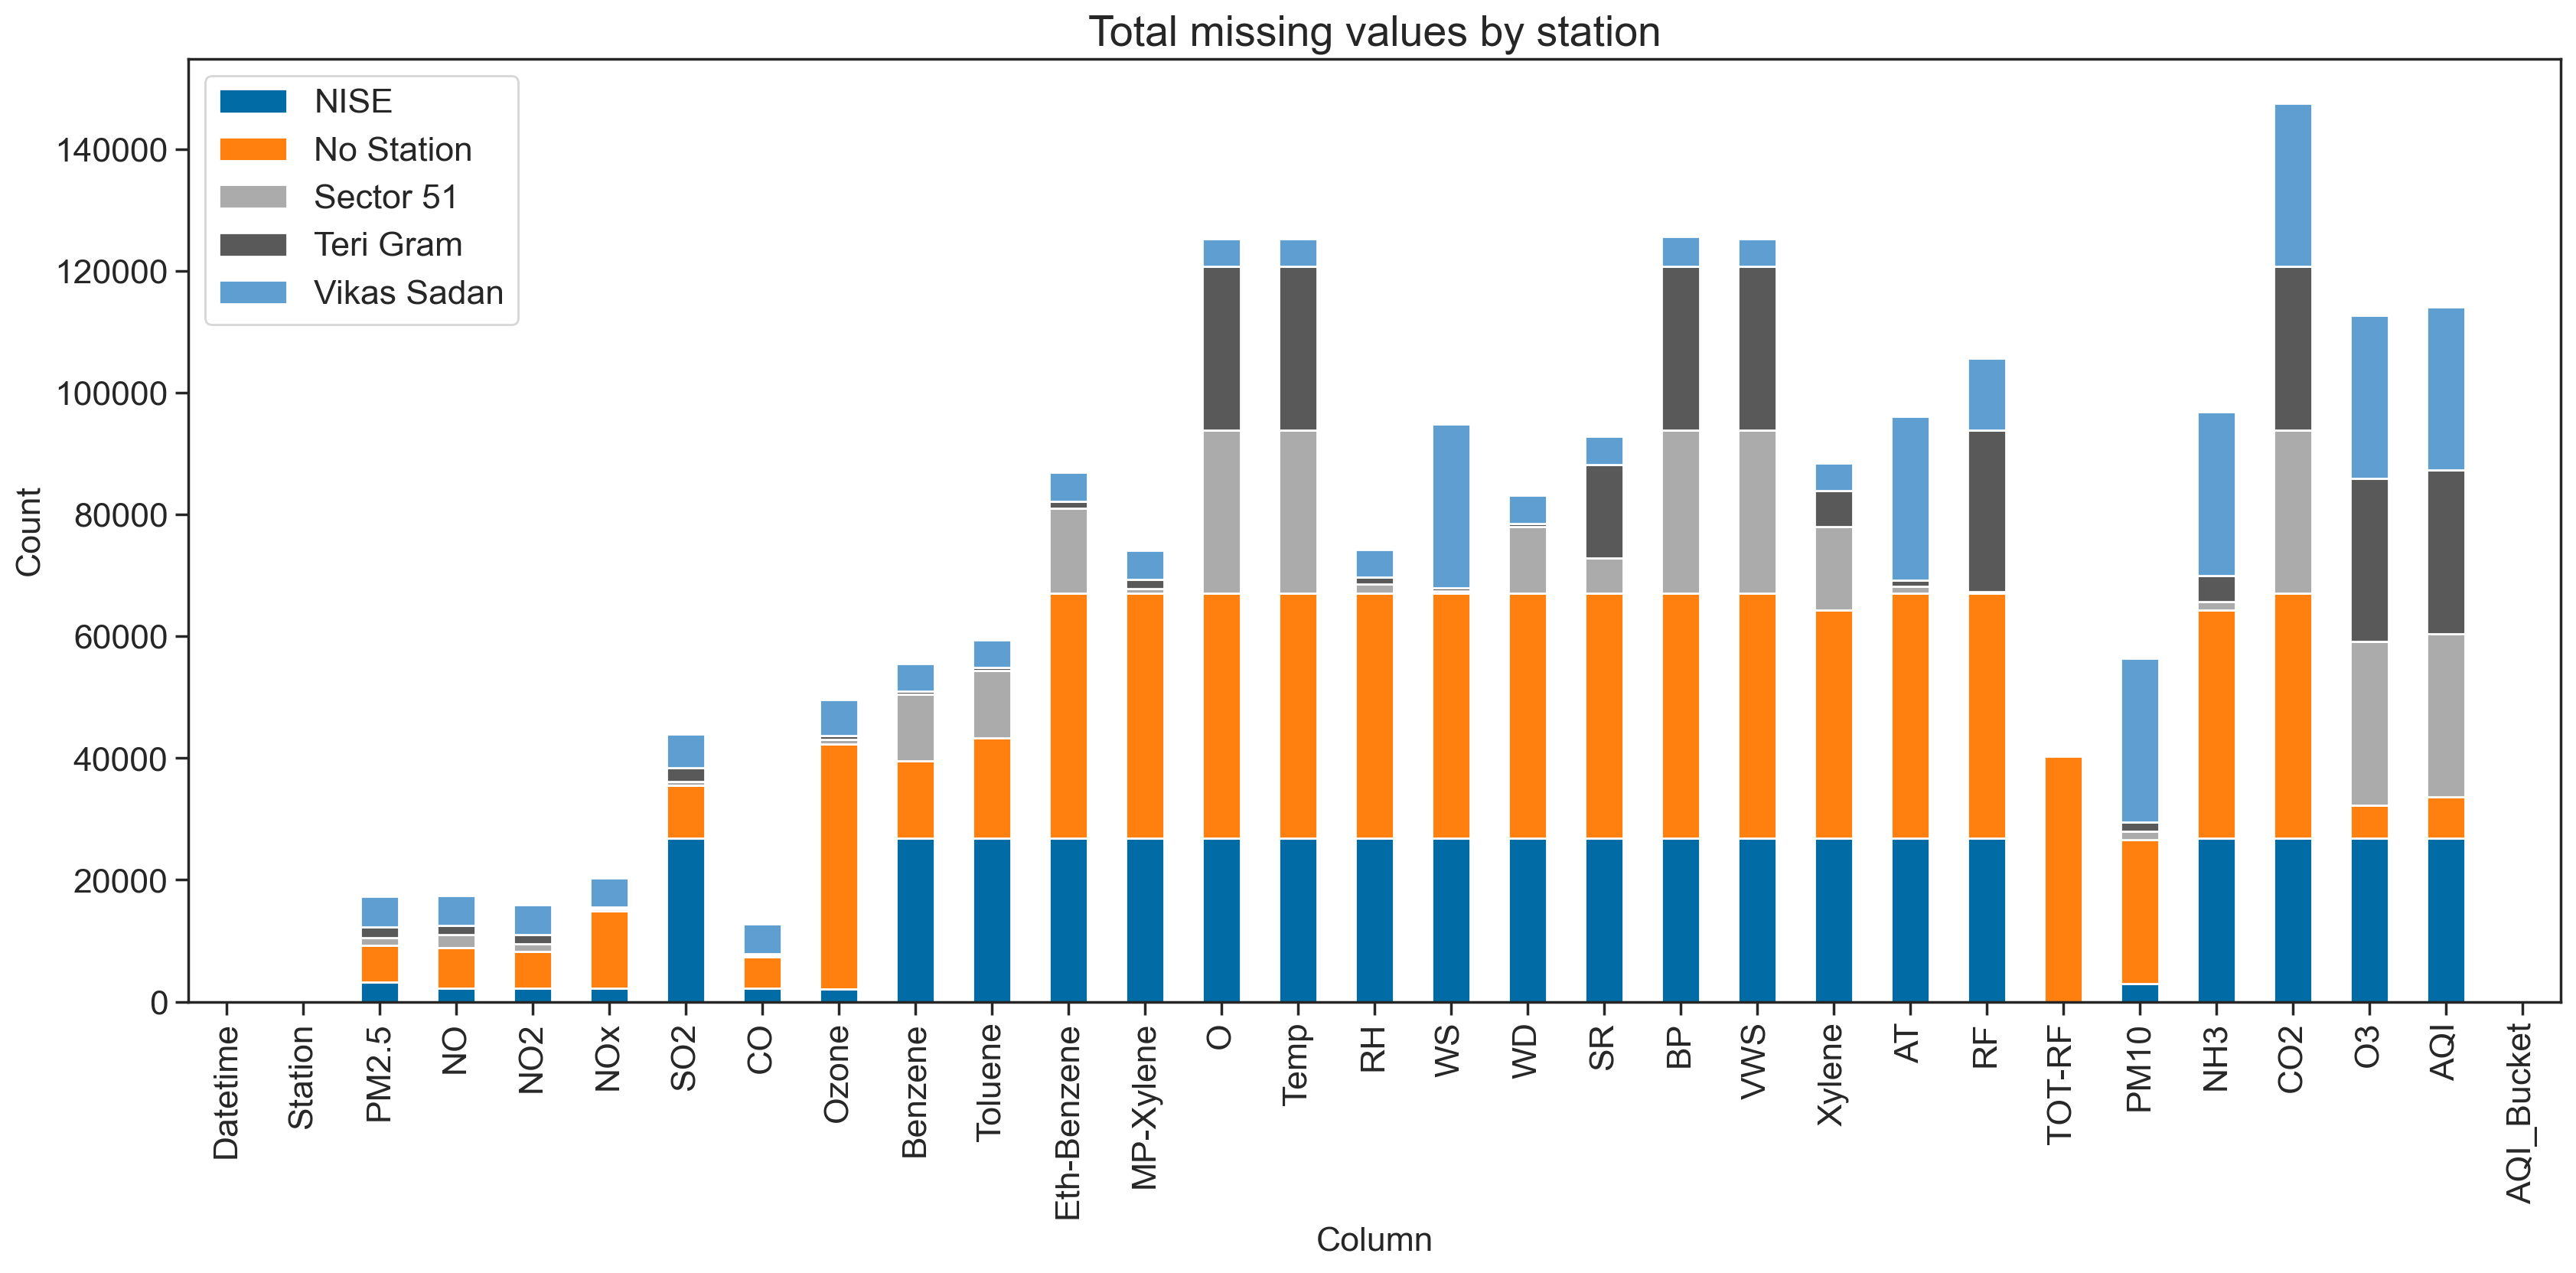

In [28]:
compiled.groupby(['Station']).apply(lambda x: x.isnull().sum() + (x == "None").sum()).T.plot.bar(figsize=(20,8), stacked=True)
plt.title("Total missing values by station", fontsize=20)
plt.xlabel("Column", fontsize=16)
plt.ylabel("Count", fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(loc='upper left', fontsize=16)

In [114]:
px.bar(compiled.groupby(
    ['Station']).apply(lambda x: x.isnull().sum() + (x == "None").sum() ).T,
       text_auto=True,
       title='Total missing values by station',
       labels={
           "x": "Column",
           "y": "Count"
       })

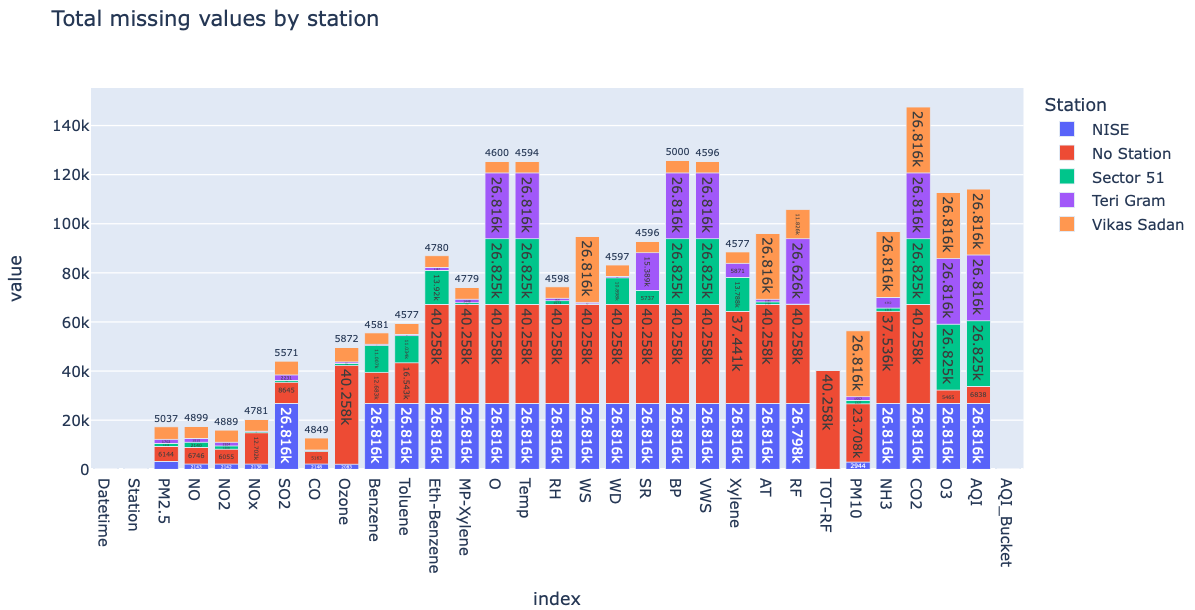

Text(0.5, 1.0, 'Percentage of missing values by station')

Text(0.5, 0, 'Column')

Text(0, 0.5, 'Percentage')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Datetime'),
  Text(1, 0, 'Station'),
  Text(2, 0, 'PM2.5'),
  Text(3, 0, 'NO'),
  Text(4, 0, 'NO2'),
  Text(5, 0, 'NOx'),
  Text(6, 0, 'SO2'),
  Text(7, 0, 'CO'),
  Text(8, 0, 'Ozone'),
  Text(9, 0, 'Benzene'),
  Text(10, 0, 'Toluene'),
  Text(11, 0, 'Eth-Benzene'),
  Text(12, 0, 'MP-Xylene'),
  Text(13, 0, 'O'),
  Text(14, 0, 'Temp'),
  Text(15, 0, 'RH'),
  Text(16, 0, 'WS'),
  Text(17, 0, 'WD'),
  Text(18, 0, 'SR'),
  Text(19, 0, 'BP'),
  Text(20, 0, 'VWS'),
  Text(21, 0, 'Xylene'),
  Text(22, 0, 'AT'),
  Text(23, 0, 'RF'),
  Text(24, 0, 'TOT-RF'),
  Text(25, 0, 'PM10'),
  Text(26, 0, 'NH3'),
  Text(27, 0, 'CO2'),
  Text(28, 0, 'O3'),
  Text(29, 0, 'AQI'),
  Text(30, 0, 'AQI_Bucket')])

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120')])

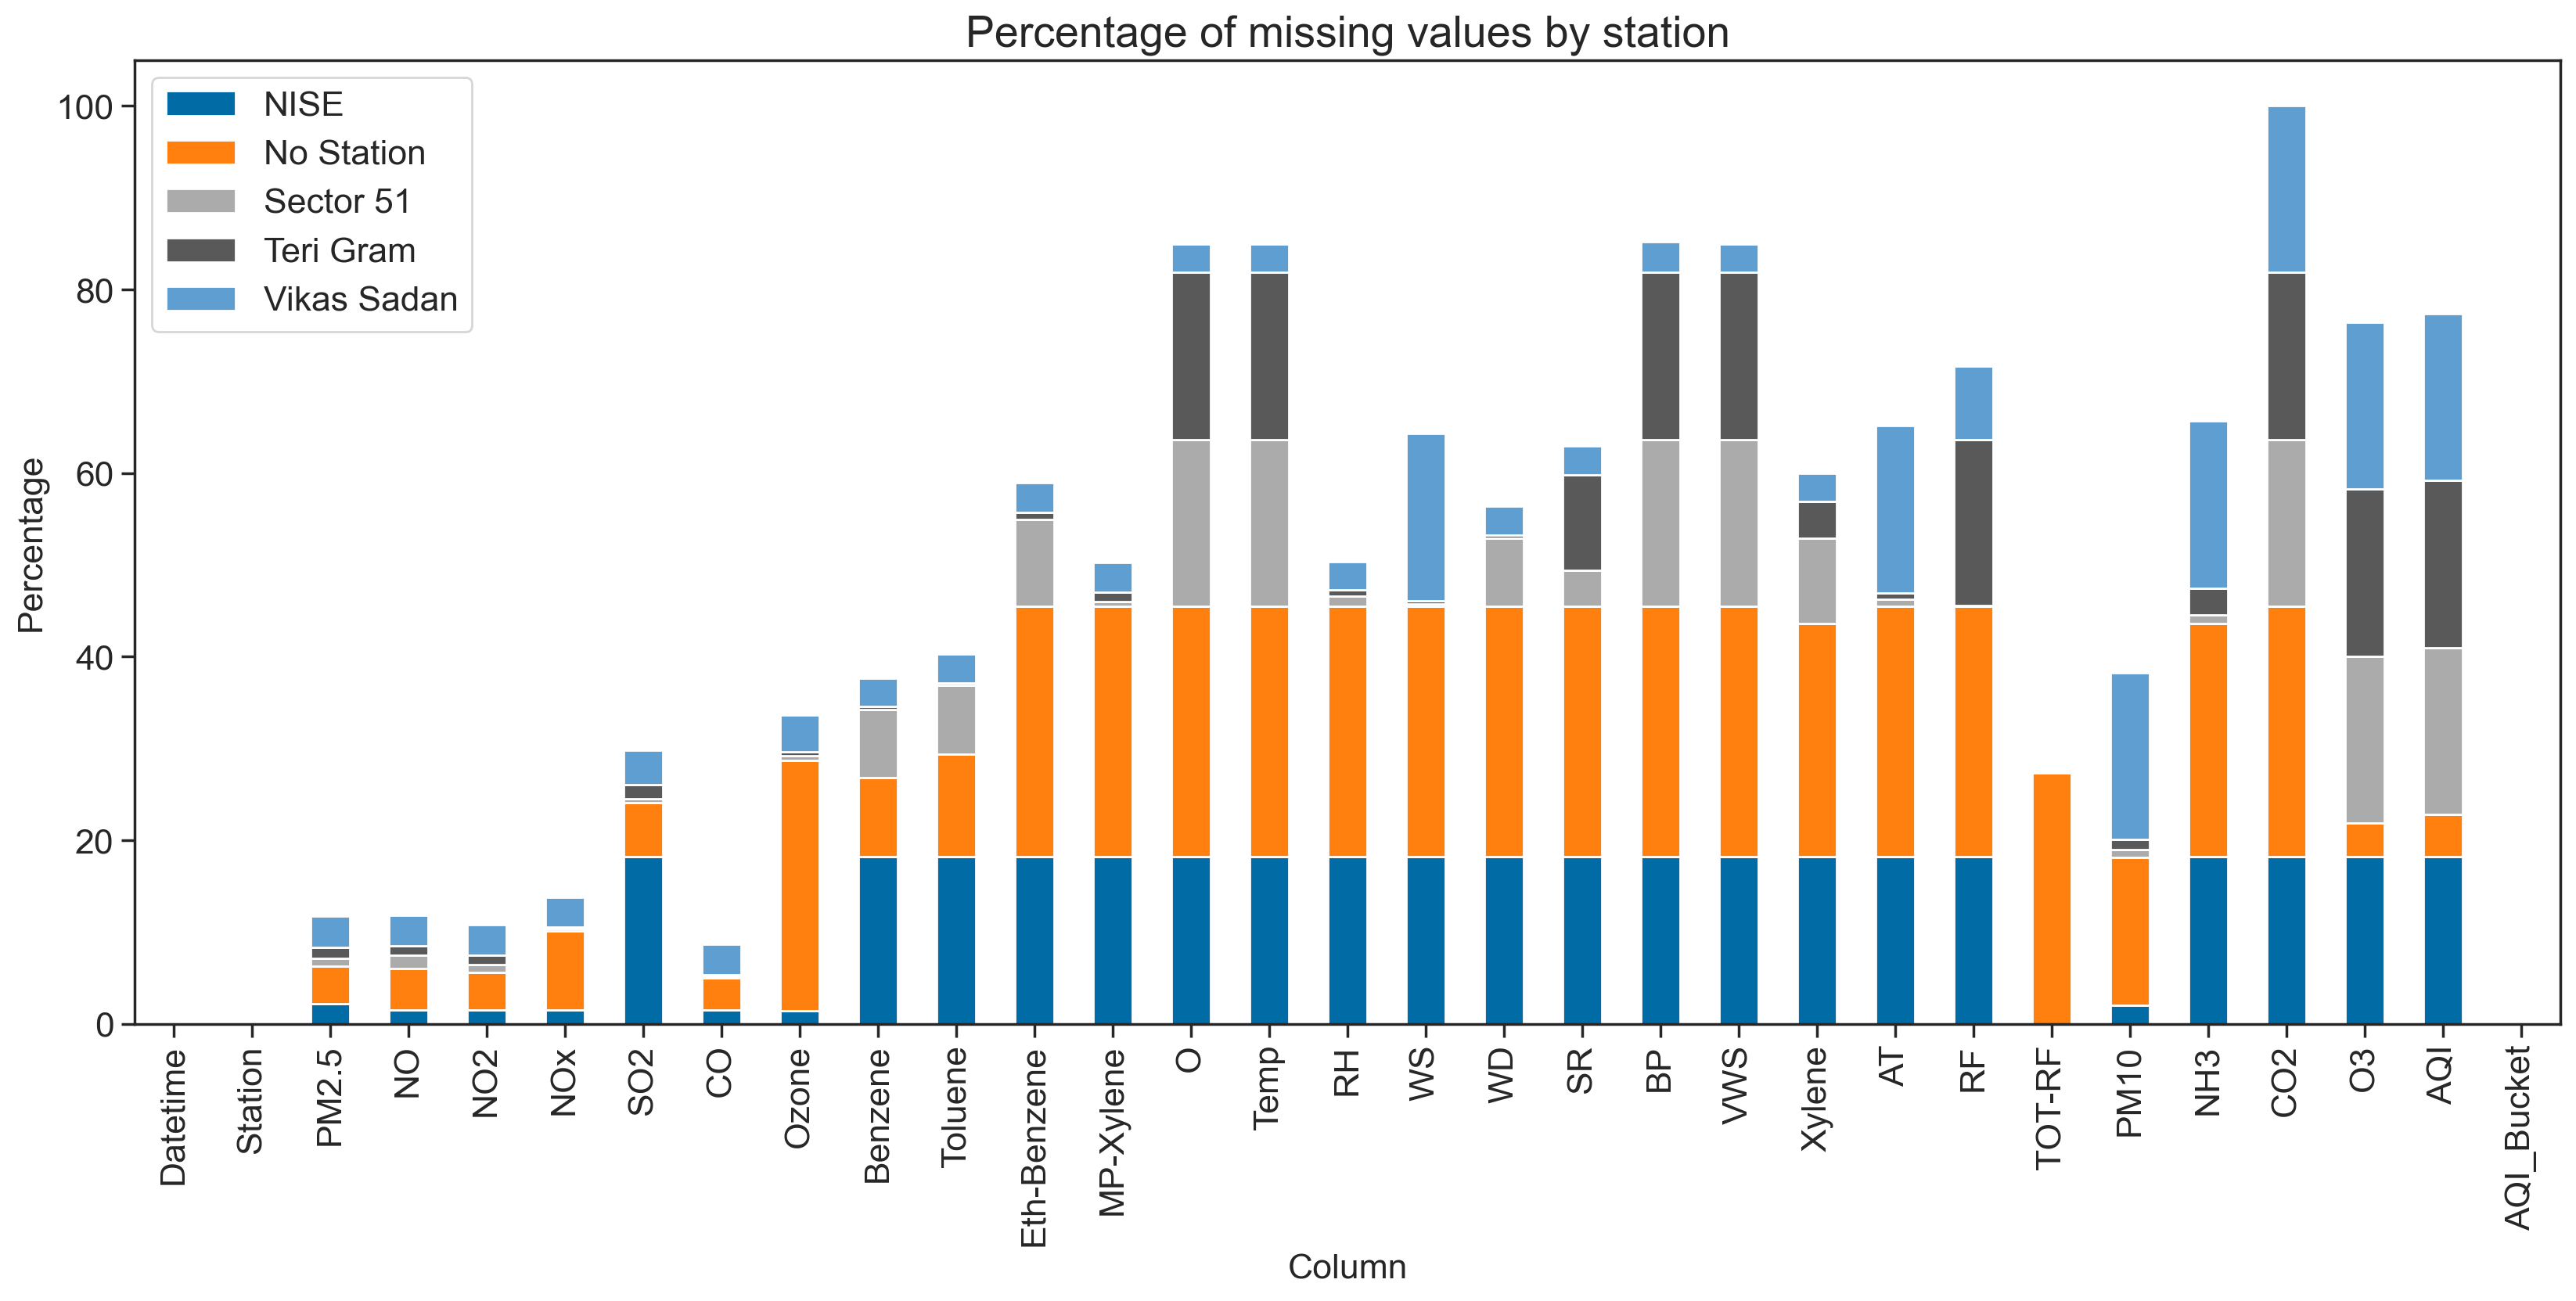

In [29]:
ax = compiled.groupby(['Station']).apply(lambda x: round((
    (x.isnull().sum() + (x == "None").sum()) / compiled.shape[0]) * 100, 2)).T.plot.bar(figsize=(20,8), stacked=True)
plt.title("Percentage of missing values by station", fontsize=20)
plt.xlabel("Column", fontsize=16)
plt.ylabel("Percentage", fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(loc='upper left', fontsize=16)

In [156]:
px.bar(compiled.groupby(['Station']).apply(lambda x: round((
    (x.isnull().sum() + (x == "None").sum()) / compiled.shape[0]) * 100, 2)).T,
       text_auto=True,
       title='Percentage of missing values by station',
       labels={
           "x": "Column",
           "y": "Percentage"
       })

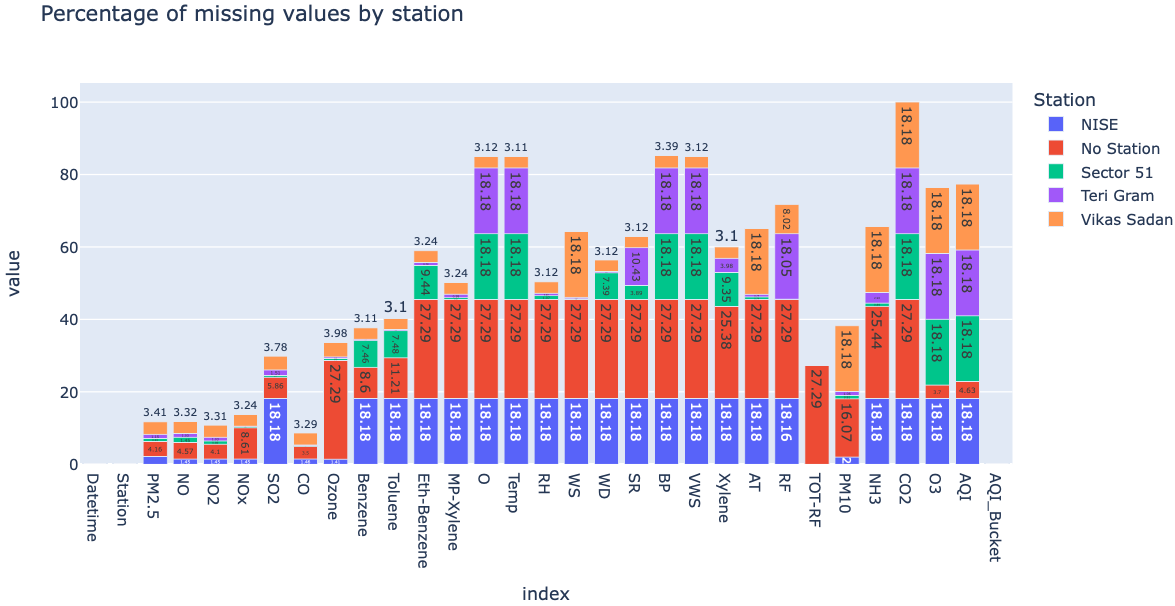

- Columns to take average (fill NISE)
    - SO2
- Columns to remove
    - Benzene,Toulene, Eth-Benzene, MP_Xylene, O, Temp, RH, WS, WD, SR, BP, VWS, Xylene, AT,RF, NH3, CO2, O3
- Columns to compute
    - AQI and bucket

In [30]:
compiled.apply(lambda x : round(((x.isnull().sum() + (x=="None").sum())/compiled.shape[0])*100, 2)).sort_values(ascending=False)

CO2            100.00
BP              85.21
O               84.94
VWS             84.94
Temp            84.94
AQI             77.35
O3              76.42
RF              71.66
NH3             65.64
AT              65.13
WS              64.28
SR              62.90
Xylene          59.98
Eth-Benzene     58.93
WD              56.38
RH              50.34
MP-Xylene       50.20
Toluene         40.27
PM10            38.20
Benzene         37.63
Ozone           33.62
SO2             29.82
TOT-RF          27.29
NOx             13.77
NO              11.82
PM2.5           11.70
NO2             10.79
CO               8.61
Datetime         0.00
Station          0.00
AQI_Bucket       0.00
dtype: float64

In [31]:
# Lets compare NISE with average of other 3 stations

# SO2, MP_Xylene, RH

compiled.groupby(["Station"]).SO2.count()
compiled.groupby(["Station"])["MP-Xylene"].count()
compiled.groupby(["Station"]).RH.count()

Station
NISE               0
No Station     31613
Sector 51      26092
Teri Gram      24585
Vikas Sadan    21245
Name: SO2, dtype: int64

Station
NISE               0
No Station         0
Sector 51      26065
Teri Gram      25368
Vikas Sadan    22037
Name: MP-Xylene, dtype: int64

Station
NISE               0
No Station         0
Sector 51      25252
Teri Gram      25791
Vikas Sadan    22218
Name: RH, dtype: int64

In [32]:
# We see that SO2, MP_Xylene, RH is completely absent in NISE. So we can take average after filling NaNs
# Let us check if NISE is really average of other 3 stations NO, NO2, NOx

compiled.groupby(["Station"])["NO"].mean()
print("NISE NO value", compiled.groupby(["Station"])["NO"].mean()[0])
print("Other stations average NO value", compiled.groupby(["Station"])["NO"].mean()[1:].values.mean())

Station
NISE            9.795104
No Station     17.923547
Sector 51      14.548590
Teri Gram      12.234311
Vikas Sadan    19.851806
Name: NO, dtype: float64

NISE NO value 9.795103554492766
Other stations average NO value 16.139563469563395


In [33]:
compiled.groupby(["Station"])["NO2"].mean()
print("NISE NO2 value", compiled.groupby(["Station"])["NO2"].mean()[0])
print("Other stations average NO2 value", compiled.groupby(["Station"])["NO2"].mean()[1:].values.mean())

Station
NISE           21.655308
No Station     23.117616
Sector 51      18.307624
Teri Gram      16.427935
Vikas Sadan    28.926956
Name: NO2, dtype: float64

NISE NO2 value 21.655308016535624
Other stations average NO2 value 21.695032789631558


In [34]:
compiled.groupby(["Station"])["PM2.5"].mean()
print("NISE PM2.5 value", compiled.groupby(["Station"])["PM2.5"].mean()[0])
print("Other stations average PM2.5 value", compiled.groupby(["Station"])["PM2.5"].mean()[1:].values.mean())

Station
NISE            79.544378
No Station     114.449409
Sector 51      105.474428
Teri Gram       86.103672
Vikas Sadan     93.782973
Name: PM2.5, dtype: float64

NISE PM2.5 value 79.54437785291631
Other stations average PM2.5 value 99.95262038447153


In [35]:
compiled.groupby(["Station"])["NOx"].mean()
print("NISE NOx value", compiled.groupby(["Station"])["NOx"].mean()[0])
print("Other stations average NOx value", compiled.groupby(["Station"])["NOx"].mean()[1:].values.mean())

Station
NISE           30.216896
No Station     30.032255
Sector 51      15.634916
Teri Gram      19.873615
Vikas Sadan    32.722258
Name: NOx, dtype: float64

NISE NOx value 30.216896020747228
Other stations average NOx value 24.565761254063396


In [36]:
# We see the average is a good way to fill NISE station's missing values for 
# SO2. But it should be filled in such a way that, on a day, if SO2 is absent in NISE, that day's
# other 3 station's SO2 average should be filled.

compiled.groupby(["Station"]).SO2.count()
compiled.groupby(["Station"])["MP-Xylene"].count()
compiled.groupby(["Station"]).RH.count()

Station
NISE               0
No Station     31613
Sector 51      26092
Teri Gram      24585
Vikas Sadan    21245
Name: SO2, dtype: int64

Station
NISE               0
No Station         0
Sector 51      26065
Teri Gram      25368
Vikas Sadan    22037
Name: MP-Xylene, dtype: int64

Station
NISE               0
No Station         0
Sector 51      25252
Teri Gram      25791
Vikas Sadan    22218
Name: RH, dtype: int64

In [37]:
# Before filling NISE with mean, we should ensure that other stations should not have any missing values.

In [38]:
compiled[['Station', 'SO2']]
# compiled.groupby(["Station"]).SO2.sum()

Station    SO2
0       Vikas Sadan  10.50
1       Vikas Sadan   5.64
2       Vikas Sadan   7.60
3       Vikas Sadan  10.53
4       Vikas Sadan   9.98
...             ...    ...
147526   No Station   4.18
147527   No Station   4.03
147528   No Station   6.17
147529   No Station   6.31
147530   No Station   7.57

[147531 rows x 2 columns]

In [39]:
compiled['SO2'].describe()

count    103535.000000
mean          7.818233
std           9.874812
min           0.010000
25%           2.490000
50%           4.960000
75%           9.310000
max         199.370000
Name: SO2, dtype: float64

In [40]:
compiled[compiled['SO2'] > 19.31].sort_values(['SO2'])

Datetime      Station   PM2.5      NO    NO2     NOx  \
19410      21-05-2022 18:00  Vikas Sadan   76.40   19.57  16.46   11.93   
146460  2020-05-17 10:00:00   No Station  124.93   24.48  29.94   35.05   
23891      24-11-2022 11:00  Vikas Sadan   92.19   18.74  16.06   32.54   
27129      17-03-2020 01:00    Sector 51  250.68   12.64  30.74   26.20   
132746  2018-10-24 00:00:00   No Station  146.68  136.81  59.31  146.18   
...                     ...          ...     ...     ...    ...     ...   
28903      29-05-2020 23:00    Sector 51   29.86     NaN  13.95    4.86   
28902      29-05-2020 22:00    Sector 51     NaN     NaN  13.23    4.36   
28901      29-05-2020 21:00    Sector 51     NaN    0.18  12.98    4.87   
28947      31-05-2020 19:00    Sector 51   22.44     NaN    NaN    0.00   
28900      29-05-2020 20:00    Sector 51   27.25     NaN    NaN    0.00   

           SO2    CO  Ozone  Benzene  ...  Xylene     AT   RF  TOT-RF    PM10  \
19410    19.32  0.51  43.33     3.27  ...    3.64    NaN  0.0     0.0     NaN   
146460   19.32  0.85    NaN     7.25  ...    2.38    NaN  NaN     NaN  191.35   
23891    19.32  0.78  18.88     2.10  ...    0.51    NaN  0.0     0.0     NaN   
27129    19.32  1.10  10.74     8.33  ...   25.94  18.06  0.0     0.0  382.46   
132746   19.32  1.40    NaN    11.16  ...     NaN    NaN  NaN     NaN  374.83   
...        ...   ...    ...      ...  ...     ...    ...  ...     ...     ...   
28903   192.88  0.46  47.79     2.94  ...    3.19  25.35  0.0     0.0   53.95   
28902   193.12  0.48  49.84     2.96  ...    3.24  25.52  0.0     0.0     NaN   
28901   194.97  0.53  55.91     3.06  ...    3.37  25.09  0.0     0.0     NaN   
28947   196.39  0.60  51.98     0.92  ...    1.22    NaN  0.0     0.0   93.51   
28900   199.37  0.33  15.63     0.08  ...    0.09    NaN  0.0     0.0   67.82   

          NH3  CO2      O3    AQI  AQI_Bucket  
19410     NaN  NaN     NaN    NaN         nan  
146460  31.42  NaN  147.97  224.0        Poor  
23891     NaN  NaN     NaN    NaN         nan  
27129   79.55  NaN     NaN    NaN         nan  
132746    NaN  NaN    7.84  318.0   Very Poor  
...       ...  ...     ...    ...         ...  
28903   21.38  NaN     NaN    NaN         nan  
28902   21.56  NaN     NaN    NaN         nan  
28901   21.29  NaN     NaN    NaN         nan  
28947     NaN  NaN     NaN    NaN         nan  
28900     NaN  NaN     NaN    NaN         nan  

[8242 rows x 31 columns]

In [41]:
compiled[compiled['SO2'] >= 9.31]

Datetime      Station  PM2.5      NO    NO2     NOx    SO2  \
0          04-03-2020 00:00  Vikas Sadan  60.92  141.22  61.53  144.62  10.50   
3          04-03-2020 03:00  Vikas Sadan  67.60  377.93  29.18  317.53  10.53   
4          04-03-2020 04:00  Vikas Sadan  72.72  319.80  33.66  273.25   9.98   
5          04-03-2020 05:00  Vikas Sadan  75.97  263.58  26.00  224.17  12.04   
6          04-03-2020 06:00  Vikas Sadan  76.28  222.80  27.10  192.04  12.20   
...                     ...          ...    ...     ...    ...     ...    ...   
147512  2020-06-30 06:00:00   No Station  30.48    6.78   9.59   12.32   9.34   
147513  2020-06-30 07:00:00   No Station  31.90    6.88   9.74   12.14   9.85   
147518  2020-06-30 12:00:00   No Station  52.91    5.57  11.47   11.10  12.15   
147521  2020-06-30 15:00:00   No Station  61.14    4.98  12.24   10.83  10.16   
147524  2020-06-30 18:00:00   No Station  47.34    4.93  11.86   11.20  12.04   

          CO  Ozone  Benzene  ...  Xylene  AT  RF  TOT-RF    PM10   NH3  CO2  \
0       3.01   5.08     2.04  ...    3.10 NaN NaN     0.0     NaN   NaN  NaN   
3       1.31  11.46     1.96  ...    3.02 NaN NaN     0.0     NaN   NaN  NaN   
4       0.63   4.76     2.01  ...    2.97 NaN NaN     0.0     NaN   NaN  NaN   
5       1.31   5.08     2.00  ...    2.95 NaN NaN     0.0     NaN   NaN  NaN   
6       0.07   4.27     2.02  ...    2.96 NaN NaN     0.0     NaN   NaN  NaN   
...      ...    ...      ...  ...     ...  ..  ..     ...     ...   ...  ...   
147512  0.42    NaN     2.68  ...    5.07 NaN NaN     NaN  112.91  3.53  NaN   
147513  0.53    NaN     2.67  ...    5.12 NaN NaN     NaN  120.28  3.52  NaN   
147518  1.27    NaN     2.16  ...    4.96 NaN NaN     NaN   95.70  3.72  NaN   
147521  0.54    NaN     1.96  ...    4.56 NaN NaN     NaN   79.83  2.98  NaN   
147524  2.03    NaN     2.04  ...    4.93 NaN NaN     NaN  104.84  3.31  NaN   

            O3    AQI  AQI_Bucket  
0          NaN    NaN         nan  
3          NaN    NaN         nan  
4          NaN    NaN         nan  
5          NaN    NaN         nan  
6          NaN    NaN         nan  
...        ...    ...         ...  
147512   33.54  116.0    Moderate  
147513   16.52  115.0    Moderate  
147518   67.36  128.0    Moderate  
147521  113.45  137.0    Moderate  
147524  111.69  154.0    Moderate  

[25898 rows x 31 columns]

In [42]:
# >75% is 9.31. It is 17.5 % of the data.
(compiled[compiled['SO2'] >= 9.31].shape[0] / compiled.shape[0]) * 100

17.554276728280836

<AxesSubplot: xlabel='SO2'>

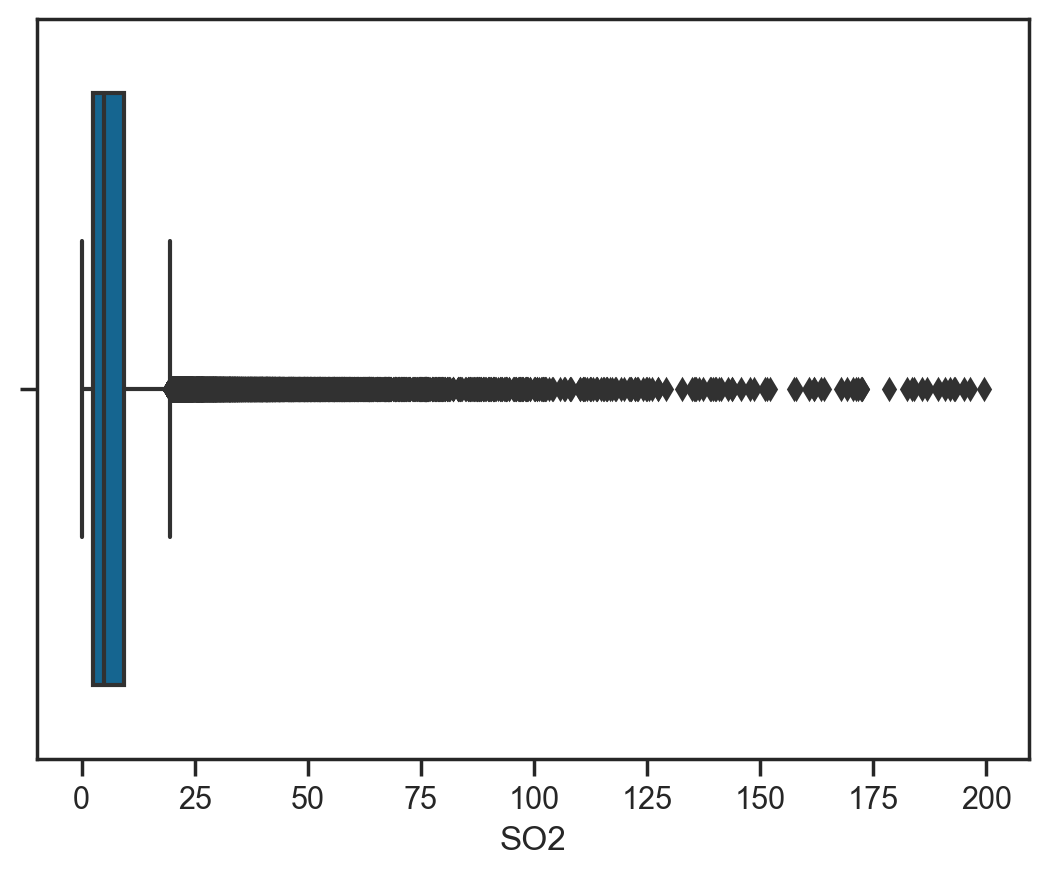

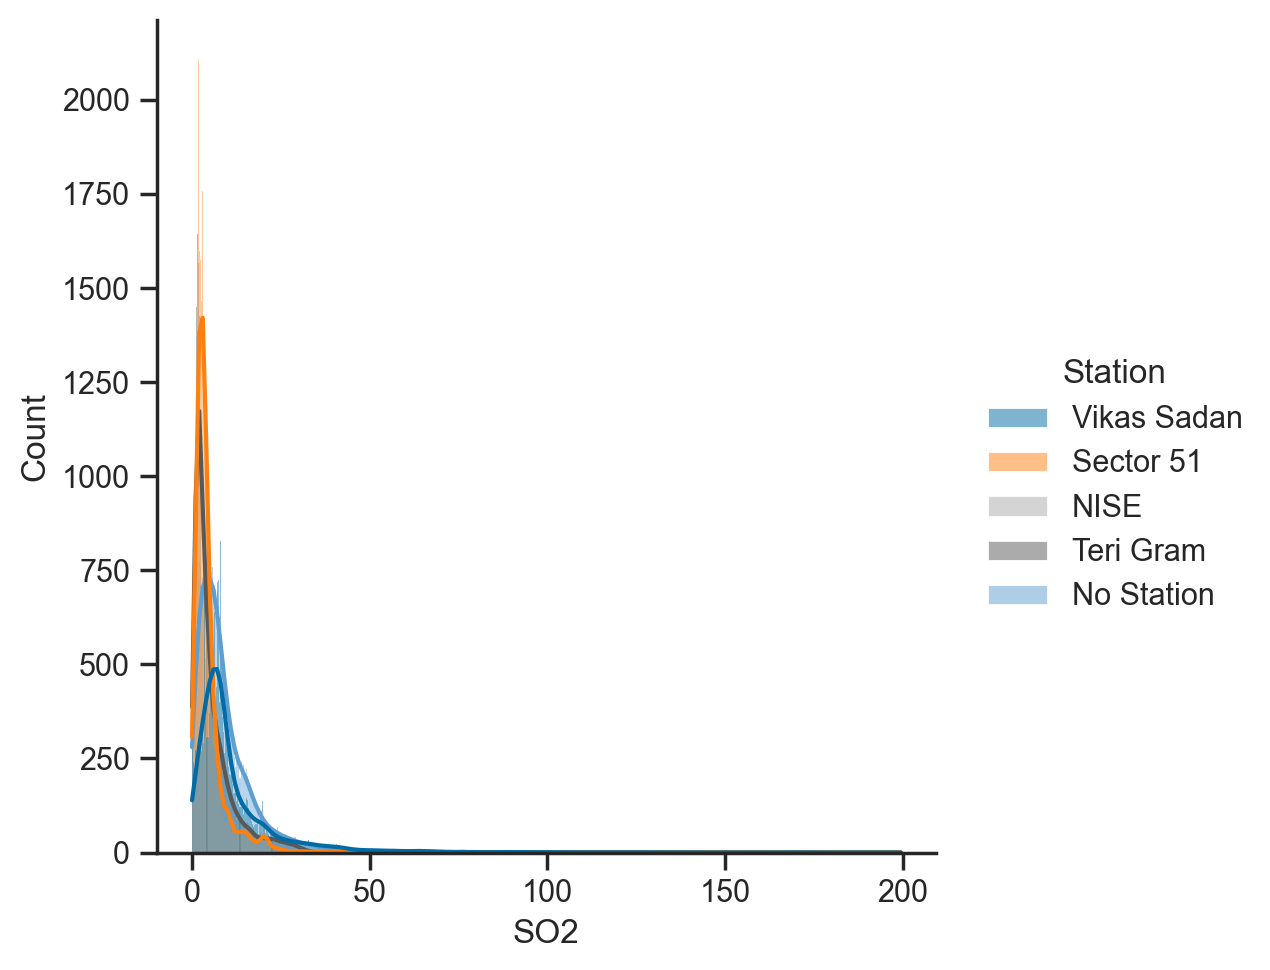

In [43]:
sns.boxplot(data = compiled, x='SO2')
sns.displot(data = compiled, x='SO2', kde=True, hue='Station')

<AxesSubplot: xlabel='SO2'>

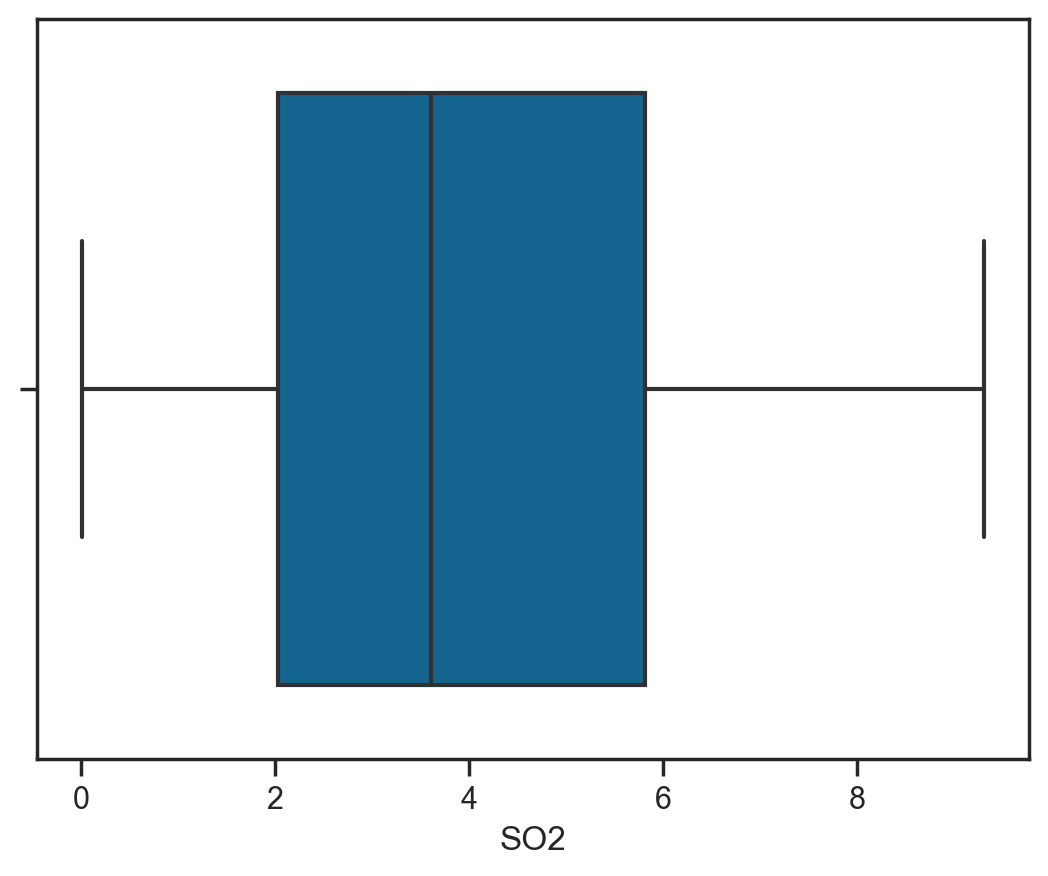

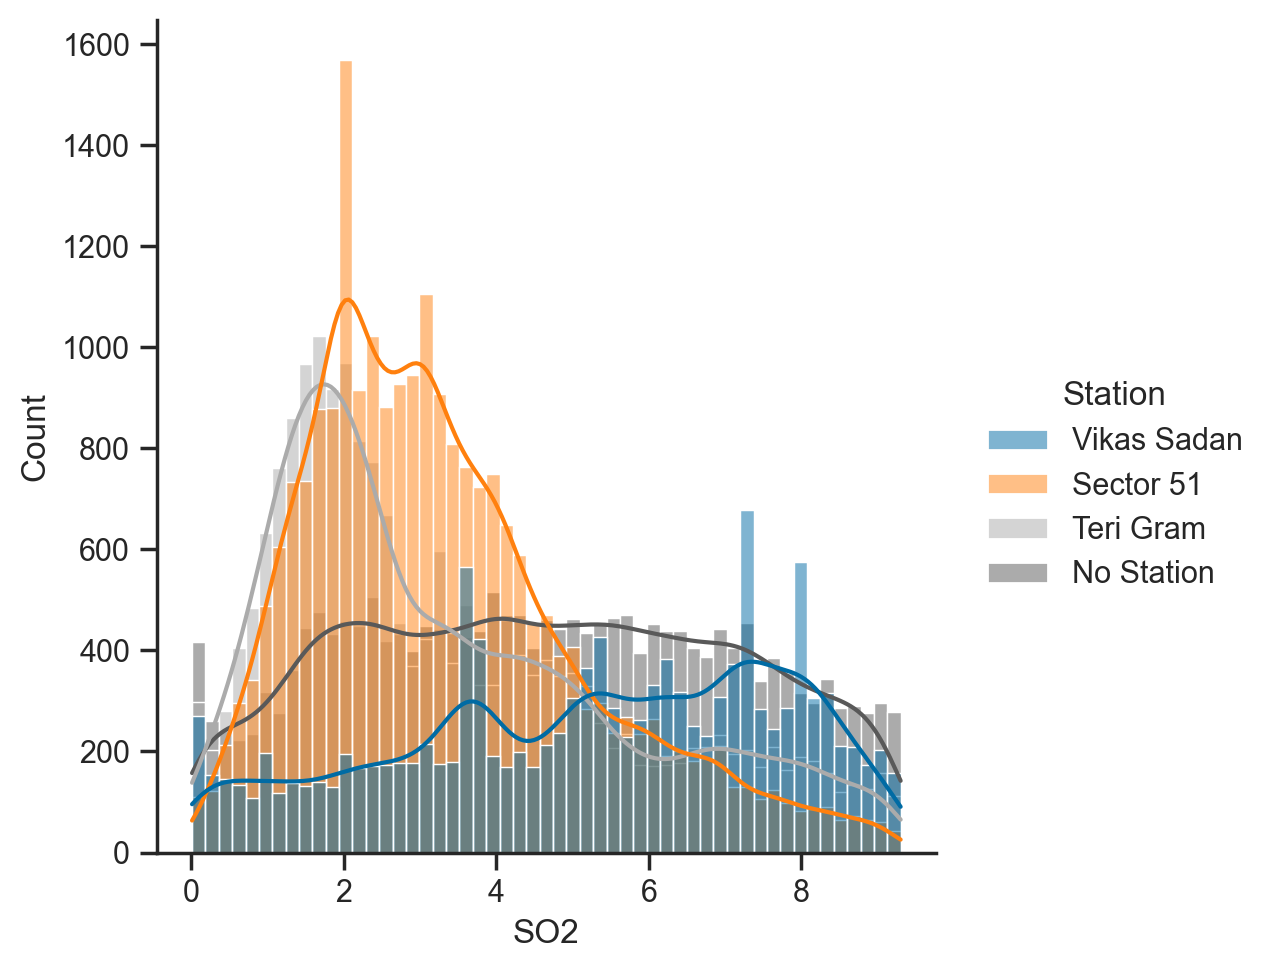

In [44]:
sns.boxplot(data = compiled[compiled['SO2'] < 9.31], x='SO2')
sns.displot(data = compiled[compiled['SO2'] < 9.31], x='SO2', kde=True, hue='Station')

In [45]:
# First fill other 3 stations by bfill or ffill (but it should be done stations wise)
# Example, if on a day Vikas Sadan has missing value, then previous day's in Vikas Sadan should be filled.
# Station should be the same.

In [46]:
compiled[["Station", "SO2"]]

Station    SO2
0       Vikas Sadan  10.50
1       Vikas Sadan   5.64
2       Vikas Sadan   7.60
3       Vikas Sadan  10.53
4       Vikas Sadan   9.98
...             ...    ...
147526   No Station   4.18
147527   No Station   4.03
147528   No Station   6.17
147529   No Station   6.31
147530   No Station   7.57

[147531 rows x 2 columns]

In [47]:
compiled[compiled['Station'] == "Vikas Sadan"]

Datetime      Station  PM2.5      NO    NO2     NOx    SO2  \
0      04-03-2020 00:00  Vikas Sadan  60.92  141.22  61.53  144.62  10.50   
1      04-03-2020 01:00  Vikas Sadan  56.88  177.38  56.39  170.94   5.64   
2      04-03-2020 02:00  Vikas Sadan  63.33  302.33  40.26  262.69   7.60   
3      04-03-2020 03:00  Vikas Sadan  67.60  377.93  29.18  317.53  10.53   
4      04-03-2020 04:00  Vikas Sadan  72.72  319.80  33.66  273.25   9.98   
...                 ...          ...    ...     ...    ...     ...    ...   
26811  26-03-2023 03:00  Vikas Sadan  83.22   23.90  49.59   70.03  41.30   
26812  26-03-2023 04:00  Vikas Sadan  71.96   24.25  53.15   71.91  40.56   
26813  26-03-2023 05:00  Vikas Sadan  75.47   24.55  54.38   64.34  40.82   
26814  26-03-2023 06:00  Vikas Sadan  69.07   23.09  54.48   72.73  39.29   
26815  26-03-2023 07:00  Vikas Sadan  66.35   23.02  56.28   66.13    NaN   

         CO  Ozone  Benzene  ...  Xylene  AT   RF  TOT-RF  PM10  NH3  CO2  O3  \
0      3.01   5.08     2.04  ...    3.10 NaN  NaN     0.0   NaN  NaN  NaN NaN   
1      5.38   6.15     2.00  ...    3.03 NaN  NaN     0.0   NaN  NaN  NaN NaN   
2      1.85  12.72     2.02  ...    3.08 NaN  NaN     0.0   NaN  NaN  NaN NaN   
3      1.31  11.46     1.96  ...    3.02 NaN  NaN     0.0   NaN  NaN  NaN NaN   
4      0.63   4.76     2.01  ...    2.97 NaN  NaN     0.0   NaN  NaN  NaN NaN   
...     ...    ...      ...  ...     ...  ..  ...     ...   ...  ...  ...  ..   
26811  0.87  26.16     4.57  ...   12.70 NaN  0.0     0.0   NaN  NaN  NaN NaN   
26812  0.66  17.46     8.22  ...    3.51 NaN  0.0     0.0   NaN  NaN  NaN NaN   
26813  0.28  37.73     8.21  ...    3.50 NaN  0.0     0.0   NaN  NaN  NaN NaN   
26814  0.43  22.46     8.15  ...    3.55 NaN  0.0     0.0   NaN  NaN  NaN NaN   
26815  0.50  33.17     8.11  ...    3.58 NaN  0.0     0.0   NaN  NaN  NaN NaN   

       AQI  AQI_Bucket  
0      NaN         nan  
1      NaN         nan  
2      NaN         nan  
3      NaN         nan  
4      NaN         nan  
...    ...         ...  
26811  NaN         nan  
26812  NaN         nan  
26813  NaN         nan  
26814  NaN         nan  
26815  NaN         nan  

[26816 rows x 31 columns]

In [48]:
temp_vikas_sadan_so2_plot = compiled[compiled['Station'] == "Vikas Sadan"]['SO2']
temp_vikas_sadan_so2_plot


0        10.50
1         5.64
2         7.60
3        10.53
4         9.98
         ...  
26811    41.30
26812    40.56
26813    40.82
26814    39.29
26815      NaN
Name: SO2, Length: 26816, dtype: float64

In [49]:
temp_vikas_sadan_so2_plot.index = (pd.to_datetime(compiled[compiled['Station'] == "Vikas Sadan"]['Datetime'] ))

In [50]:
temp_vikas_sadan_so2_plot

Datetime
2020-04-03 00:00:00    10.50
2020-04-03 01:00:00     5.64
2020-04-03 02:00:00     7.60
2020-04-03 03:00:00    10.53
2020-04-03 04:00:00     9.98
                       ...  
2023-03-26 03:00:00    41.30
2023-03-26 04:00:00    40.56
2023-03-26 05:00:00    40.82
2023-03-26 06:00:00    39.29
2023-03-26 07:00:00      NaN
Name: SO2, Length: 26816, dtype: float64

<Figure size 2400x800 with 0 Axes>

<AxesSubplot: xlabel='Datetime', ylabel='SO2'>

Text(0.5, 1.0, 'Vikas Sadan SO2 data')

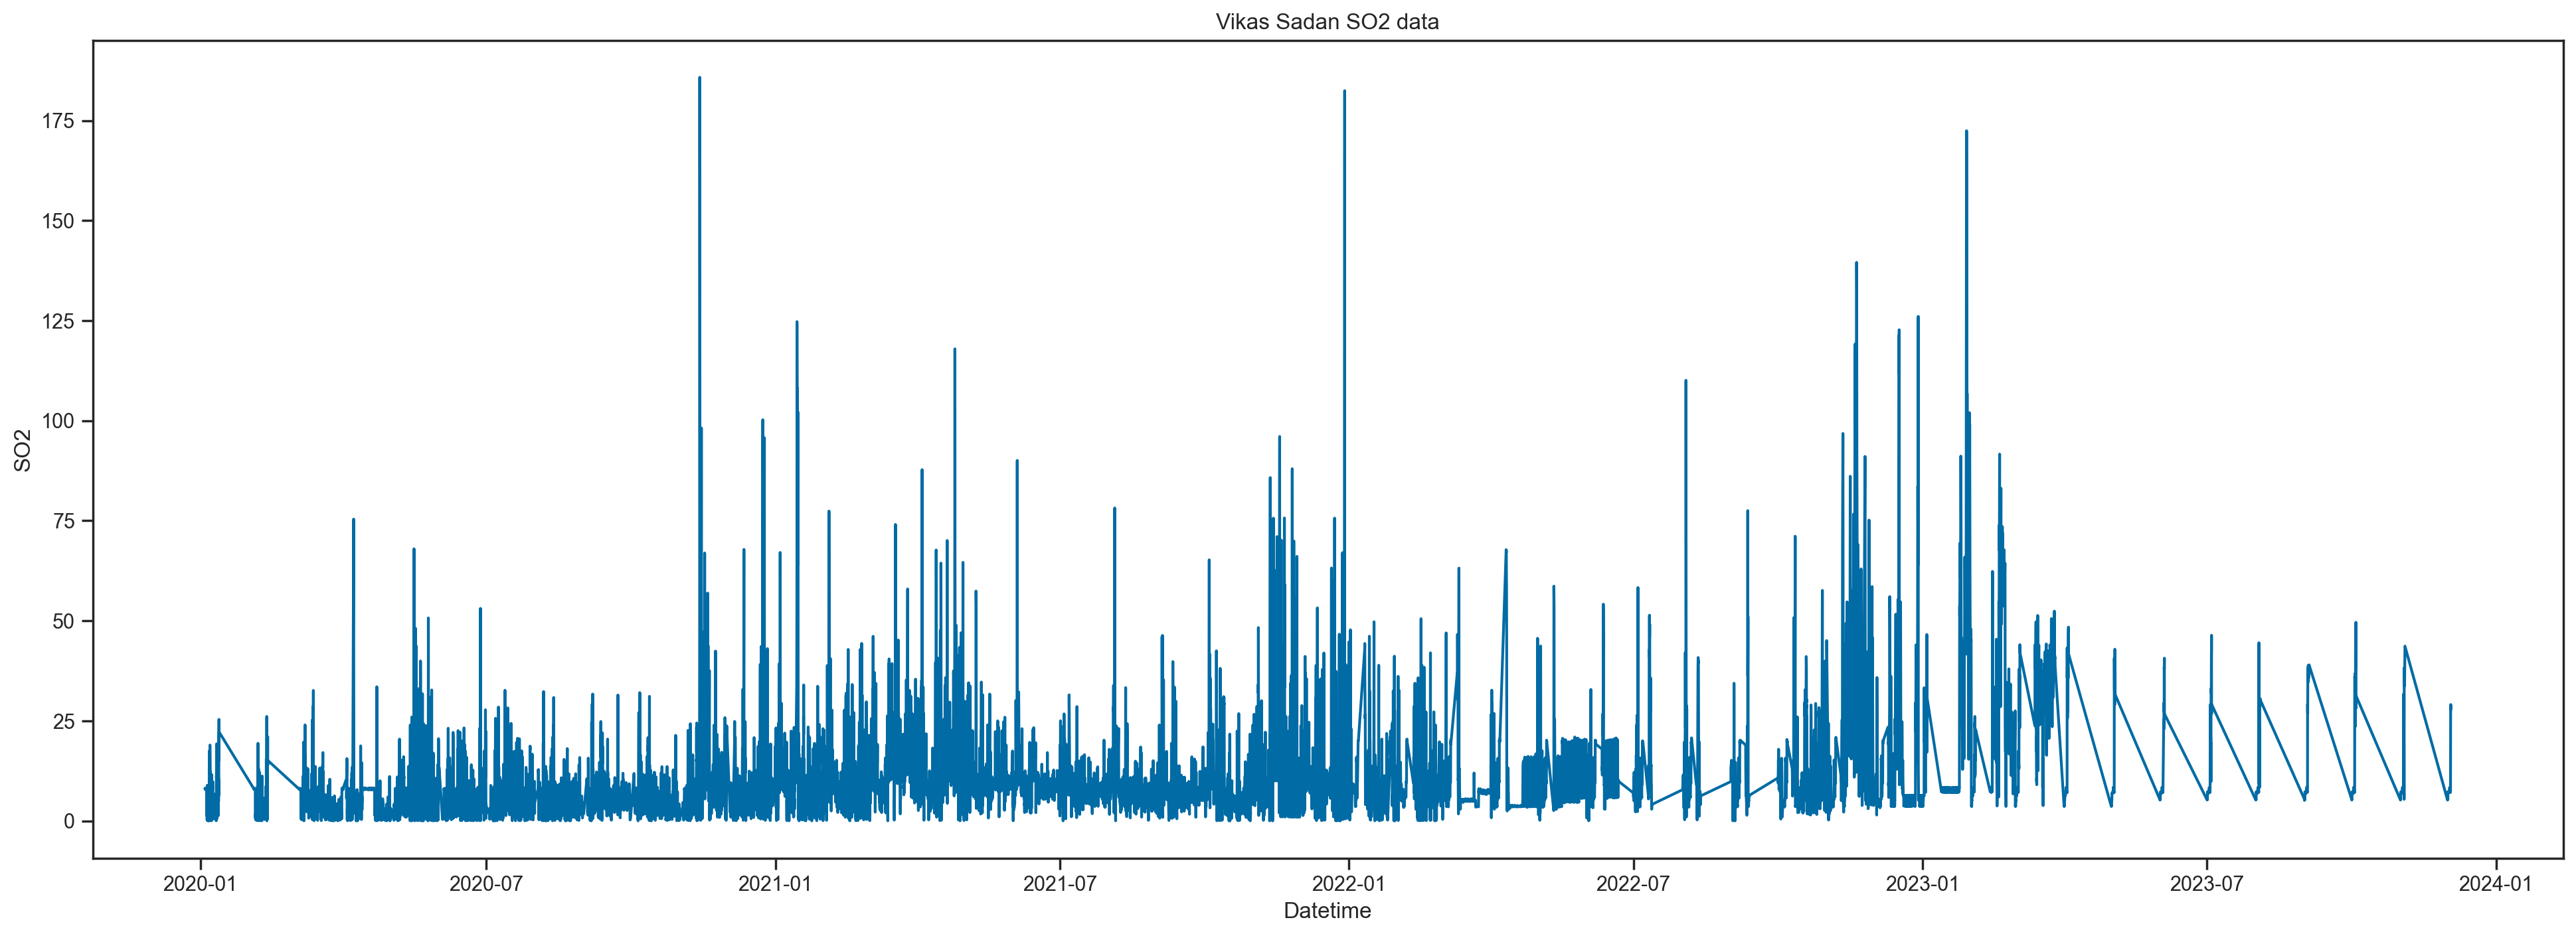

In [51]:
plt.figure(figsize=(24,8))
sns.lineplot(temp_vikas_sadan_so2_plot)
plt.title("Vikas Sadan SO2 data")

In [52]:
from datetime import datetime
# compiled['Datetime'].apply(lambda x : datetime.strptime(x, '%d-%m-%Y %H:%M'))

temp1 = compiled['Datetime'][:107273].apply(lambda x : datetime.strptime(x, '%d-%m-%Y %H:%M'))
temp = compiled['Datetime'][107273:]
temp.apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
temp2 = compiled['Datetime'][107273:].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
temp3 = pd.concat([temp1, temp2])
compiled['Datetime_2'] = temp3

compiled['Datetime'] = compiled['Datetime_2']

compiled.drop(['Datetime_2'], axis=1,inplace=True)

# We will not use these cols for training our model, just for vis purpose

day =[]
month = []
year = []
week = []
hour = []
for i in range(compiled.shape[0]):
    day.append(compiled['Datetime'][i].day)
    month.append(compiled['Datetime'][i].month)
    year.append(compiled['Datetime'][i].year)
    week.append(compiled['Datetime'][i].week)
    hour.append(compiled['Datetime'][i].hour)
compiled['Day'] = day
compiled['Month'] = month
compiled['Year'] = year
compiled['Week'] = week
compiled['Hour'] = hour


107273   2015-11-27 15:00:00
107274   2015-11-27 16:00:00
107275   2015-11-27 17:00:00
107276   2015-11-27 18:00:00
107277   2015-11-27 19:00:00
                 ...        
147526   2020-06-30 20:00:00
147527   2020-06-30 21:00:00
147528   2020-06-30 22:00:00
147529   2020-06-30 23:00:00
147530   2020-07-01 00:00:00
Name: Datetime, Length: 40258, dtype: datetime64[ns]

In [53]:
# See missing values by date. PLot the barplot day vs missing values

vikas_sadan  = compiled[compiled['Station'] == "Vikas Sadan"]
vikas_sadan

Datetime      Station  PM2.5      NO    NO2     NOx    SO2  \
0     2020-03-04 00:00:00  Vikas Sadan  60.92  141.22  61.53  144.62  10.50   
1     2020-03-04 01:00:00  Vikas Sadan  56.88  177.38  56.39  170.94   5.64   
2     2020-03-04 02:00:00  Vikas Sadan  63.33  302.33  40.26  262.69   7.60   
3     2020-03-04 03:00:00  Vikas Sadan  67.60  377.93  29.18  317.53  10.53   
4     2020-03-04 04:00:00  Vikas Sadan  72.72  319.80  33.66  273.25   9.98   
...                   ...          ...    ...     ...    ...     ...    ...   
26811 2023-03-26 03:00:00  Vikas Sadan  83.22   23.90  49.59   70.03  41.30   
26812 2023-03-26 04:00:00  Vikas Sadan  71.96   24.25  53.15   71.91  40.56   
26813 2023-03-26 05:00:00  Vikas Sadan  75.47   24.55  54.38   64.34  40.82   
26814 2023-03-26 06:00:00  Vikas Sadan  69.07   23.09  54.48   72.73  39.29   
26815 2023-03-26 07:00:00  Vikas Sadan  66.35   23.02  56.28   66.13    NaN   

         CO  Ozone  Benzene  ...  NH3  CO2  O3  AQI  AQI_Bucket  Day  Month  \
0      3.01   5.08     2.04  ...  NaN  NaN NaN  NaN         nan    4      3   
1      5.38   6.15     2.00  ...  NaN  NaN NaN  NaN         nan    4      3   
2      1.85  12.72     2.02  ...  NaN  NaN NaN  NaN         nan    4      3   
3      1.31  11.46     1.96  ...  NaN  NaN NaN  NaN         nan    4      3   
4      0.63   4.76     2.01  ...  NaN  NaN NaN  NaN         nan    4      3   
...     ...    ...      ...  ...  ...  ...  ..  ...         ...  ...    ...   
26811  0.87  26.16     4.57  ...  NaN  NaN NaN  NaN         nan   26      3   
26812  0.66  17.46     8.22  ...  NaN  NaN NaN  NaN         nan   26      3   
26813  0.28  37.73     8.21  ...  NaN  NaN NaN  NaN         nan   26      3   
26814  0.43  22.46     8.15  ...  NaN  NaN NaN  NaN         nan   26      3   
26815  0.50  33.17     8.11  ...  NaN  NaN NaN  NaN         nan   26      3   

       Year  Week  Hour  
0      2020    10     0  
1      2020    10     1  
2      2020    10     2  
3      2020    10     3  
4      2020    10     4  
...     ...   ...   ...  
26811  2023    12     3  
26812  2023    12     4  
26813  2023    12     5  
26814  2023    12     6  
26815  2023    12     7  

[26816 rows x 36 columns]

In [54]:
vikas_sadan["SO2"].isnull().sum()
vikas_sadan["SO2"].isna().sum()

5571

5571

In [55]:
vikas_sadan["SO2"].sample(10)
vikas_sadan["SO2"][20488]

7321      8.44
4338      3.82
19462      NaN
6552     15.42
10532    13.03
11635      NaN
3103       NaN
6333     23.91
3259     11.51
5503      6.04
Name: SO2, dtype: float64

nan

In [56]:
# X-axis group (year, month)
# Y aixs count of missing values
vikas_sadan_na = vikas_sadan[vikas_sadan['SO2'].isna()]
vikas_sadan_na
vikas_sadan_na.groupby(by = ['Year',"Month"]).SO2.sum()

Datetime      Station  PM2.5     NO    NO2    NOx  SO2    CO  \
64    2020-03-06 16:00:00  Vikas Sadan  13.32   7.66  51.92  31.73  NaN  2.90   
97    2020-03-08 01:00:00  Vikas Sadan    NaN    NaN    NaN    NaN  NaN   NaN   
100   2020-03-08 04:00:00  Vikas Sadan    NaN    NaN    NaN    NaN  NaN   NaN   
127   2020-03-09 07:00:00  Vikas Sadan    NaN    NaN    NaN    NaN  NaN   NaN   
137   2020-03-09 17:00:00  Vikas Sadan    NaN    NaN    NaN    NaN  NaN   NaN   
...                   ...          ...    ...    ...    ...    ...  ...   ...   
26775 2023-03-24 15:00:00  Vikas Sadan    NaN    NaN    NaN    NaN  NaN   NaN   
26776 2023-03-24 16:00:00  Vikas Sadan    NaN    NaN    NaN    NaN  NaN   NaN   
26777 2023-03-24 17:00:00  Vikas Sadan    NaN    NaN    NaN    NaN  NaN   NaN   
26783 2023-03-24 23:00:00  Vikas Sadan  37.04  17.30  30.48  50.05  NaN  0.96   
26815 2023-03-26 07:00:00  Vikas Sadan  66.35  23.02  56.28  66.13  NaN  0.50   

       Ozone  Benzene  ...  NH3  CO2  O3  AQI  AQI_Bucket  Day  Month  Year  \
64     45.10     2.00  ...  NaN  NaN NaN  NaN         nan    6      3  2020   
97       NaN      NaN  ...  NaN  NaN NaN  NaN         nan    8      3  2020   
100      NaN      NaN  ...  NaN  NaN NaN  NaN         nan    8      3  2020   
127      NaN      NaN  ...  NaN  NaN NaN  NaN         nan    9      3  2020   
137      NaN      NaN  ...  NaN  NaN NaN  NaN         nan    9      3  2020   
...      ...      ...  ...  ...  ...  ..  ...         ...  ...    ...   ...   
26775    NaN      NaN  ...  NaN  NaN NaN  NaN         nan   24      3  2023   
26776    NaN      NaN  ...  NaN  NaN NaN  NaN         nan   24      3  2023   
26777    NaN      NaN  ...  NaN  NaN NaN  NaN         nan   24      3  2023   
26783  44.74     9.16  ...  NaN  NaN NaN  NaN         nan   24      3  2023   
26815  33.17     8.11  ...  NaN  NaN NaN  NaN         nan   26      3  2023   

       Week  Hour  
64       10    16  
97       10     1  
100      10     4  
127      11     7  
137      11    17  
...     ...   ...  
26775    12    15  
26776    12    16  
26777    12    17  
26783    12    23  
26815    12     7  

[5571 rows x 36 columns]

Year  Month
2020  3        0.0
      4        0.0
      5        0.0
      6        0.0
      7        0.0
      8        0.0
      9        0.0
      10       0.0
      11       0.0
      12       0.0
2021  1        0.0
      2        0.0
      3        0.0
      4        0.0
      5        0.0
      6        0.0
      7        0.0
      8        0.0
      9        0.0
      10       0.0
      11       0.0
      12       0.0
2022  1        0.0
      2        0.0
      3        0.0
      4        0.0
      5        0.0
      6        0.0
      7        0.0
      8        0.0
      9        0.0
      10       0.0
      11       0.0
      12       0.0
2023  1        0.0
      2        0.0
      3        0.0
Name: SO2, dtype: float64

In [57]:
vikas_sadan_na.groupby(by = ['Year',"Month"]).count() # NaN is replaced with 0

Datetime  Station  PM2.5  NO  NO2  NOx  SO2  CO  Ozone  Benzene  \
Year Month                                                                    
2020 3            98       98     43  45   45   45    0  45     43       45   
     4            26       26      7   8    8    8    0   6      8        8   
     5           224      224     87  95  100  100    0  93     95       97   
     6           157      157     67  75   77   79    0  75     75       78   
     7           129      129     37  38   45   49    0  48     44       54   
     8            40       40     24  27   28   28    0  27     26       28   
     9            39       39     14  17   17   17    0  17     13       17   
     10           37       37     18  19   19   19    0  19     14       19   
     11           59       59     28  29   30   30    0  31     24       31   
     12           62       62     27  24   19   24    0  27     20       29   
2021 1            40       40     27  26   26   26    0  28     27       29   
     2            35       35     32  33    9   33    0  33     30       33   
     3             6        6      6   6    6    6    0   6      6        6   
     4            22       22      3   7    7    7    0   8      7        8   
     5            96       96     29  19   20   21    0  20     18       33   
     6            34       34      6   7    9    8    0   9      8        9   
     7            92       92     12  12   14   15    0  16     10       16   
     8            95       95     19  21   22   22    0  22     19       23   
     9            57       57     18  23   22   23    0  21     19       23   
     10          156      156     19  18   18   18    0  22     18       22   
     11           93       93     19  19   19   19    0  18     18       19   
     12          160      160     22  24   23   23    0  24     23       23   
2022 1           290      290     58  58   58   58    0  60     60       61   
     2            57       57     21  22   22   22    0  23     20       22   
     3           113      113     22  22   22   22    0  23     22       23   
     4           177      177      1   3    3    3    0   4      2        3   
     5           148      148      0   0    0    0    0   0      0        0   
     6           276      276      7   7    7    7    0   7      7        7   
     7           744      744      0   0    0    0    0   0      0        0   
     8           744      744      0   0    0    0    0   0      0        0   
     9           720      720      0   0    0    0    0   0      0        0   
     10          259      259     38  44   44   44    0  41     36       44   
     11          111      111     55  61   61   61    0  58     59       61   
     12           47       47     41  45   43   45    0  42     42       43   
2023 1             9        9      2   3    3    3    0   4      2        3   
     2            34       34     19  30   30   30    0  21     21       30   
     3            85       85     16  71   71   71    0  13     39       71   

            ...  TOT-RF  PM10  NH3  CO2  O3  AQI  AQI_Bucket  Day  Week  Hour  
Year Month  ...                                                                
2020 3      ...      98     0    0    0   0    0          98   98    98    98  
     4      ...      26     0    0    0   0    0          26   26    26    26  
     5      ...     224     0    0    0   0    0         224  224   224   224  
     6      ...     157     0    0    0   0    0         157  157   157   157  
     7      ...     129     0    0    0   0    0         129  129   129   129  
     8      ...      40     0    0    0   0    0          40   40    40    40  
     9      ...      39     0    0    0   0    0          39   39    39    39  
     10     ...      37     0    0    0   0    0          37   37    37    37  
     11     ...      59     0    0    0   0    0          59   59    59    59  
     12     ...      62     0    0    0   0    0  

In [58]:
vikas_sadan_na["SO2"].isna().sum()

5571

In [59]:
vikas_sadan_na.fillna(1)

Datetime      Station  PM2.5     NO    NO2    NOx  SO2    CO  \
64    2020-03-06 16:00:00  Vikas Sadan  13.32   7.66  51.92  31.73  1.0  2.90   
97    2020-03-08 01:00:00  Vikas Sadan   1.00   1.00   1.00   1.00  1.0  1.00   
100   2020-03-08 04:00:00  Vikas Sadan   1.00   1.00   1.00   1.00  1.0  1.00   
127   2020-03-09 07:00:00  Vikas Sadan   1.00   1.00   1.00   1.00  1.0  1.00   
137   2020-03-09 17:00:00  Vikas Sadan   1.00   1.00   1.00   1.00  1.0  1.00   
...                   ...          ...    ...    ...    ...    ...  ...   ...   
26775 2023-03-24 15:00:00  Vikas Sadan   1.00   1.00   1.00   1.00  1.0  1.00   
26776 2023-03-24 16:00:00  Vikas Sadan   1.00   1.00   1.00   1.00  1.0  1.00   
26777 2023-03-24 17:00:00  Vikas Sadan   1.00   1.00   1.00   1.00  1.0  1.00   
26783 2023-03-24 23:00:00  Vikas Sadan  37.04  17.30  30.48  50.05  1.0  0.96   
26815 2023-03-26 07:00:00  Vikas Sadan  66.35  23.02  56.28  66.13  1.0  0.50   

       Ozone  Benzene  ...  NH3  CO2   O3  AQI  AQI_Bucket  Day  Month  Year  \
64     45.10     2.00  ...  1.0  1.0  1.0  1.0         nan    6      3  2020   
97      1.00     1.00  ...  1.0  1.0  1.0  1.0         nan    8      3  2020   
100     1.00     1.00  ...  1.0  1.0  1.0  1.0         nan    8      3  2020   
127     1.00     1.00  ...  1.0  1.0  1.0  1.0         nan    9      3  2020   
137     1.00     1.00  ...  1.0  1.0  1.0  1.0         nan    9      3  2020   
...      ...      ...  ...  ...  ...  ...  ...         ...  ...    ...   ...   
26775   1.00     1.00  ...  1.0  1.0  1.0  1.0         nan   24      3  2023   
26776   1.00     1.00  ...  1.0  1.0  1.0  1.0         nan   24      3  2023   
26777   1.00     1.00  ...  1.0  1.0  1.0  1.0         nan   24      3  2023   
26783  44.74     9.16  ...  1.0  1.0  1.0  1.0         nan   24      3  2023   
26815  33.17     8.11  ...  1.0  1.0  1.0  1.0         nan   26      3  2023   

       Week  Hour  
64       10    16  
97       10     1  
100      10     4  
127      11     7  
137      11    17  
...     ...   ...  
26775    12    15  
26776    12    16  
26777    12    17  
26783    12    23  
26815    12     7  

[5571 rows x 36 columns]

In [60]:
# Temporarily fill NaN with 1 to get the count
vikas_sadan_na.fillna(1).groupby(by = ['Year',"Month"]).count() 

Datetime  Station  PM2.5   NO  NO2  NOx  SO2   CO  Ozone  Benzene  \
Year Month                                                                      
2020 3            98       98     98   98   98   98   98   98     98       98   
     4            26       26     26   26   26   26   26   26     26       26   
     5           224      224    224  224  224  224  224  224    224      224   
     6           157      157    157  157  157  157  157  157    157      157   
     7           129      129    129  129  129  129  129  129    129      129   
     8            40       40     40   40   40   40   40   40     40       40   
     9            39       39     39   39   39   39   39   39     39       39   
     10           37       37     37   37   37   37   37   37     37       37   
     11           59       59     59   59   59   59   59   59     59       59   
     12           62       62     62   62   62   62   62   62     62       62   
2021 1            40       40     40   40   40   40   40   40     40       40   
     2            35       35     35   35   35   35   35   35     35       35   
     3             6        6      6    6    6    6    6    6      6        6   
     4            22       22     22   22   22   22   22   22     22       22   
     5            96       96     96   96   96   96   96   96     96       96   
     6            34       34     34   34   34   34   34   34     34       34   
     7            92       92     92   92   92   92   92   92     92       92   
     8            95       95     95   95   95   95   95   95     95       95   
     9            57       57     57   57   57   57   57   57     57       57   
     10          156      156    156  156  156  156  156  156    156      156   
     11           93       93     93   93   93   93   93   93     93       93   
     12          160      160    160  160  160  160  160  160    160      160   
2022 1           290      290    290  290  290  290  290  290    290      290   
     2            57       57     57   57   57   57   57   57     57       57   
     3           113      113    113  113  113  113  113  113    113      113   
     4           177      177    177  177  177  177  177  177    177      177   
     5           148      148    148  148  148  148  148  148    148      148   
     6           276      276    276  276  276  276  276  276    276      276   
     7           744      744    744  744  744  744  744  744    744      744   
     8           744      744    744  744  744  744  744  744    744      744   
     9           720      720    720  720  720  720  720  720    720      720   
     10          259      259    259  259  259  259  259  259    259      259   
     11          111      111    111  111  111  111  111  111    111      111   
     12           47       47     47   47   47   47   47   47     47       47   
2023 1             9        9      9    9    9    9    9    9      9        9   
     2            34       34     34   34   34   34   34   34     34       34   
     3            85       85     85   85   85   85   85   85     85       85   

            ...  TOT-RF  PM10  NH3  CO2   O3  AQI  AQI_Bucket  Day  Week  Hour  
Year Month  ...                                                                 
2020 3      ...      98    98   98   98   98   98          98   98    98    98  
     4      ...      26    26   26   26   26   26          26   26    26    26  
     5      ...     224   224  224  224  224  224         224  224   224   224  
     6      ...     157   157  157  157  157  157         157  157   157   157  
     7      ...     129   129  129  129  129  129         129  129   129   129  
     8      ...      40    40   40   40   40   40          40   40    40    40  
     9      ...      39    39   39   39   39   39          39   39    39    39  
     10     ...      37    37   37   37   37   37          37   37    37    37  
     11     ...      59    59   59   59   

In [61]:
vikas_sadan_na.groupby(by = ['Year']).count() # NaN is replaced with 0

Datetime  Station  PM2.5   NO  NO2  NOx  SO2   CO  Ozone  Benzene  ...  \
Year                                                                     ...   
2020       871      871    352  377  388  399    0  388    362      406  ...   
2021       886      886    212  215  195  221    0  227    203      244  ...   
2022      3686     3686    243  262  260  262    0  258    248      264  ...   
2023       128      128     37  104  104  104    0   38     62      104  ...   

      PM10  NH3  CO2  O3  AQI  AQI_Bucket   Day  Month  Week  Hour  
Year                                                                
2020     0    0    0   0    0         871   871    871   871   871  
2021     0    0    0   0    0         886   886    886   886   886  
2022     0    0    0   0    0        3686  3686   3686  3686  3686  
2023     0    0    0   0    0         128   128    128   128   128  

[4 rows x 35 columns]

In [62]:
vikas_sadan_na.fillna(1).groupby(by = ['Year',"Month"]).SO2.count().reset_index() 

Year  Month  SO2
0   2020      3   98
1   2020      4   26
2   2020      5  224
3   2020      6  157
4   2020      7  129
5   2020      8   40
6   2020      9   39
7   2020     10   37
8   2020     11   59
9   2020     12   62
10  2021      1   40
11  2021      2   35
12  2021      3    6
13  2021      4   22
14  2021      5   96
15  2021      6   34
16  2021      7   92
17  2021      8   95
18  2021      9   57
19  2021     10  156
20  2021     11   93
21  2021     12  160
22  2022      1  290
23  2022      2   57
24  2022      3  113
25  2022      4  177
26  2022      5  148
27  2022      6  276
28  2022      7  744
29  2022      8  744
30  2022      9  720
31  2022     10  259
32  2022     11  111
33  2022     12   47
34  2023      1    9
35  2023      2   34
36  2023      3   85

In [63]:
vikas_sadan_na_so2_count = vikas_sadan_na.fillna(1).groupby(by = ['Year',"Month"]).SO2.count().reset_index()
vikas_sadan_na_so2_count

Year  Month  SO2
0   2020      3   98
1   2020      4   26
2   2020      5  224
3   2020      6  157
4   2020      7  129
5   2020      8   40
6   2020      9   39
7   2020     10   37
8   2020     11   59
9   2020     12   62
10  2021      1   40
11  2021      2   35
12  2021      3    6
13  2021      4   22
14  2021      5   96
15  2021      6   34
16  2021      7   92
17  2021      8   95
18  2021      9   57
19  2021     10  156
20  2021     11   93
21  2021     12  160
22  2022      1  290
23  2022      2   57
24  2022      3  113
25  2022      4  177
26  2022      5  148
27  2022      6  276
28  2022      7  744
29  2022      8  744
30  2022      9  720
31  2022     10  259
32  2022     11  111
33  2022     12   47
34  2023      1    9
35  2023      2   34
36  2023      3   85

In [64]:
vikas_sadan_na_so2_count["Year_Month"] = vikas_sadan_na_so2_count["Year"].map(str) + ", " + vikas_sadan_na_so2_count["Month"].map(str)
vikas_sadan_na_so2_count

Year  Month  SO2 Year_Month
0   2020      3   98    2020, 3
1   2020      4   26    2020, 4
2   2020      5  224    2020, 5
3   2020      6  157    2020, 6
4   2020      7  129    2020, 7
5   2020      8   40    2020, 8
6   2020      9   39    2020, 9
7   2020     10   37   2020, 10
8   2020     11   59   2020, 11
9   2020     12   62   2020, 12
10  2021      1   40    2021, 1
11  2021      2   35    2021, 2
12  2021      3    6    2021, 3
13  2021      4   22    2021, 4
14  2021      5   96    2021, 5
15  2021      6   34    2021, 6
16  2021      7   92    2021, 7
17  2021      8   95    2021, 8
18  2021      9   57    2021, 9
19  2021     10  156   2021, 10
20  2021     11   93   2021, 11
21  2021     12  160   2021, 12
22  2022      1  290    2022, 1
23  2022      2   57    2022, 2
24  2022      3  113    2022, 3
25  2022      4  177    2022, 4
26  2022      5  148    2022, 5
27  2022      6  276    2022, 6
28  2022      7  744    2022, 7
29  2022      8  744    2022, 8
30  2022      9  720    2022, 9
31  2022     10  259   2022, 10
32  2022     11  111   2022, 11
33  2022     12   47   2022, 12
34  2023      1    9    2023, 1
35  2023      2   34    2023, 2
36  2023      3   85    2023, 3

In [65]:
px.bar(data_frame=vikas_sadan_na_so2_count, x="Year_Month",y="SO2",text_auto=True,
      title="No. of missing values in SO2 in Vikas Sadan (grouped by month and year)")

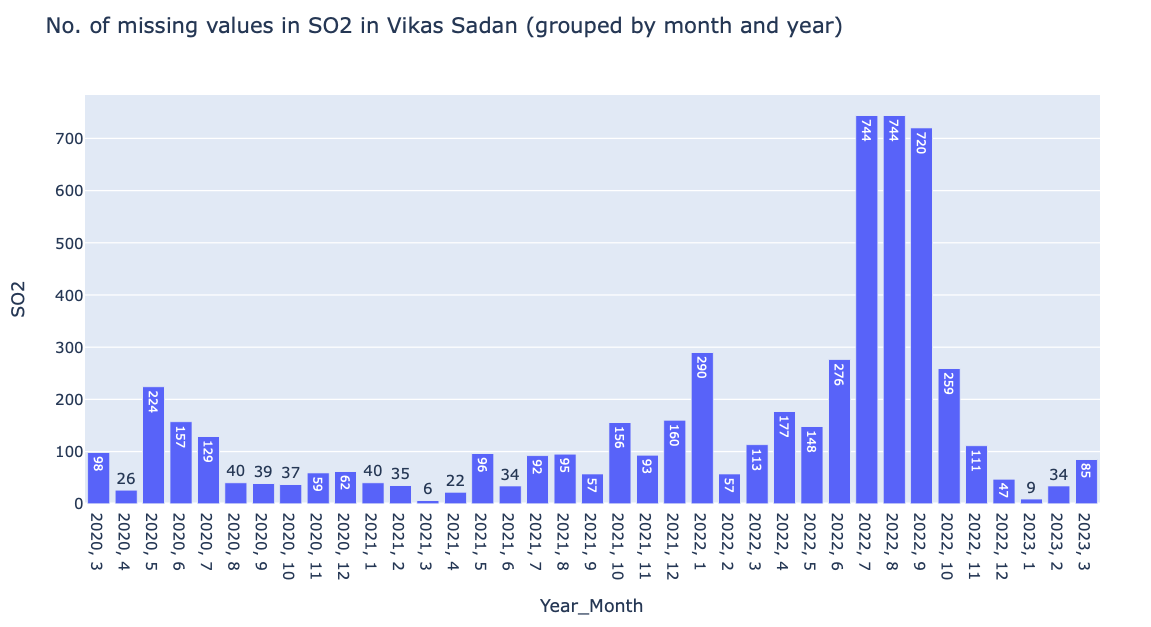

In [66]:
from IPython.display import display, HTML

def helper_1(df, col):
    
    df_na = df[df[col].isna()]
    df_na.fillna(1).groupby(by=['Year', "Month"]).count()
    df_na_col_count = df_na.fillna(1).groupby(
        by=['Year', "Month"])[col].count().reset_index()
    df_na_col_count["Year_Month"] = df_na_col_count["Year"].map(
        str) + ", " + df_na_col_count["Month"].map(str)
    return df_na_col_count

In [67]:
def helper_2(df, col):
    
    df_na = df[df[col].isna()]
    
    df_na.fillna(1).groupby(by=['Year', "Month", "Station"]).count()
    
    df_na_col_count = df_na.fillna(1).groupby(
        by=['Year', "Month", "Station"])[col].count().reset_index()
    
    df_na_col_count["Year_Month"] = df_na_col_count["Year"].map(
        str) + ", " + df_na_col_count["Month"].map(str)

    return df_na_col_count

In [68]:
temp = helper_1(compiled.copy(deep=True), "SO2")
display(temp)

Year  Month  SO2 Year_Month
0   2015     11    1   2015, 11
1   2015     12  372   2015, 12
2   2016      1  507    2016, 1
3   2016      2  352    2016, 2
4   2016      3  464    2016, 3
..   ...    ...  ...        ...
84  2022     11  974   2022, 11
85  2022     12  891   2022, 12
86  2023      1  859    2023, 1
87  2023      2  806    2023, 2
88  2023      3  792    2023, 3

[89 rows x 4 columns]

In [69]:
px.bar(data_frame = temp,
       x = "Year_Month",
       y="SO2",
       text_auto=True,
       title="No. of missing values in SO2"
       )

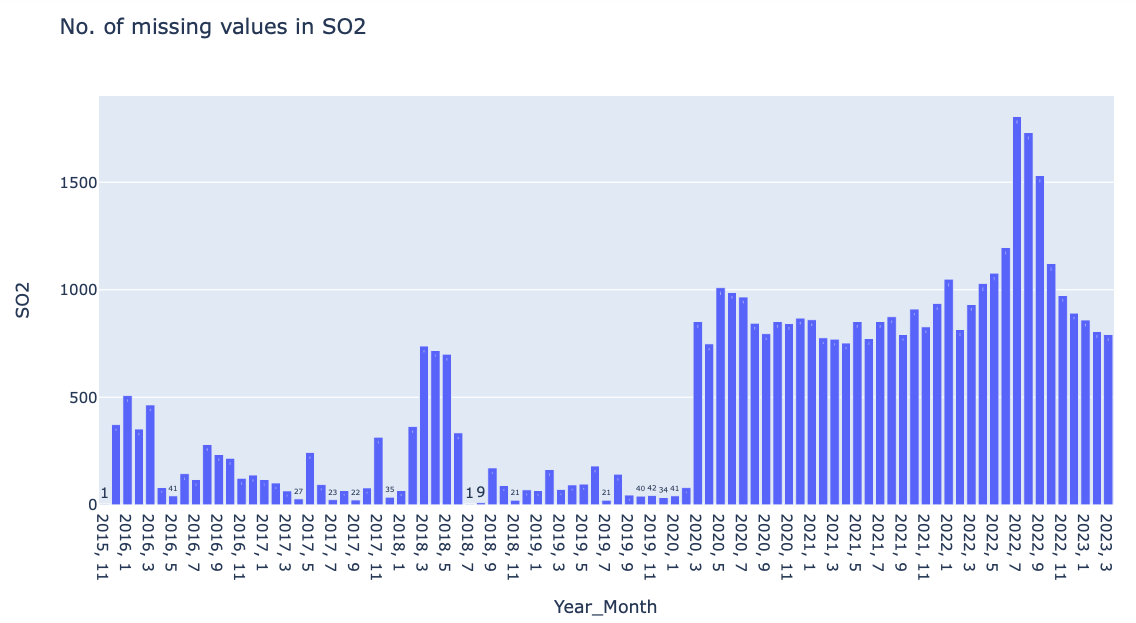

In [208]:
compiled.groupby(['Year','Month','Station'])['SO2'].count().reset_index()

# Not missing values.

px.bar(data_frame = compiled.groupby(['Year','Month','Station'])['SO2'].count().reset_index(),
       x = "Year",
       y="SO2",
       color="Station",
       text_auto=True,
       title="SO2"
       )

Year  Month      Station  SO2
0    2015     11   No Station   80
1    2015     12   No Station  372
2    2016      1   No Station  237
3    2016      2   No Station  344
4    2016      3   No Station  280
..    ...    ...          ...  ...
200  2023      2  Vikas Sadan  638
201  2023      3         NISE    0
202  2023      3    Sector 51  608
203  2023      3    Teri Gram  518
204  2023      3  Vikas Sadan  523

[205 rows x 4 columns]

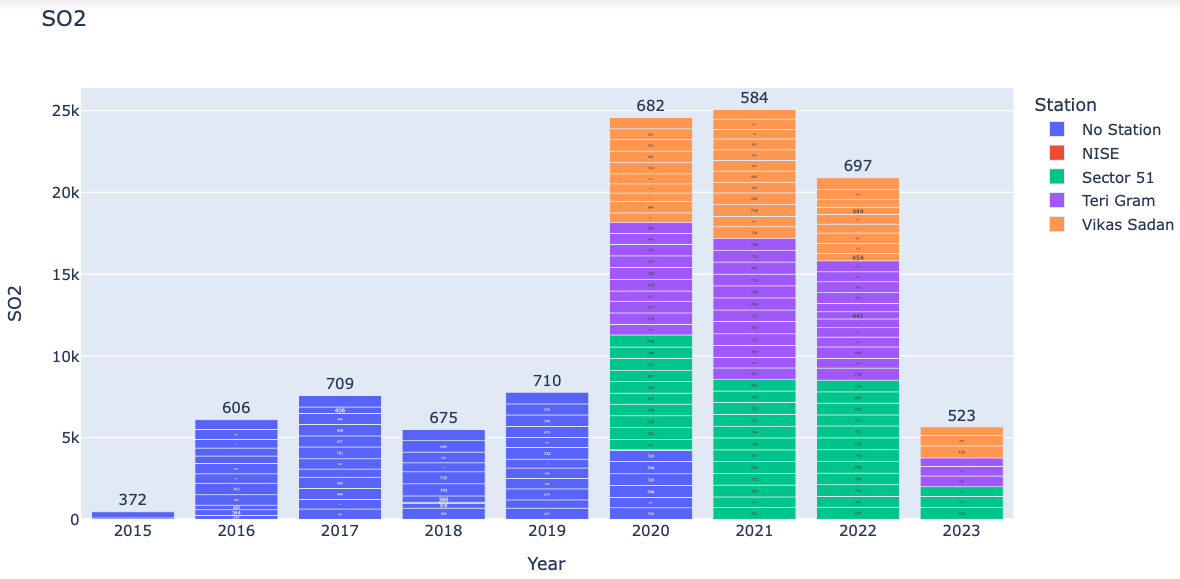

In [70]:
so2_year_month_station = compiled.groupby(['Year','Month','Station'])['SO2'].count().reset_index()
so2_year_month_station

# These are not missing values

Year  Month      Station  SO2
0    2015     11   No Station   80
1    2015     12   No Station  372
2    2016      1   No Station  237
3    2016      2   No Station  344
4    2016      3   No Station  280
..    ...    ...          ...  ...
200  2023      2  Vikas Sadan  638
201  2023      3         NISE    0
202  2023      3    Sector 51  608
203  2023      3    Teri Gram  518
204  2023      3  Vikas Sadan  523

[205 rows x 4 columns]

In [210]:
col = "SO2"
px.bar(data_frame = helper_2(compiled.copy(deep=True), col),
       x = "Year_Month",
       y = col,
       color="Station",
       text_auto = True,
       title = "No. of missing values in "+ col
       )

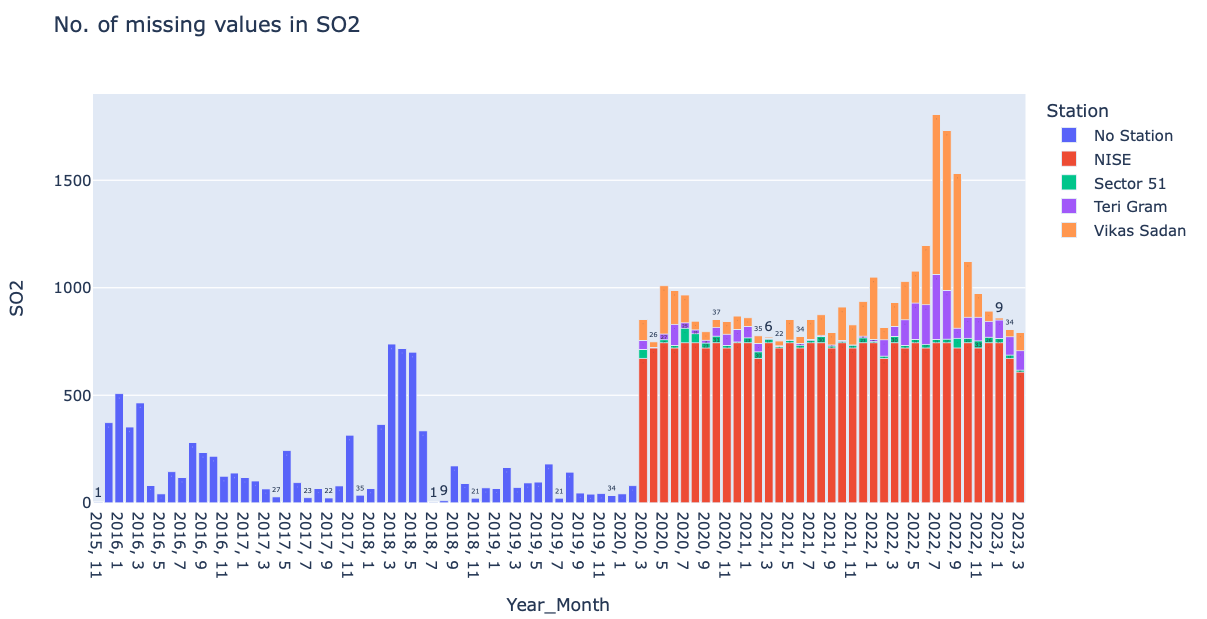

In [72]:
col = "PM10"
px.bar(data_frame = helper_2(compiled.copy(deep=True), col),
       x = "Year_Month",
       y = col,
       color="Station",
       text_auto = True,
       title = "No. of missing values in "+ col
       )

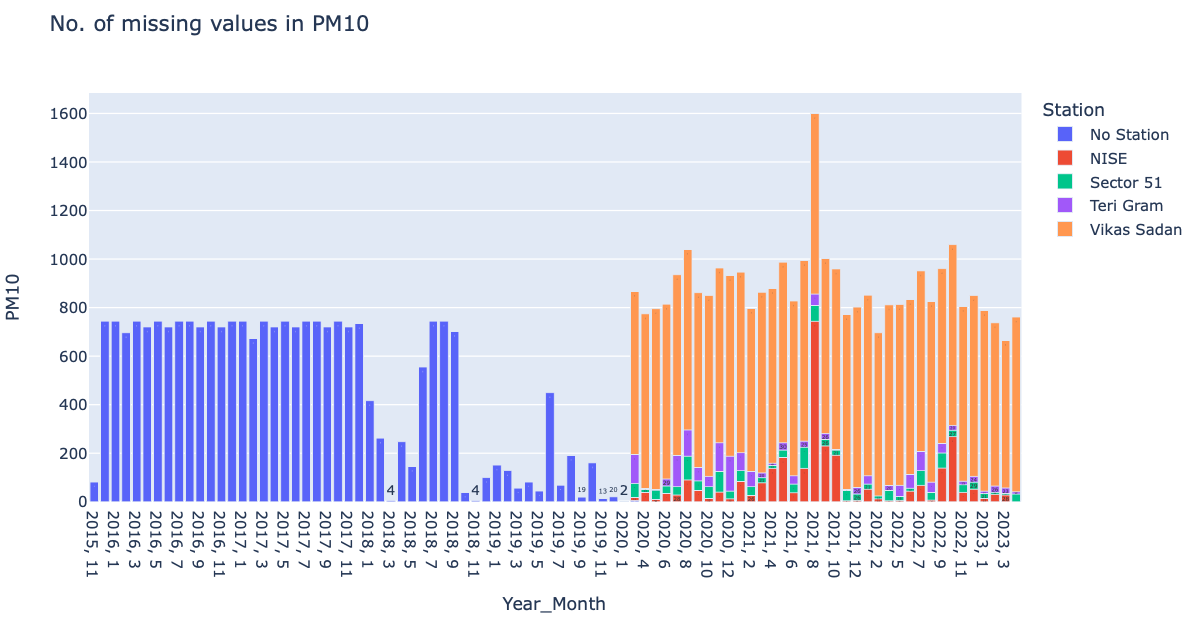

In [73]:
helper_2(compiled.copy(deep=True), col)

Year  Month      Station  PM10 Year_Month
0    2015     11   No Station    81   2015, 11
1    2015     12   No Station   744   2015, 12
2    2016      1   No Station   744    2016, 1
3    2016      2   No Station   696    2016, 2
4    2016      3   No Station   744    2016, 3
..    ...    ...          ...   ...        ...
193  2023      2  Vikas Sadan   672    2023, 2
194  2023      3         NISE    28    2023, 3
195  2023      3    Sector 51     6    2023, 3
196  2023      3    Teri Gram    23    2023, 3
197  2023      3  Vikas Sadan   608    2023, 3

[198 rows x 5 columns]

Text(0.5, 0, 'Year_Month')

Text(0, 0.5, 'PM2.5')

Text(0.5, 1.0, 'Number of missing values in PM2.5')

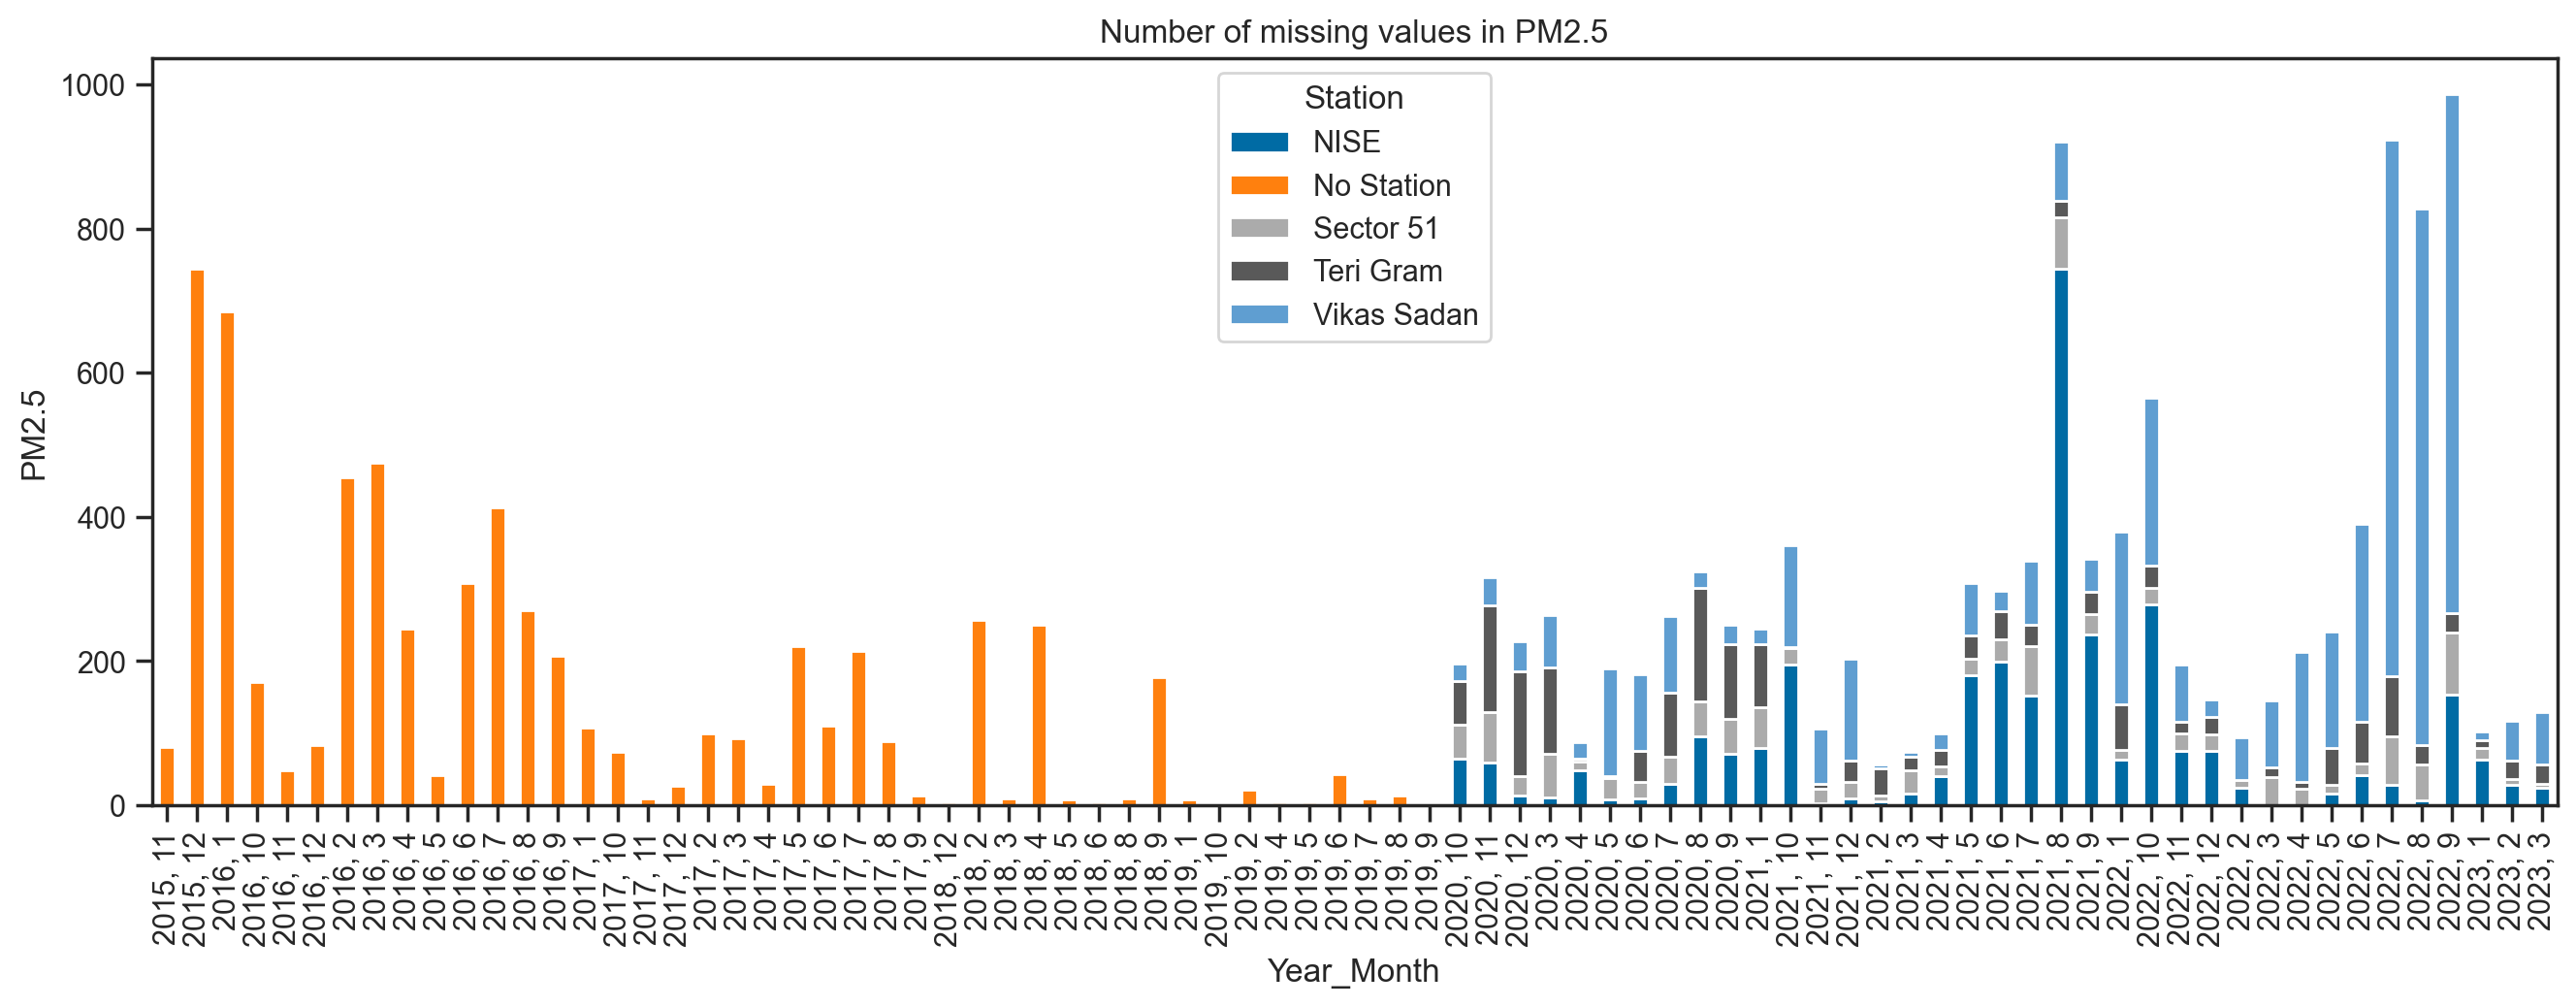

In [74]:
col = 'PM2.5'
temp_df_plot = helper_2(compiled.copy(deep=True), col)
ax = temp_df_plot.groupby(['Year_Month', 'Station'])[col].sum().unstack().plot(kind='bar', stacked=True, figsize=(16, 5))

# Set labels and title
plt.xlabel('Year_Month')
plt.ylabel(col)
plt.title('Number of missing values in ' + col)

# Display the plot
plt.show()

Text(0.5, 0, 'Year_Month')

Text(0, 0.5, 'PM2.5')

Text(0.5, 1.0, 'Number of missing values in PM2.5')

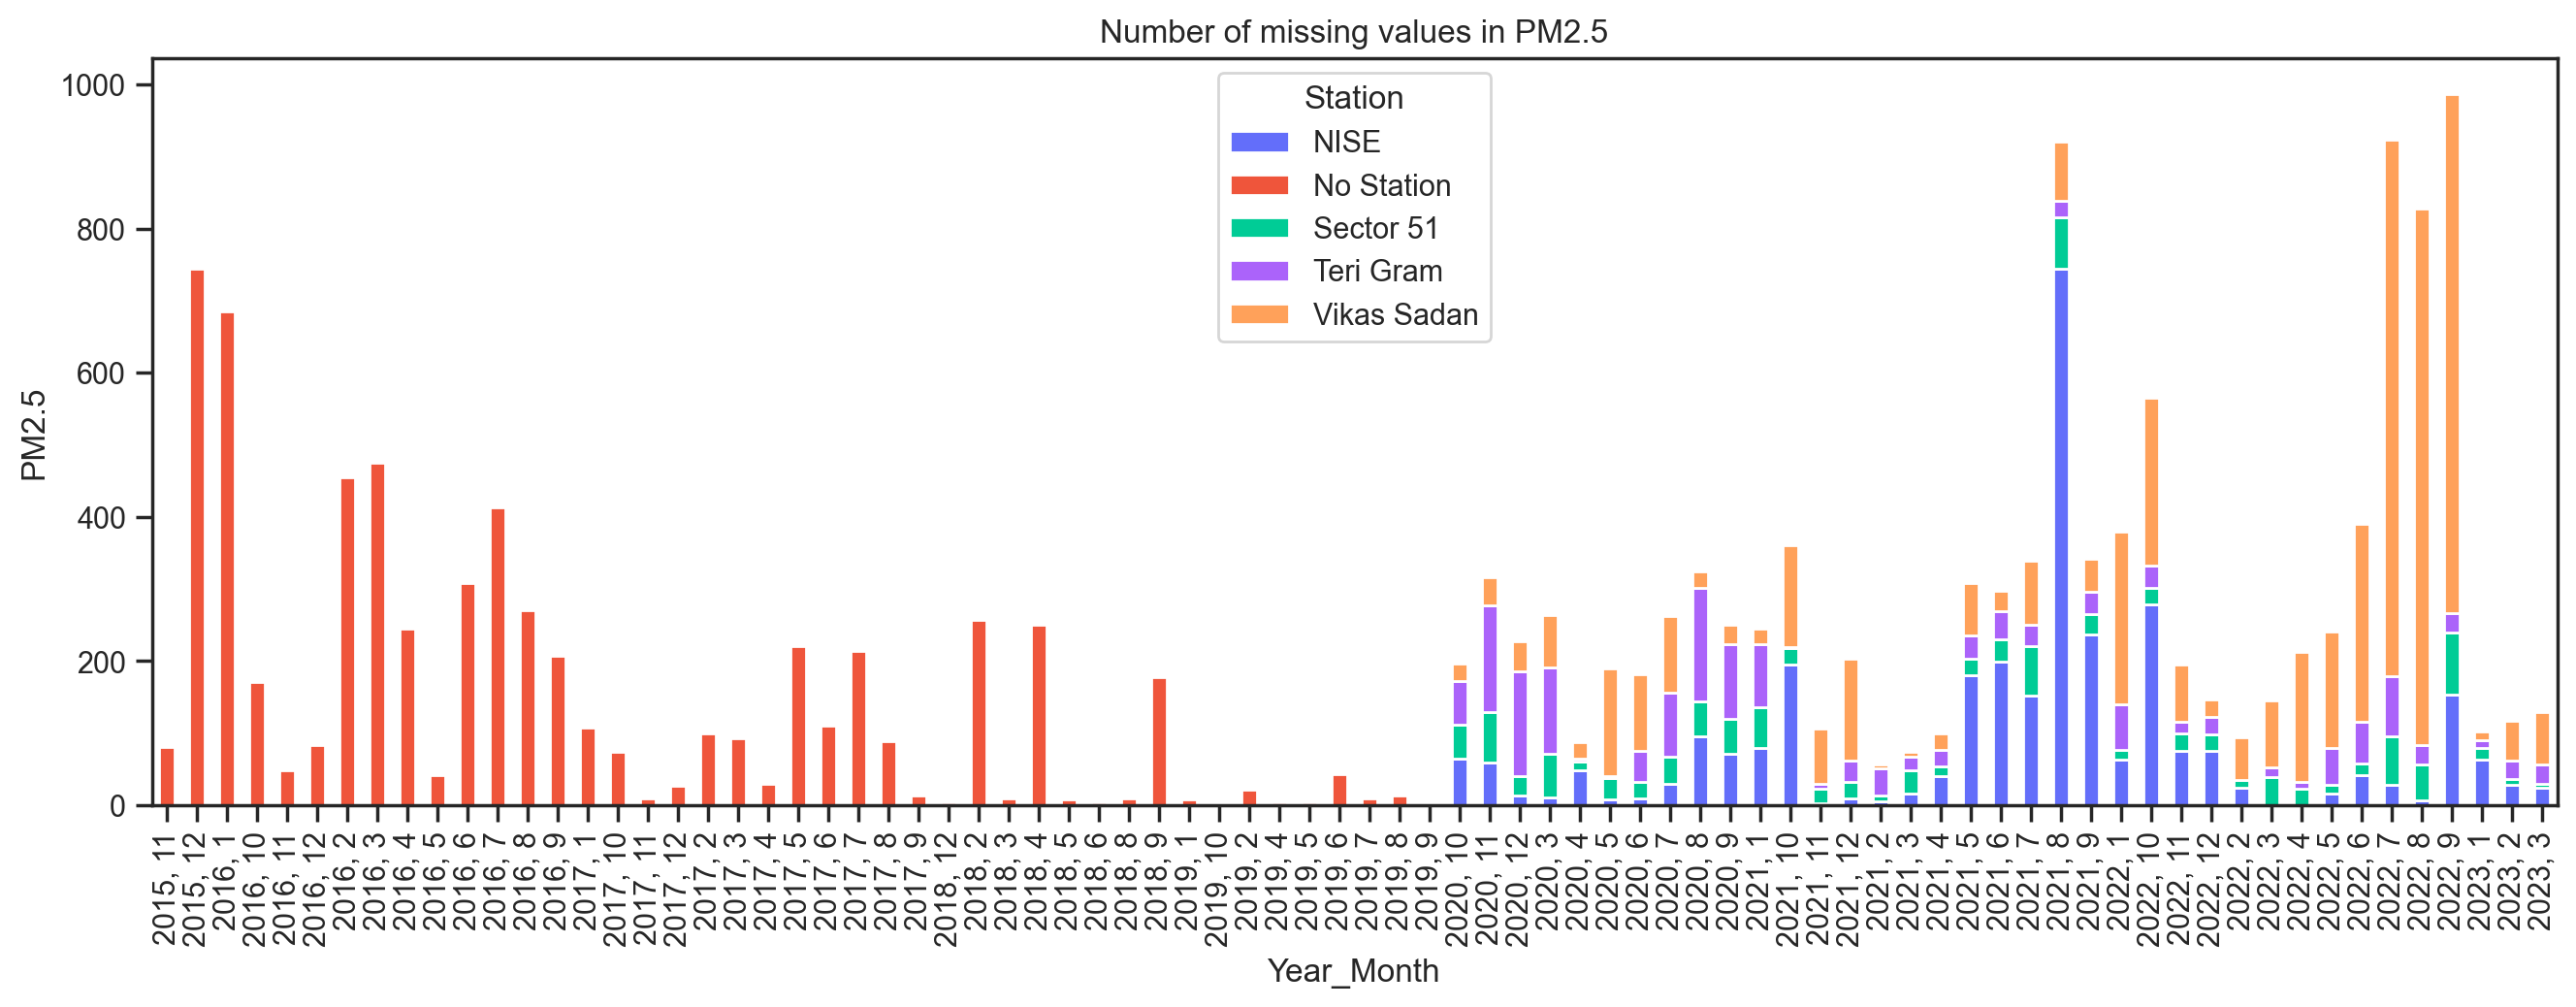

Text(0.5, 0, 'Year_Month')

Text(0, 0.5, 'NO')

Text(0.5, 1.0, 'Number of missing values in NO')

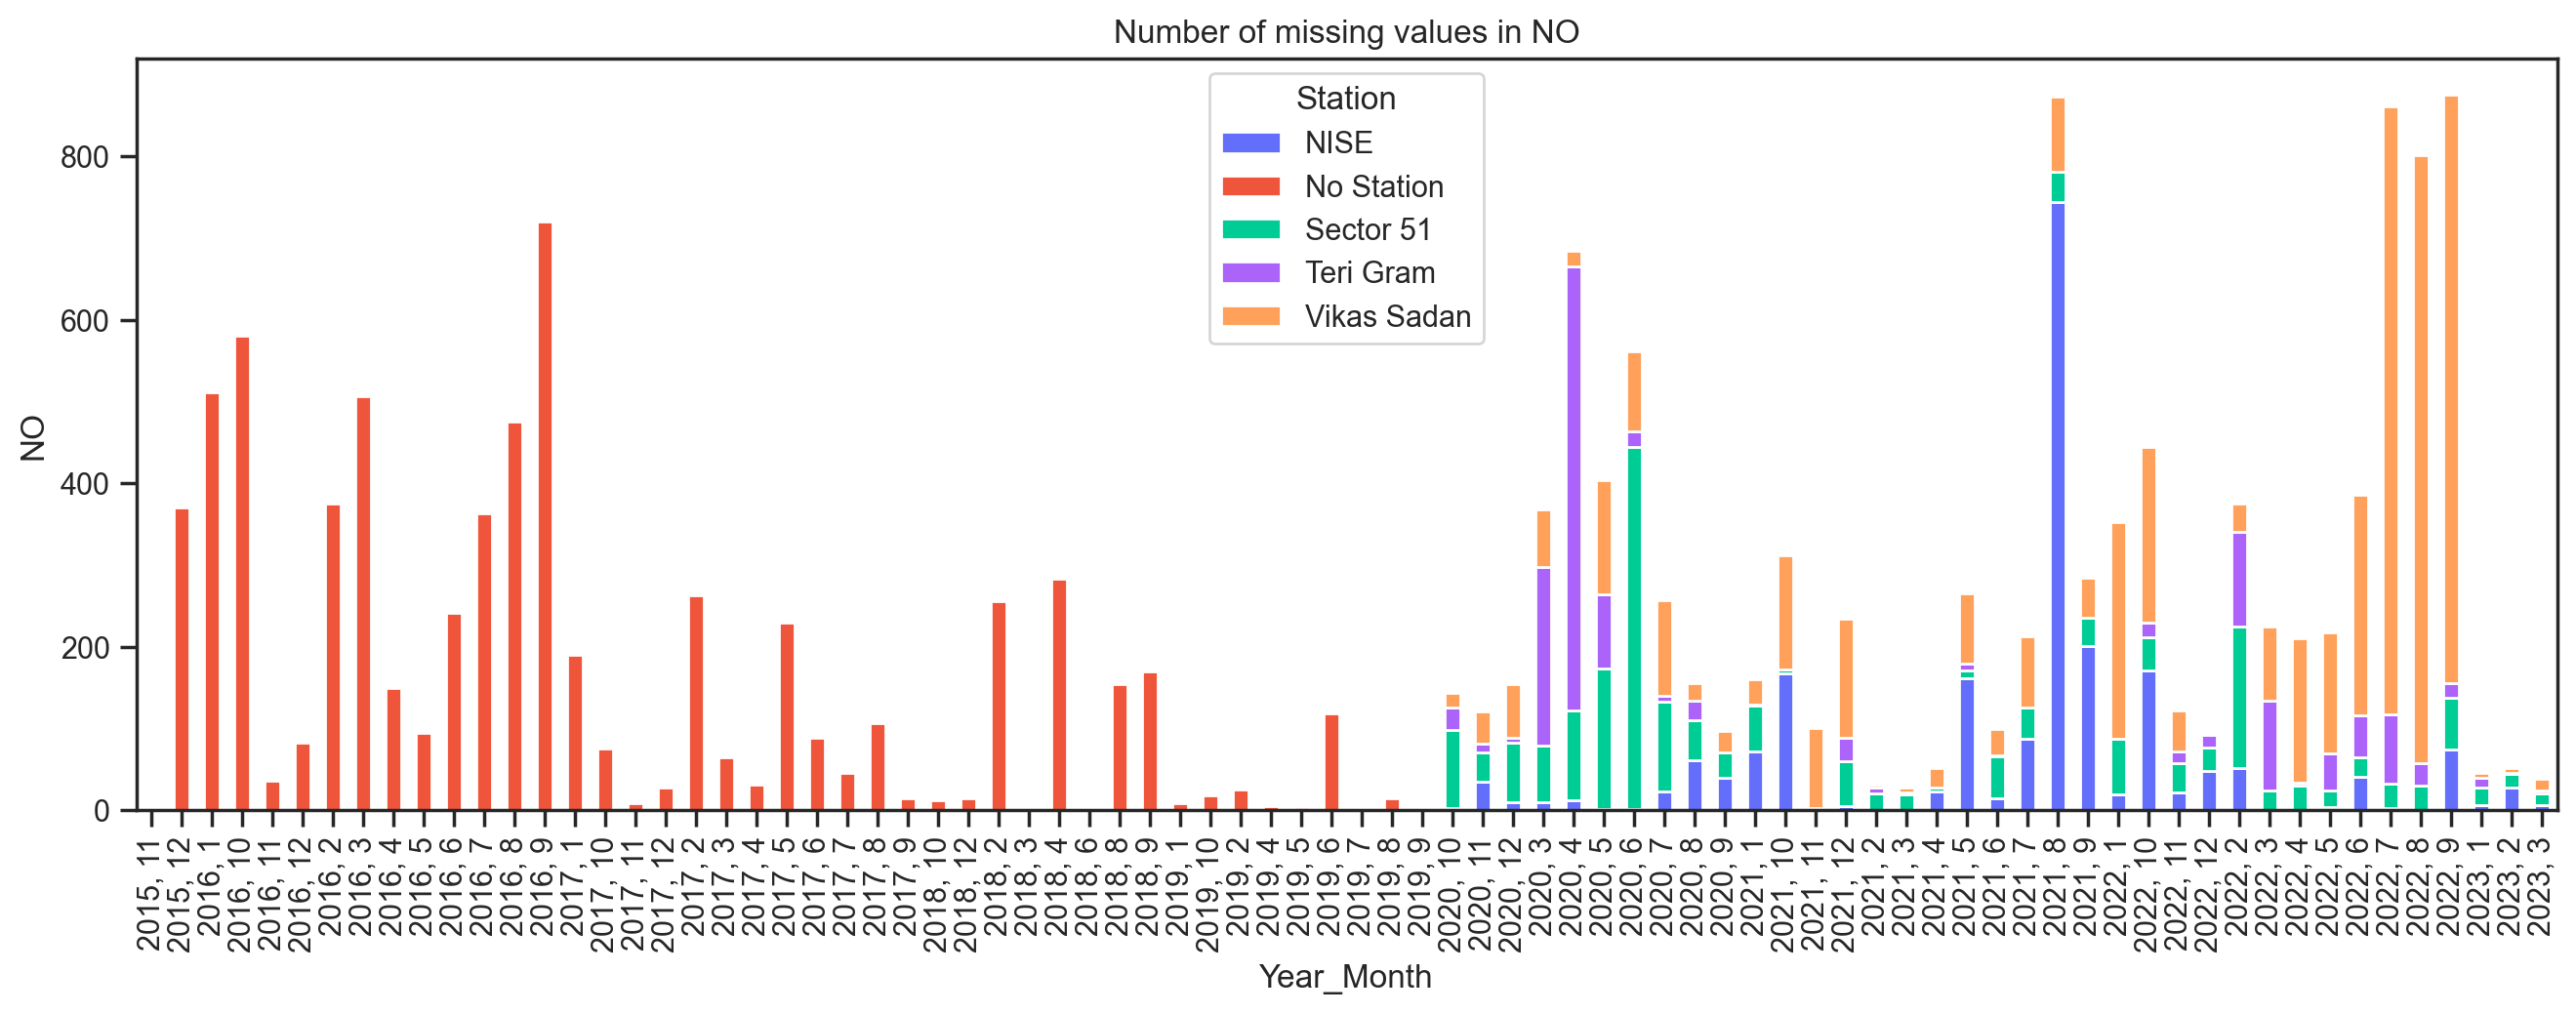

Text(0.5, 0, 'Year_Month')

Text(0, 0.5, 'NO2')

Text(0.5, 1.0, 'Number of missing values in NO2')

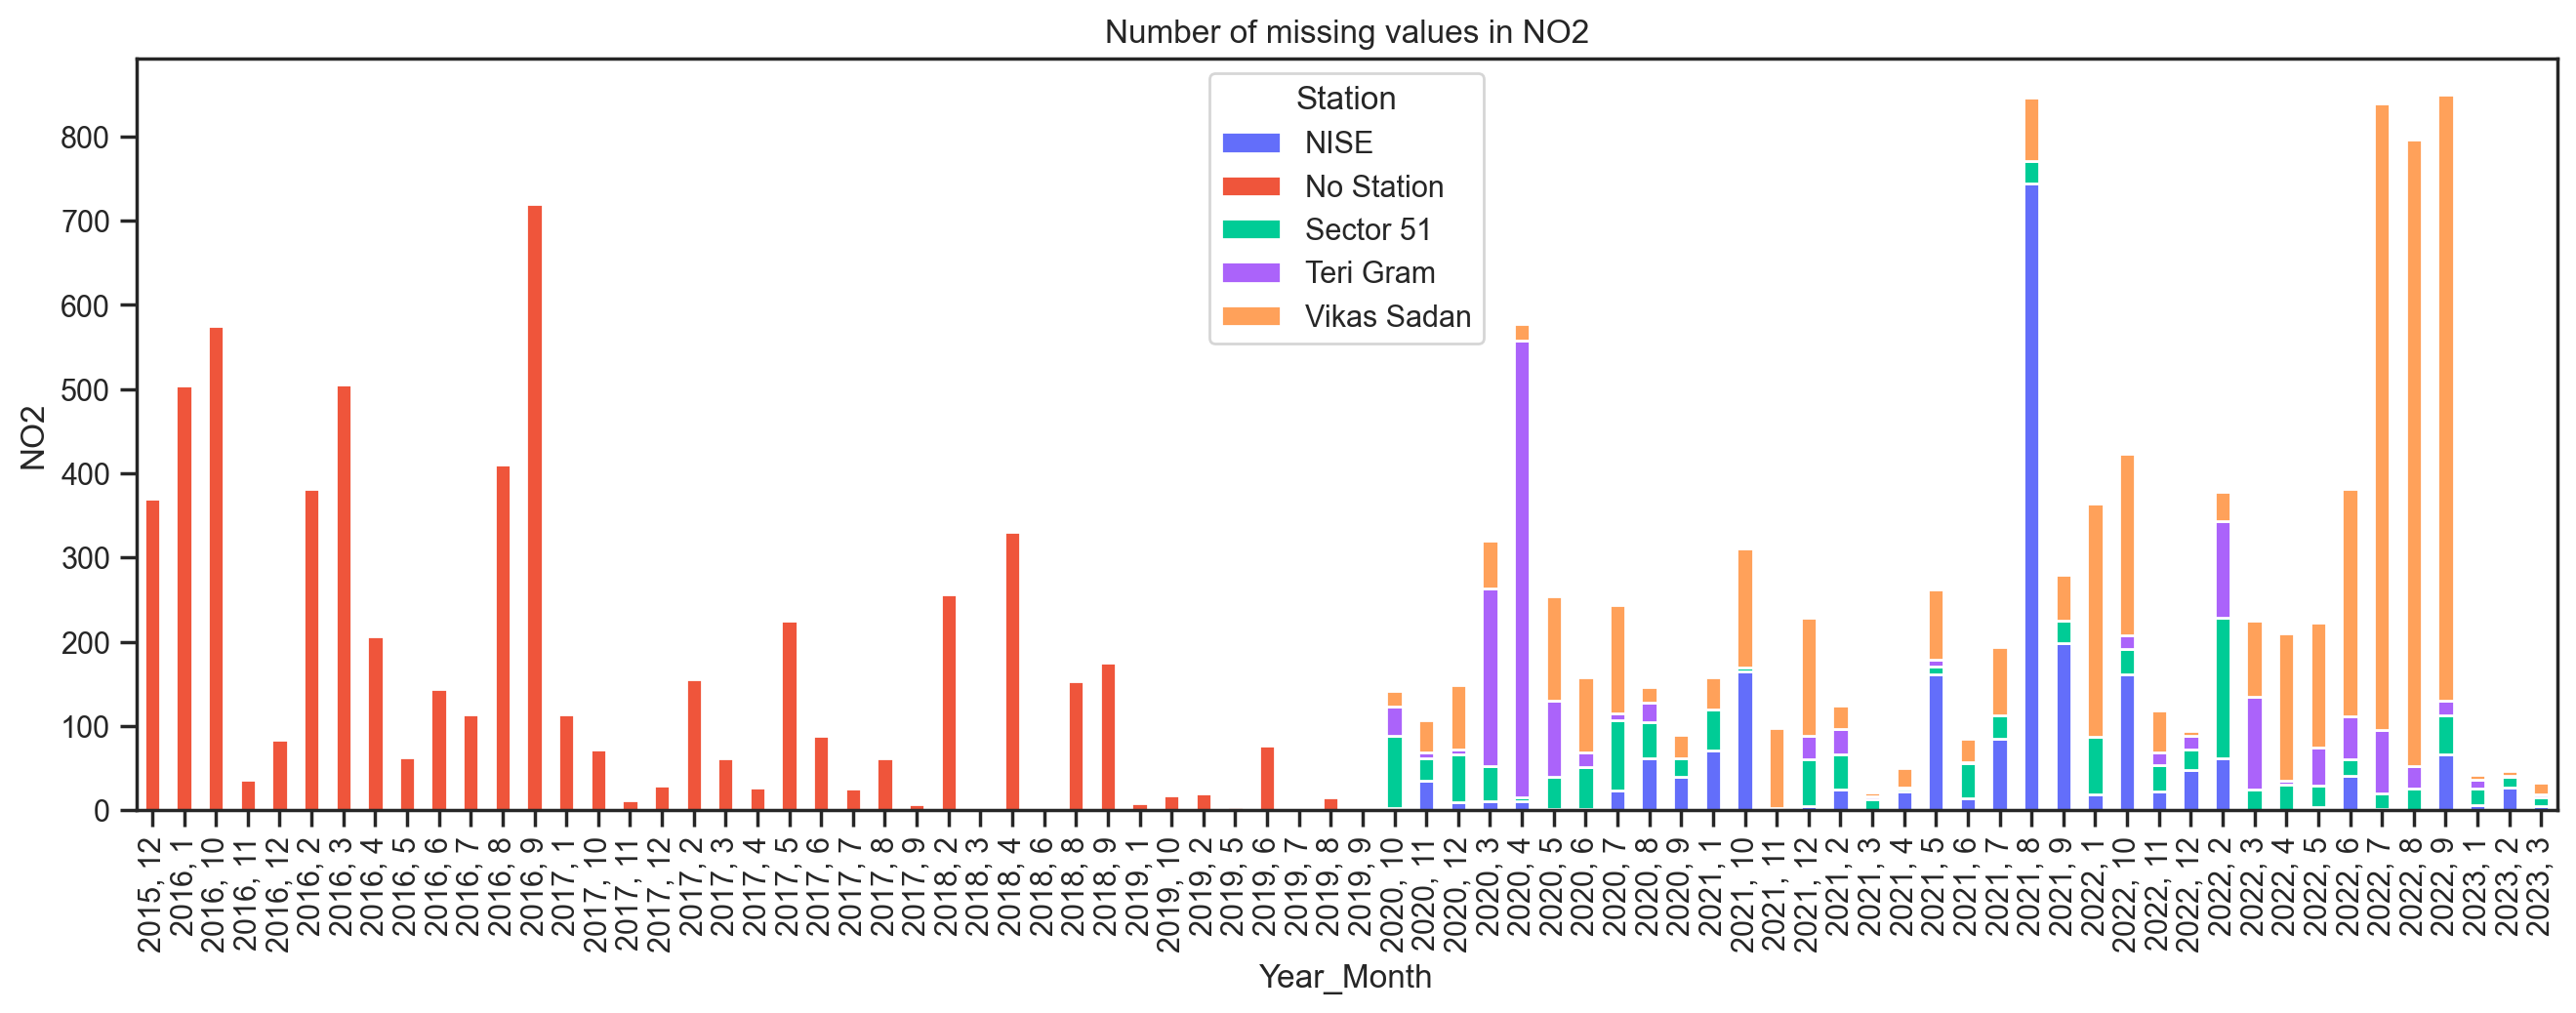

Text(0.5, 0, 'Year_Month')

Text(0, 0.5, 'NOx')

Text(0.5, 1.0, 'Number of missing values in NOx')

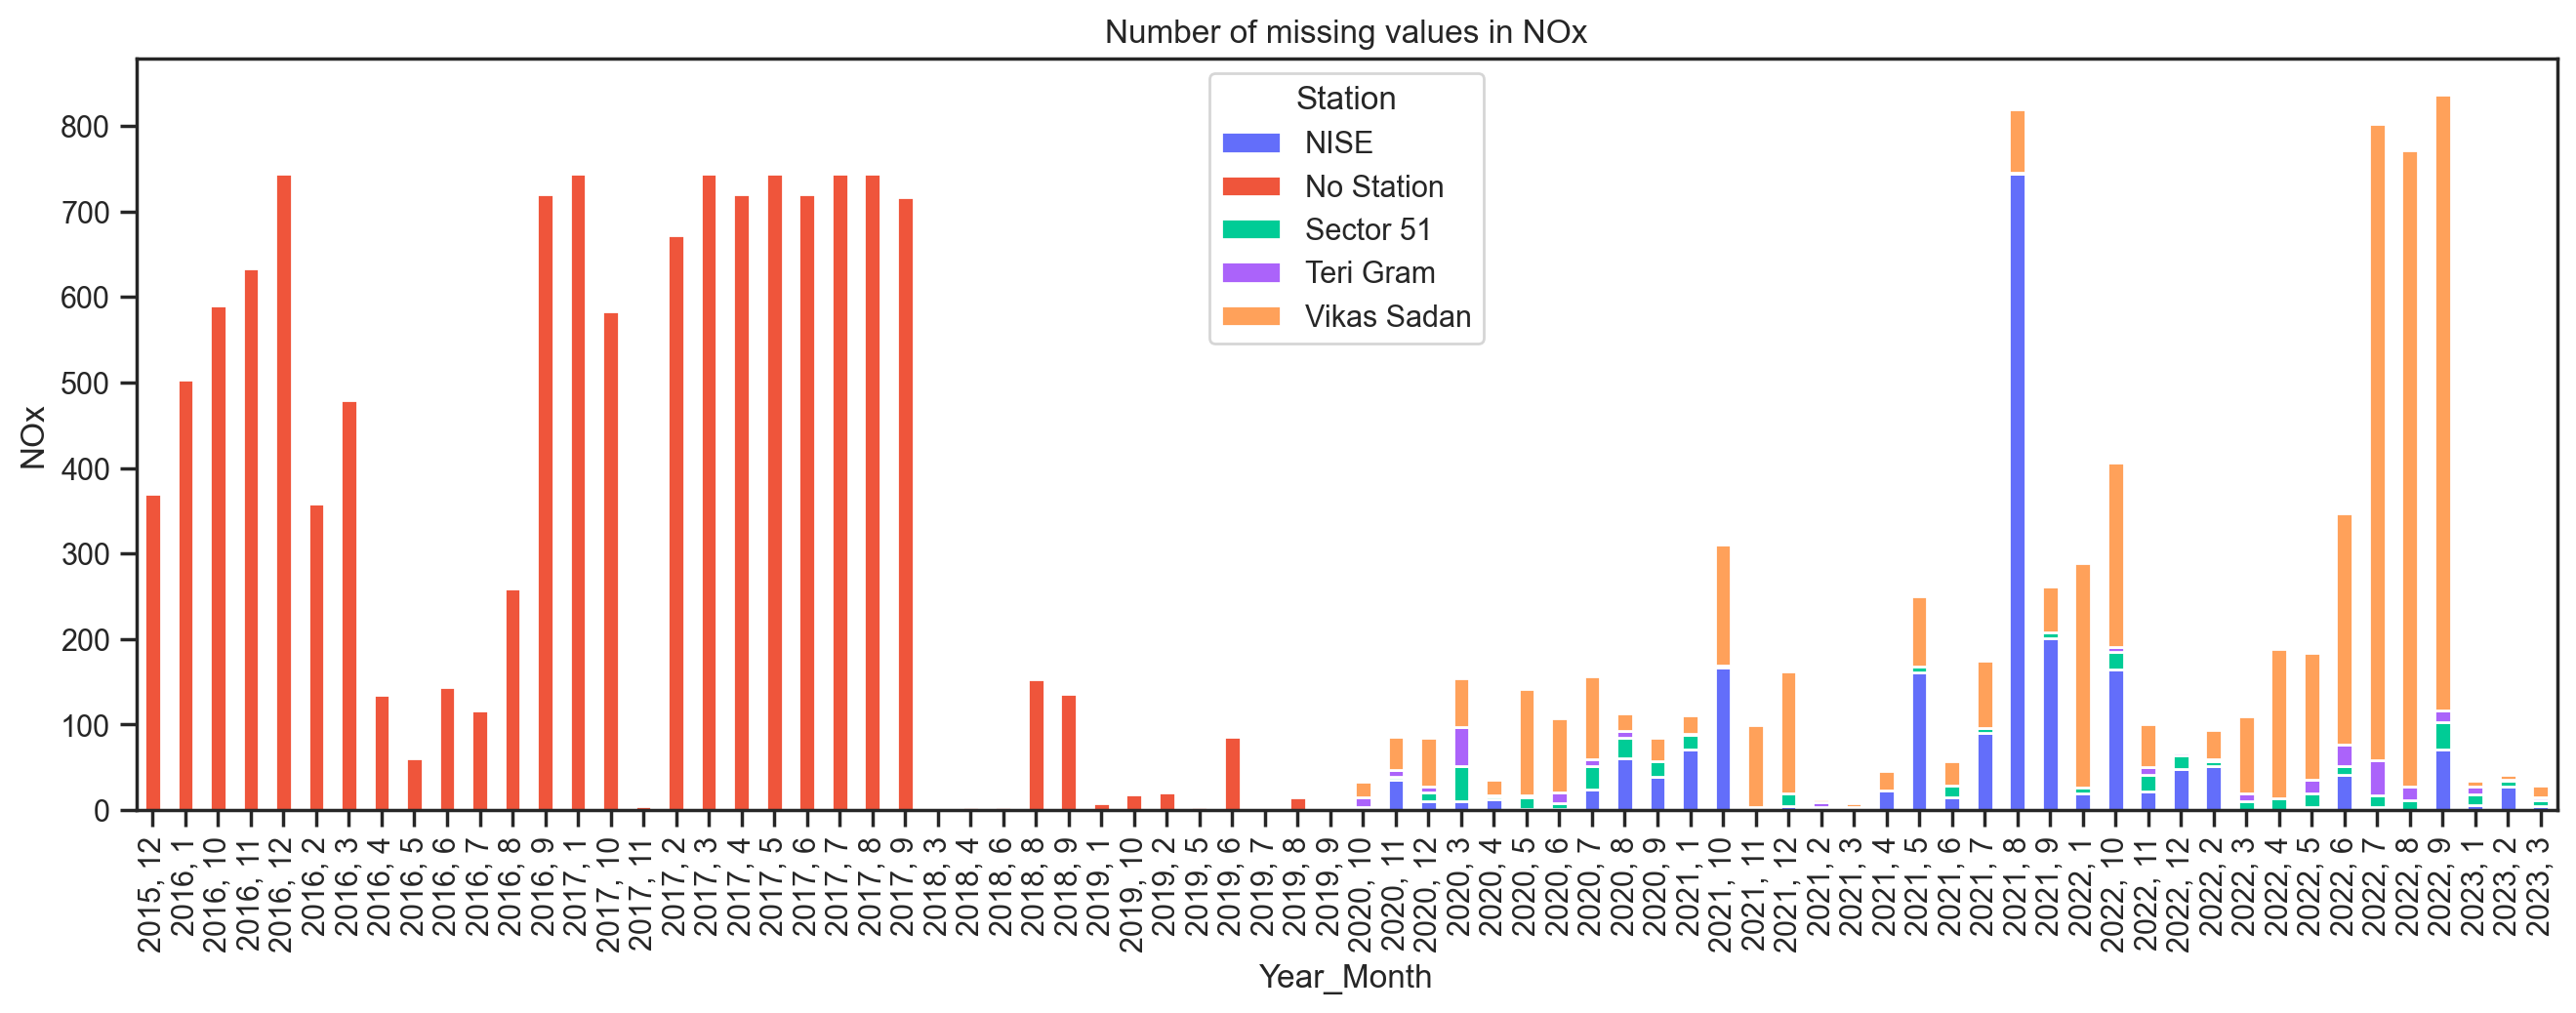

Text(0.5, 0, 'Year_Month')

Text(0, 0.5, 'CO')

Text(0.5, 1.0, 'Number of missing values in CO')

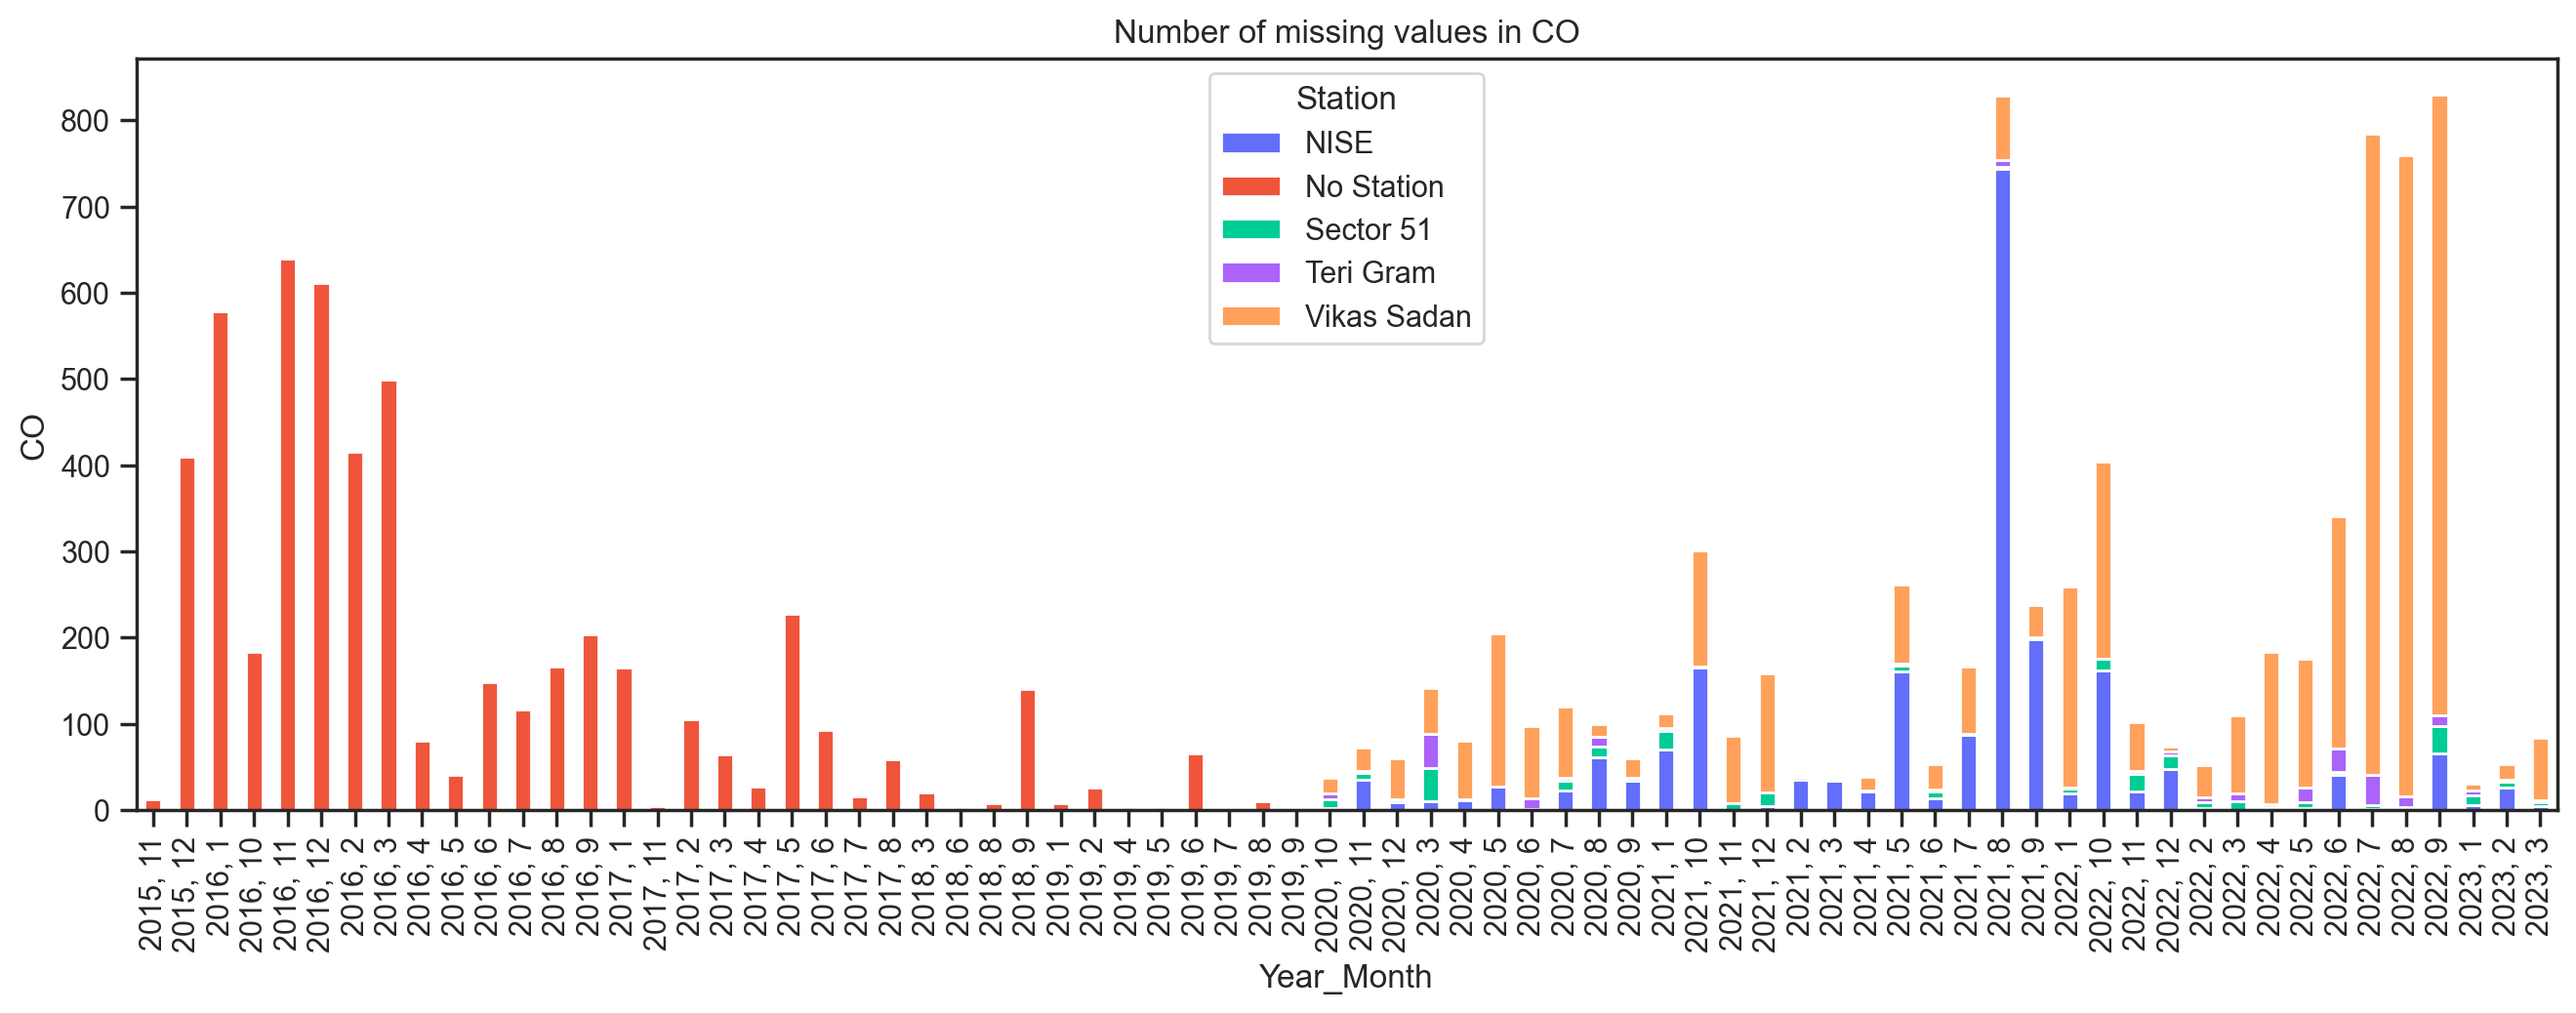

Text(0.5, 0, 'Year_Month')

Text(0, 0.5, 'PM10')

Text(0.5, 1.0, 'Number of missing values in PM10')

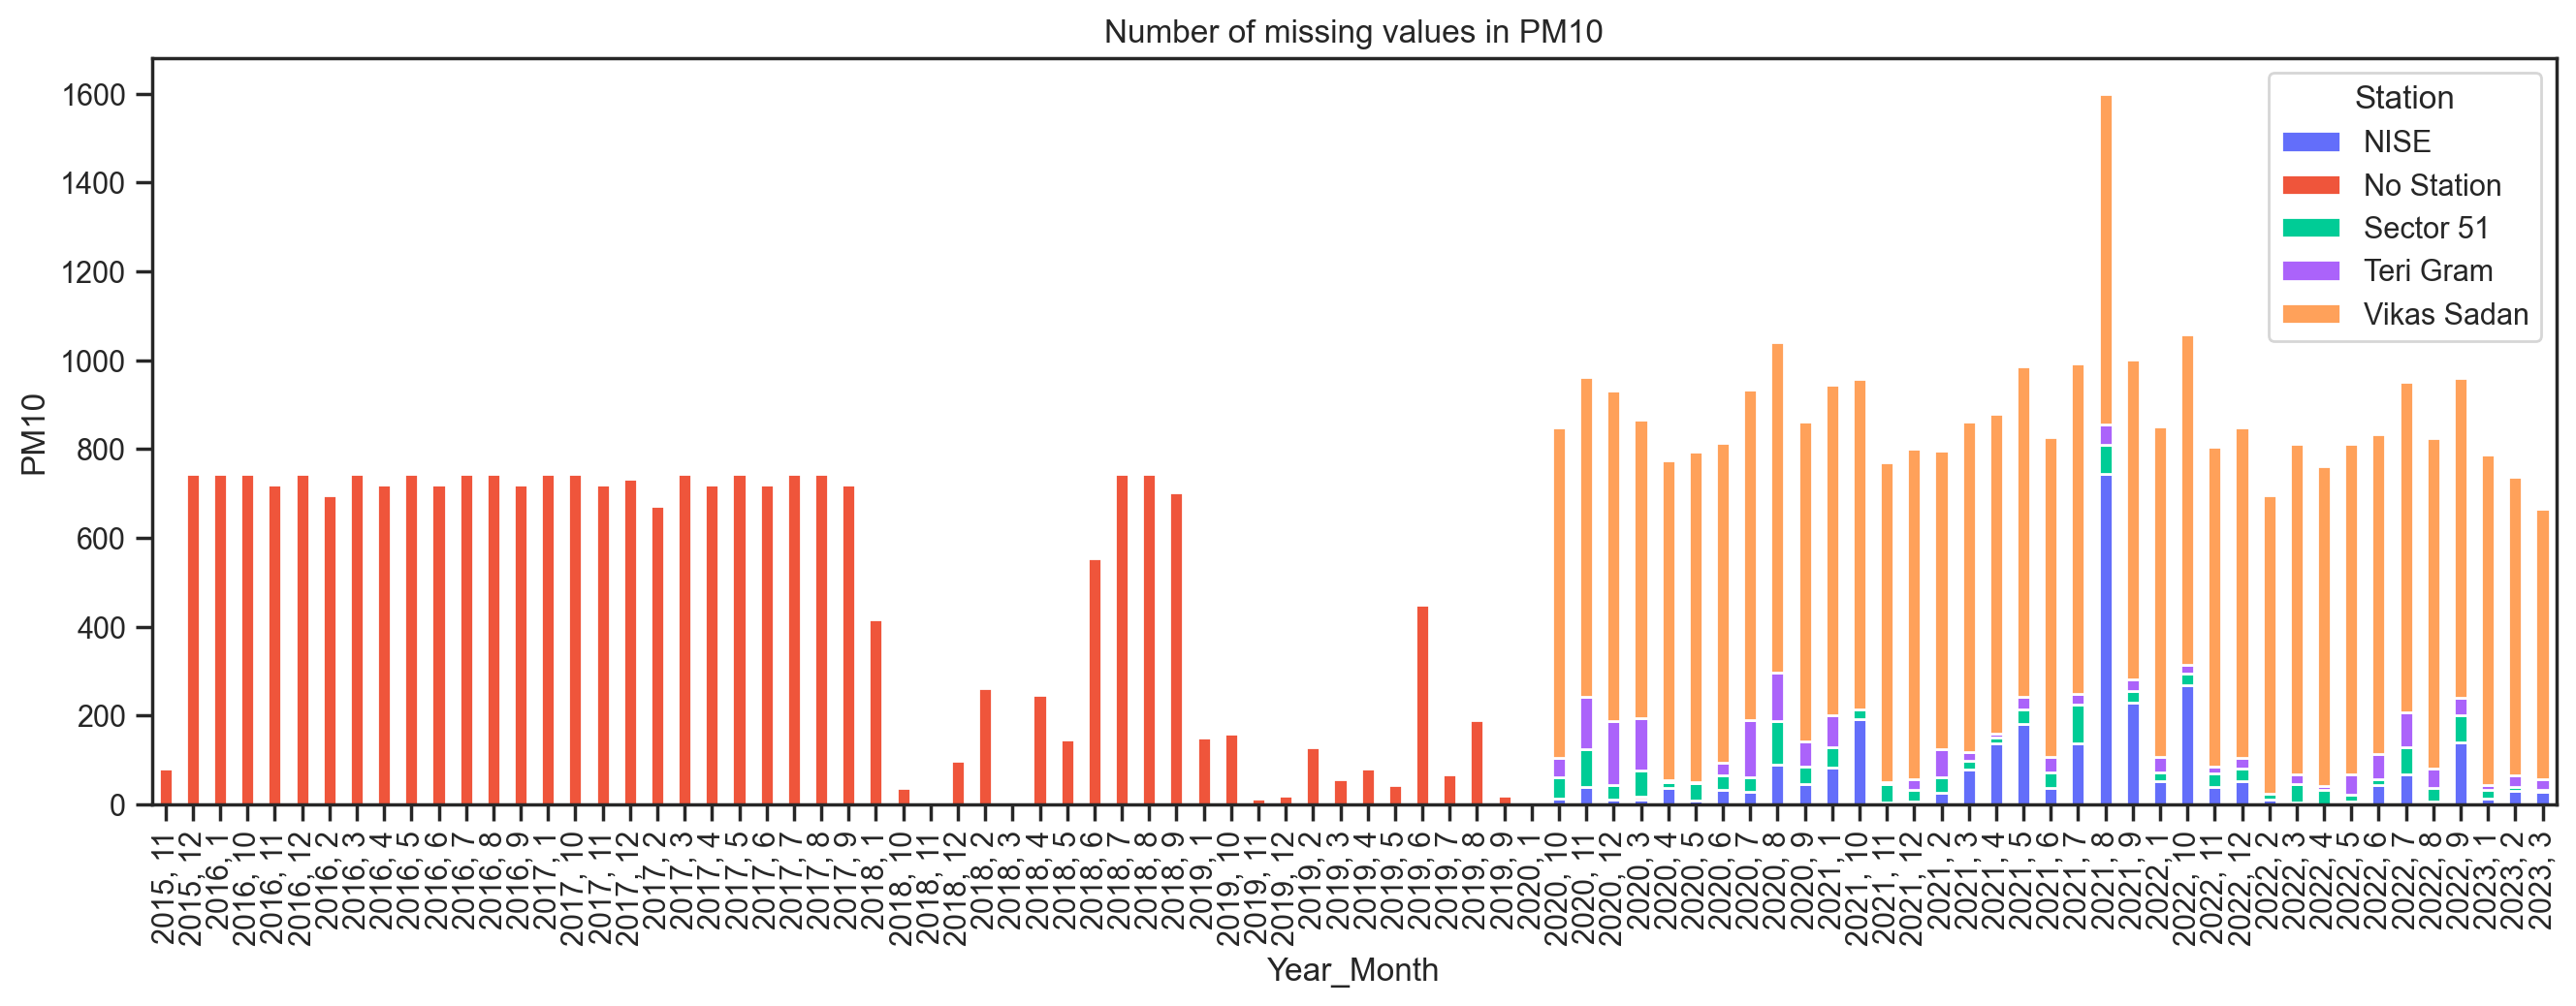

Text(0.5, 0, 'Year_Month')

Text(0, 0.5, 'SO2')

Text(0.5, 1.0, 'Number of missing values in SO2')

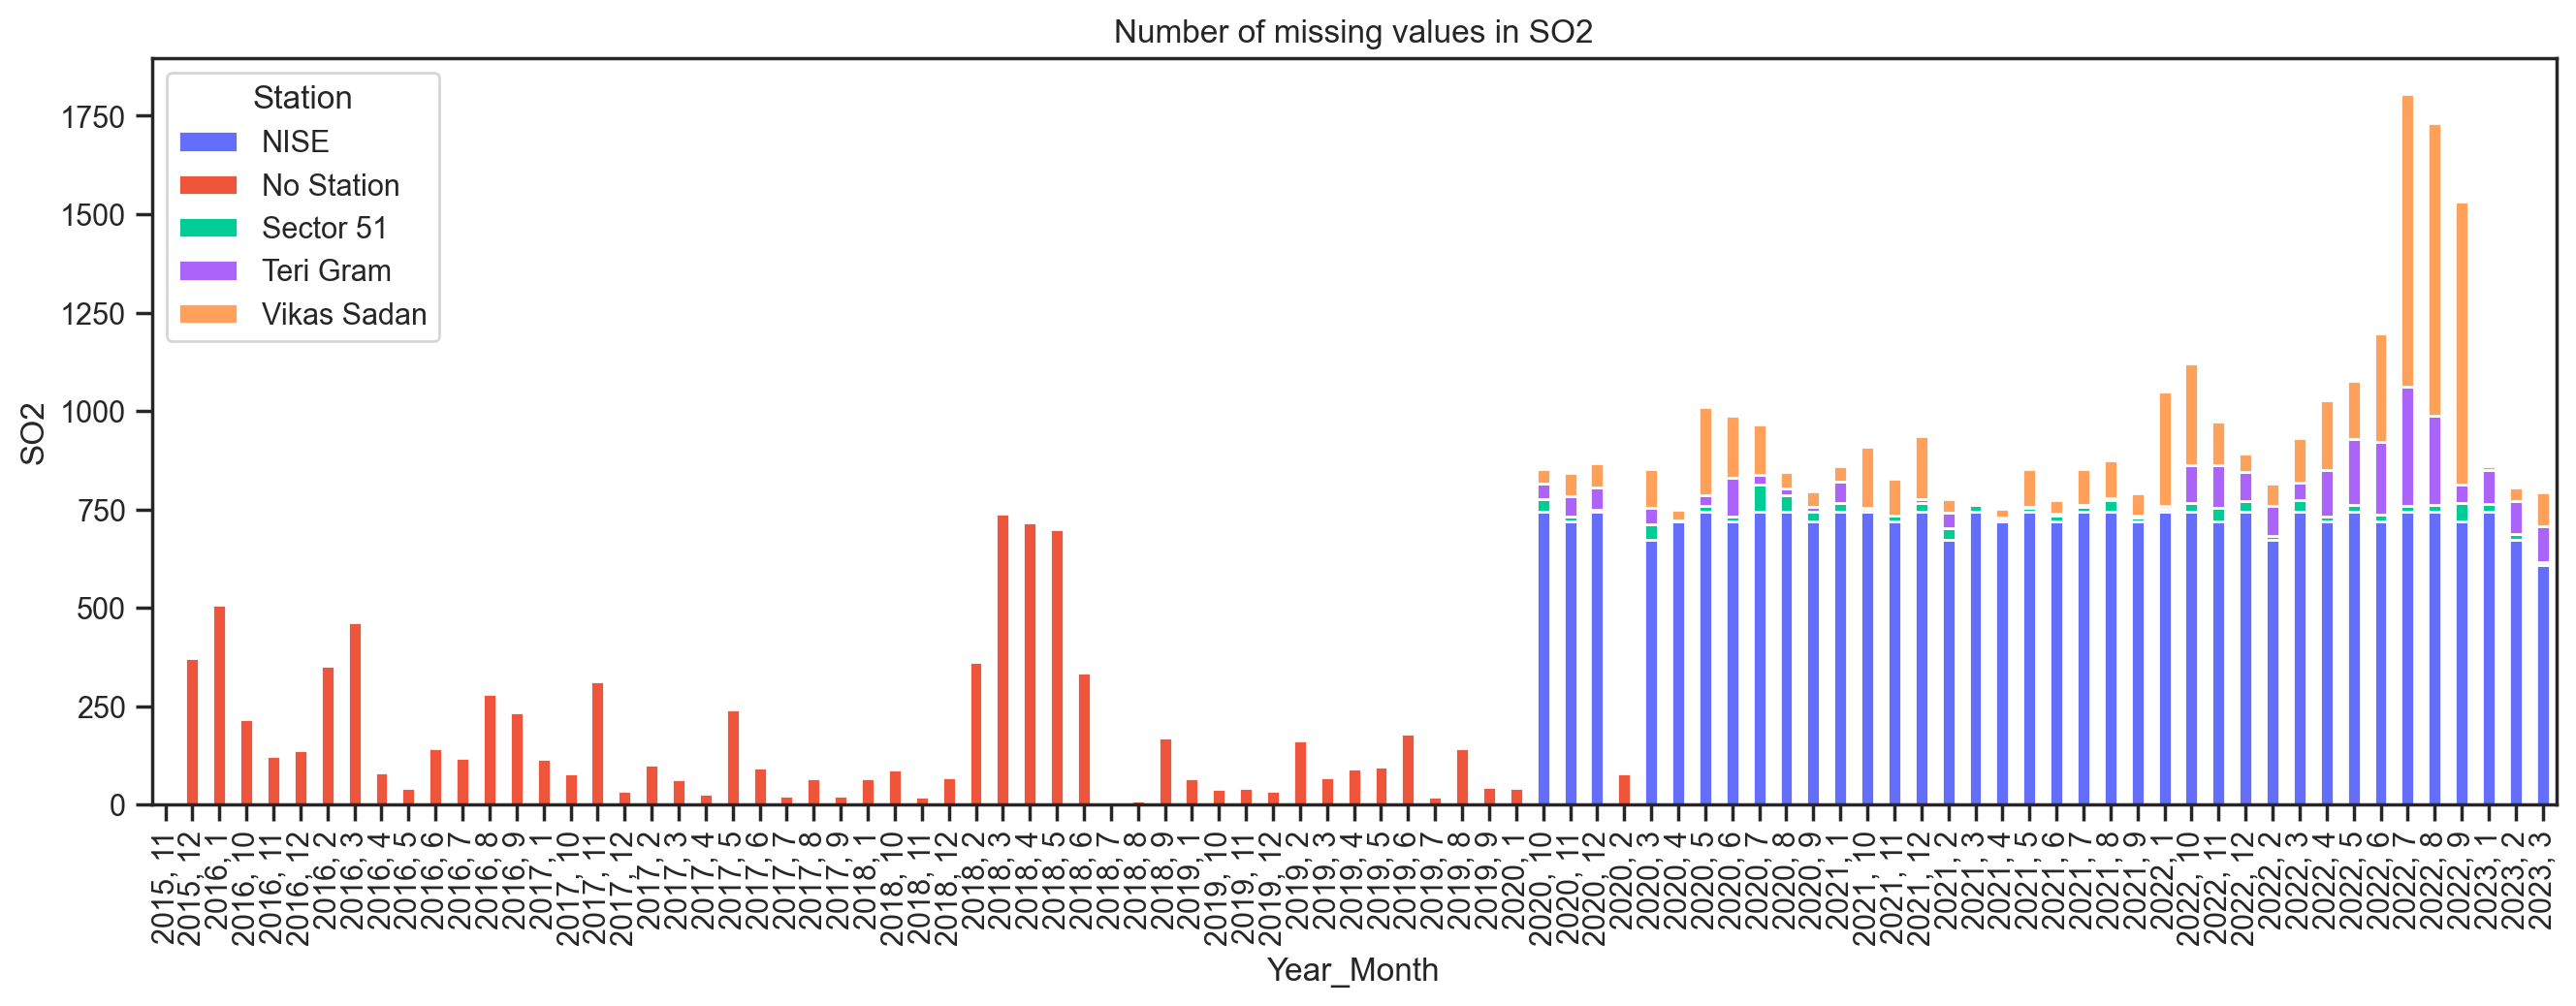

In [75]:
for col in ["PM2.5", "NO", "NO2", "NOx", "CO","PM10", "SO2"]:
    temp_df_plot = helper_2(compiled.copy(deep=True), col)
    ax = temp_df_plot.groupby(['Year_Month', 'Station'])[col].sum().unstack().plot(kind='bar', stacked=True, figsize=(16, 5), color=custom_colors)

    # Set labels and title
    plt.xlabel('Year_Month')
    plt.ylabel(col)
    plt.title('Number of missing values in ' + col)

    # Display the plot
    plt.show()

In [212]:
for col in ["PM2.5", "NO", "NO2", "NOx", "CO","PM10", "SO2"]:
    px.bar(data_frame = helper_2(compiled.copy(deep=True), col),
           x = "Year_Month",
           y = col,
           color="Station",
           text_auto = True,
           title = "No. of missing values in "+ col
           )

In [76]:
compiled.groupby(['Year','Month','Station'])['SO2'].count().reset_index()[-30:]
compiled.groupby(['Year','Month'])['SO2'].count().reset_index()[-10:]

Year  Month      Station  SO2
175  2022      8    Teri Gram  517
176  2022      8  Vikas Sadan    0
177  2022      9         NISE    0
178  2022      9    Sector 51  675
179  2022      9    Teri Gram  673
180  2022      9  Vikas Sadan    0
181  2022     10         NISE    0
182  2022     10    Sector 51  723
183  2022     10    Teri Gram  646
184  2022     10  Vikas Sadan  485
185  2022     11         NISE    0
186  2022     11    Sector 51  687
187  2022     11    Teri Gram  610
188  2022     11  Vikas Sadan  609
189  2022     12         NISE    0
190  2022     12    Sector 51  718
191  2022     12    Teri Gram  670
192  2022     12  Vikas Sadan  697
193  2023      1         NISE    0
194  2023      1    Sector 51  724
195  2023      1    Teri Gram  658
196  2023      1  Vikas Sadan  735
197  2023      2         NISE    0
198  2023      2    Sector 51  657
199  2023      2    Teri Gram  587
200  2023      2  Vikas Sadan  638
201  2023      3         NISE    0
202  2023      3    Sector 51  608
203  2023      3    Teri Gram  518
204  2023      3  Vikas Sadan  523

Year  Month   SO2
79  2022      6  1683
80  2022      7  1170
81  2022      8  1244
82  2022      9  1348
83  2022     10  1854
84  2022     11  1906
85  2022     12  2085
86  2023      1  2117
87  2023      2  1882
88  2023      3  1649

In [77]:
compiled.groupby(['Year', 'Month'])['PM10'].count().reset_index()

Year  Month  PM10
0   2015     11     0
1   2015     12     0
2   2016      1     0
3   2016      2     0
4   2016      3     0
..   ...    ...   ...
84  2022     11  2075
85  2022     12  2127
86  2023      1  2188
87  2023      2  1951
88  2023      3  1776

[89 rows x 3 columns]

In [78]:
compiled.sort_values(['Year'])

Datetime      Station   PM2.5     NO    NO2    NOx     SO2  \
107958 2015-12-26 04:00:00   No Station     NaN  16.67  17.24  17.71    4.05   
107816 2015-12-20 06:00:00   No Station     NaN    NaN    NaN    NaN     NaN   
107817 2015-12-20 07:00:00   No Station     NaN    NaN    NaN    NaN     NaN   
107818 2015-12-20 08:00:00   No Station     NaN    NaN    NaN    NaN     NaN   
107819 2015-12-20 09:00:00   No Station     NaN    NaN    NaN    NaN     NaN   
...                    ...          ...     ...    ...    ...    ...     ...   
25462  2023-01-28 22:00:00  Vikas Sadan  222.74  16.31  28.29  35.02  169.14   
25461  2023-01-28 21:00:00  Vikas Sadan  174.74  16.61  28.79  35.22  148.72   
25460  2023-01-28 20:00:00  Vikas Sadan  160.08  16.43  28.36  34.12  119.96   
25473  2023-01-29 09:00:00  Vikas Sadan  145.97  23.76  26.68  55.71  106.81   
107271 2023-03-26 06:00:00    Teri Gram  105.82  12.70   6.06  13.35   14.45   

          CO   Ozone  Benzene  ...    NH3  CO2   O3  AQI  AQI_Bucket  Day  \
107958  1.53     NaN      NaN  ...    NaN  NaN  3.4  NaN         nan   26   
107816   NaN     NaN      NaN  ...    NaN  NaN  NaN  NaN         nan   20   
107817   NaN     NaN      NaN  ...    NaN  NaN  NaN  NaN         nan   20   
107818   NaN     NaN      NaN  ...    NaN  NaN  NaN  NaN         nan   20   
107819   NaN     NaN      NaN  ...    NaN  NaN  NaN  NaN         nan   20   
...      ...     ...      ...  ...    ...  ...  ...  ...         ...  ...   
25462   1.30  110.13     6.25  ...    NaN  NaN  NaN  NaN         nan   28   
25461   2.56  157.35     6.31  ...    NaN  NaN  NaN  NaN         nan   28   
25460   1.80   95.86     6.27  ...    NaN  NaN  NaN  NaN         nan   28   
25473   0.99   32.12     7.44  ...    NaN  NaN  NaN  NaN         nan   29   
107271  0.66   23.56     7.39  ...  46.92  NaN  NaN  NaN         nan   26   

        Month  Year  Week  Hour  
107958     12  2015    52     4  
107816     12  2015    51     6  
107817     12  2015    51     7  
107818     12  2015    51     8  
107819     12  2015    51     9  
...       ...   ...   ...   ...  
25462       1  2023     4    22  
25461       1  2023     4    21  
25460       1  2023     4    20  
25473       1  2023     4     9  
107271      3  2023    12     6  

[147531 rows x 36 columns]

In [79]:
compiled[compiled["SO2"].isna()]

Datetime      Station  PM2.5     NO    NO2    NOx  SO2  \
64     2020-03-06 16:00:00  Vikas Sadan  13.32   7.66  51.92  31.73  NaN   
97     2020-03-08 01:00:00  Vikas Sadan    NaN    NaN    NaN    NaN  NaN   
100    2020-03-08 04:00:00  Vikas Sadan    NaN    NaN    NaN    NaN  NaN   
127    2020-03-09 07:00:00  Vikas Sadan    NaN    NaN    NaN    NaN  NaN   
137    2020-03-09 17:00:00  Vikas Sadan    NaN    NaN    NaN    NaN  NaN   
...                    ...          ...    ...    ...    ...    ...  ...   
144550 2020-02-27 20:00:00   No Station  75.94  16.15  67.78  53.32  NaN   
144591 2020-02-29 13:00:00   No Station  72.79   7.37   9.25  16.62  NaN   
144592 2020-02-29 14:00:00   No Station  65.91   7.21   8.57  15.78  NaN   
144593 2020-02-29 15:00:00   No Station  69.50   7.35   9.77  17.11  NaN   
144595 2020-02-29 17:00:00   No Station  66.87   7.11   9.68  16.78  NaN   

          CO  Ozone  Benzene  ...  NH3  CO2     O3    AQI  AQI_Bucket  Day  \
64      2.90   45.1     2.00  ...  NaN  NaN    NaN    NaN         nan    6   
97       NaN    NaN      NaN  ...  NaN  NaN    NaN    NaN         nan    8   
100      NaN    NaN      NaN  ...  NaN  NaN    NaN    NaN         nan    8   
127      NaN    NaN      NaN  ...  NaN  NaN    NaN    NaN         nan    9   
137      NaN    NaN      NaN  ...  NaN  NaN    NaN    NaN         nan    9   
...      ...    ...      ...  ...  ...  ...    ...    ...         ...  ...   
144550  1.48    NaN     1.93  ...  NaN  NaN  24.48  195.0    Moderate   27   
144591  1.39    NaN      NaN  ...  NaN  NaN  68.43  120.0    Moderate   29   
144592  1.35    NaN      NaN  ...  NaN  NaN  74.62  119.0    Moderate   29   
144593  1.38    NaN      NaN  ...  NaN  NaN  76.68  118.0    Moderate   29   
144595  1.38    NaN      NaN  ...  NaN  NaN  73.31  118.0    Moderate   29   

        Month  Year  Week  Hour  
64          3  2020    10    16  
97          3  2020    10     1  
100         3  2020    10     4  
127         3  2020    11     7  
137         3  2020    11    17  
...       ...   ...   ...   ...  
144550      2  2020     9    20  
144591      2  2020     9    13  
144592      2  2020     9    14  
144593      2  2020     9    15  
144595      2  2020     9    17  

[43996 rows x 36 columns]

In [80]:
# sns.lineplot(data = vikas_sadan[vikas_sadan['SO2'].isna()], x="Datetime", y="SO2")
# Since there are only NaNs it is keyError, there is nothing to plot.

<Figure size 1400x500 with 0 Axes>

<AxesSubplot: xlabel='Datetime', ylabel='NO'>

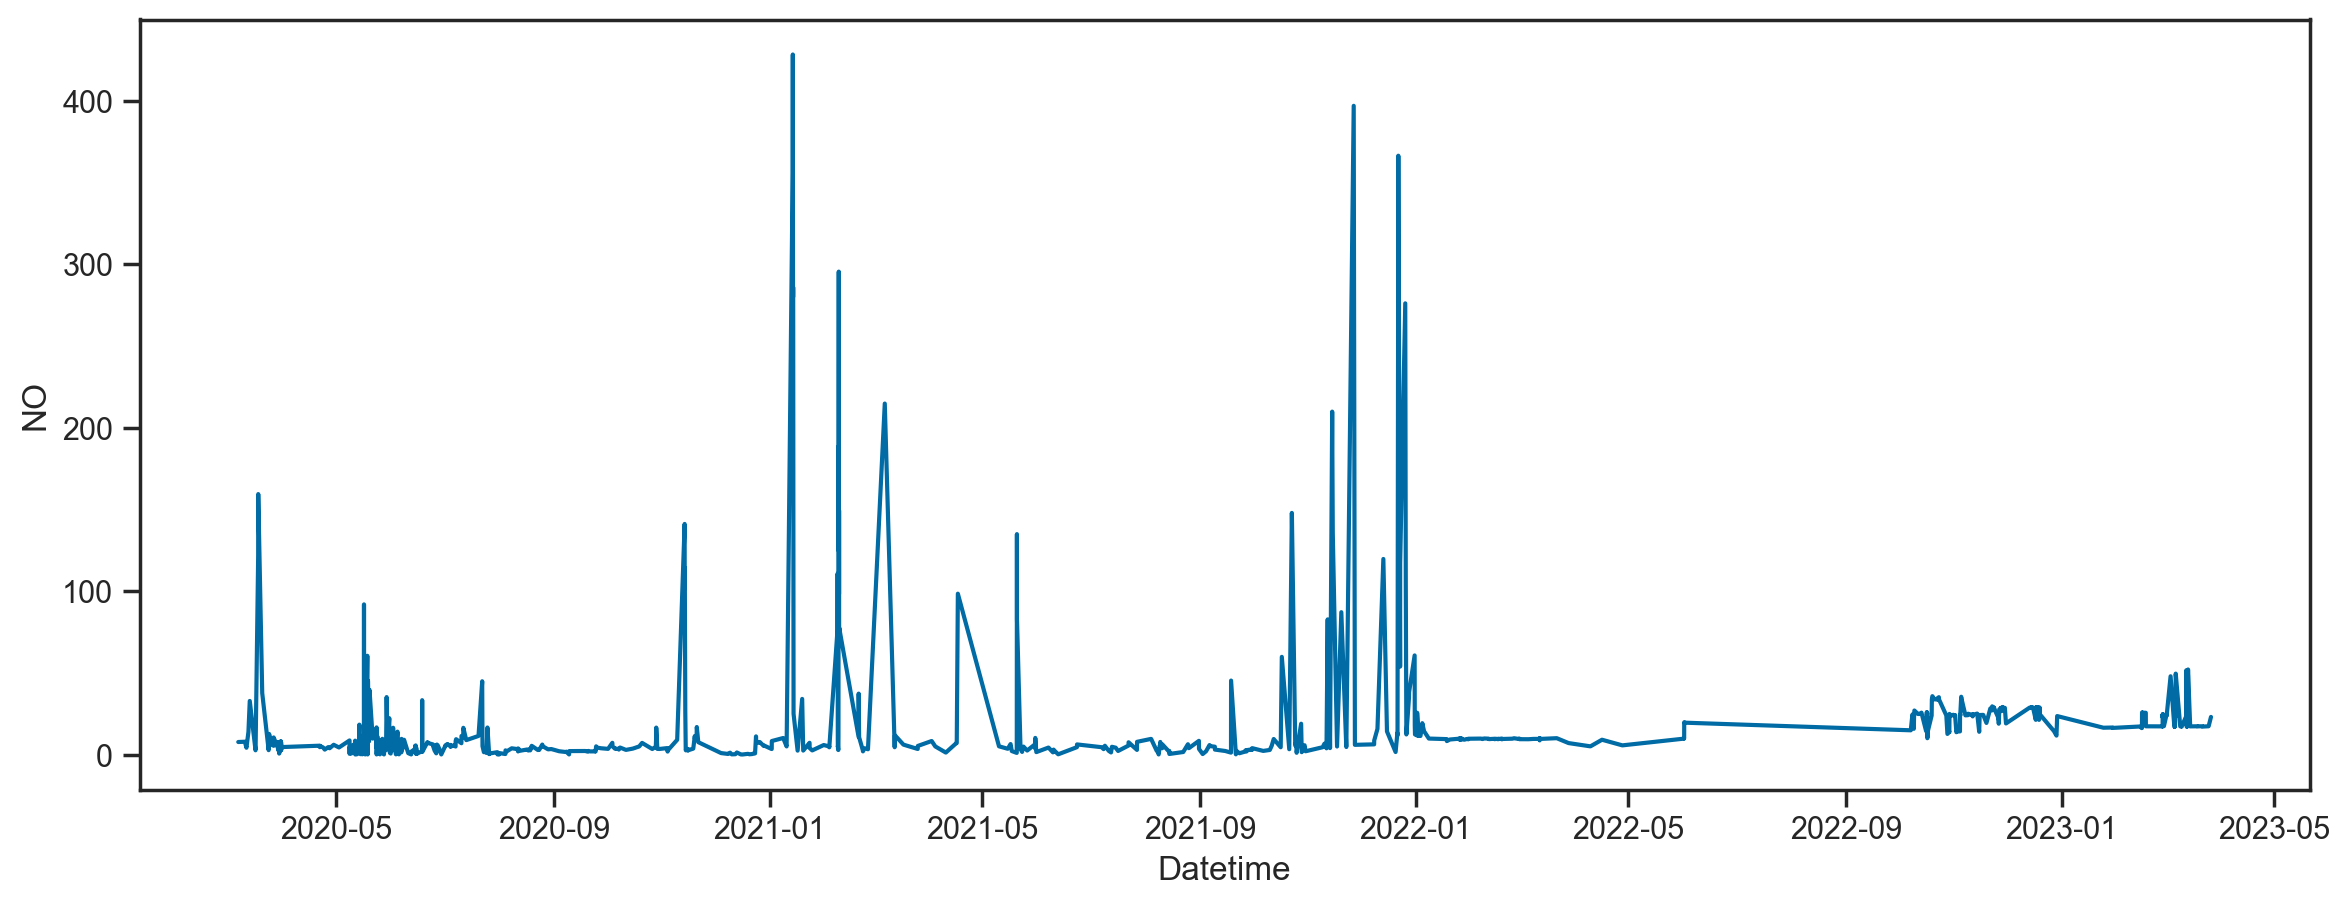

In [81]:
plt.figure(figsize=(14,5))
sns.lineplot(data = vikas_sadan[vikas_sadan['SO2'].isna()], x="Datetime", y="NO")

In [82]:
# Since this is a time series data, use ffill, bfill, linear interpolation for filling NAs
compiled['Datetime'][:107273]
compiled['Datetime'][107273:]

0        2020-03-04 00:00:00
1        2020-03-04 01:00:00
2        2020-03-04 02:00:00
3        2020-03-04 03:00:00
4        2020-03-04 04:00:00
                 ...        
107268   2023-03-26 03:00:00
107269   2023-03-26 04:00:00
107270   2023-03-26 05:00:00
107271   2023-03-26 06:00:00
107272   2023-03-26 07:00:00
Name: Datetime, Length: 107273, dtype: datetime64[ns]

107273   2015-11-27 15:00:00
107274   2015-11-27 16:00:00
107275   2015-11-27 17:00:00
107276   2015-11-27 18:00:00
107277   2015-11-27 19:00:00
                 ...        
147526   2020-06-30 20:00:00
147527   2020-06-30 21:00:00
147528   2020-06-30 22:00:00
147529   2020-06-30 23:00:00
147530   2020-07-01 00:00:00
Name: Datetime, Length: 40258, dtype: datetime64[ns]

<Figure size 2000x800 with 0 Axes>

<AxesSubplot: xlabel='Datetime', ylabel='SO2'>

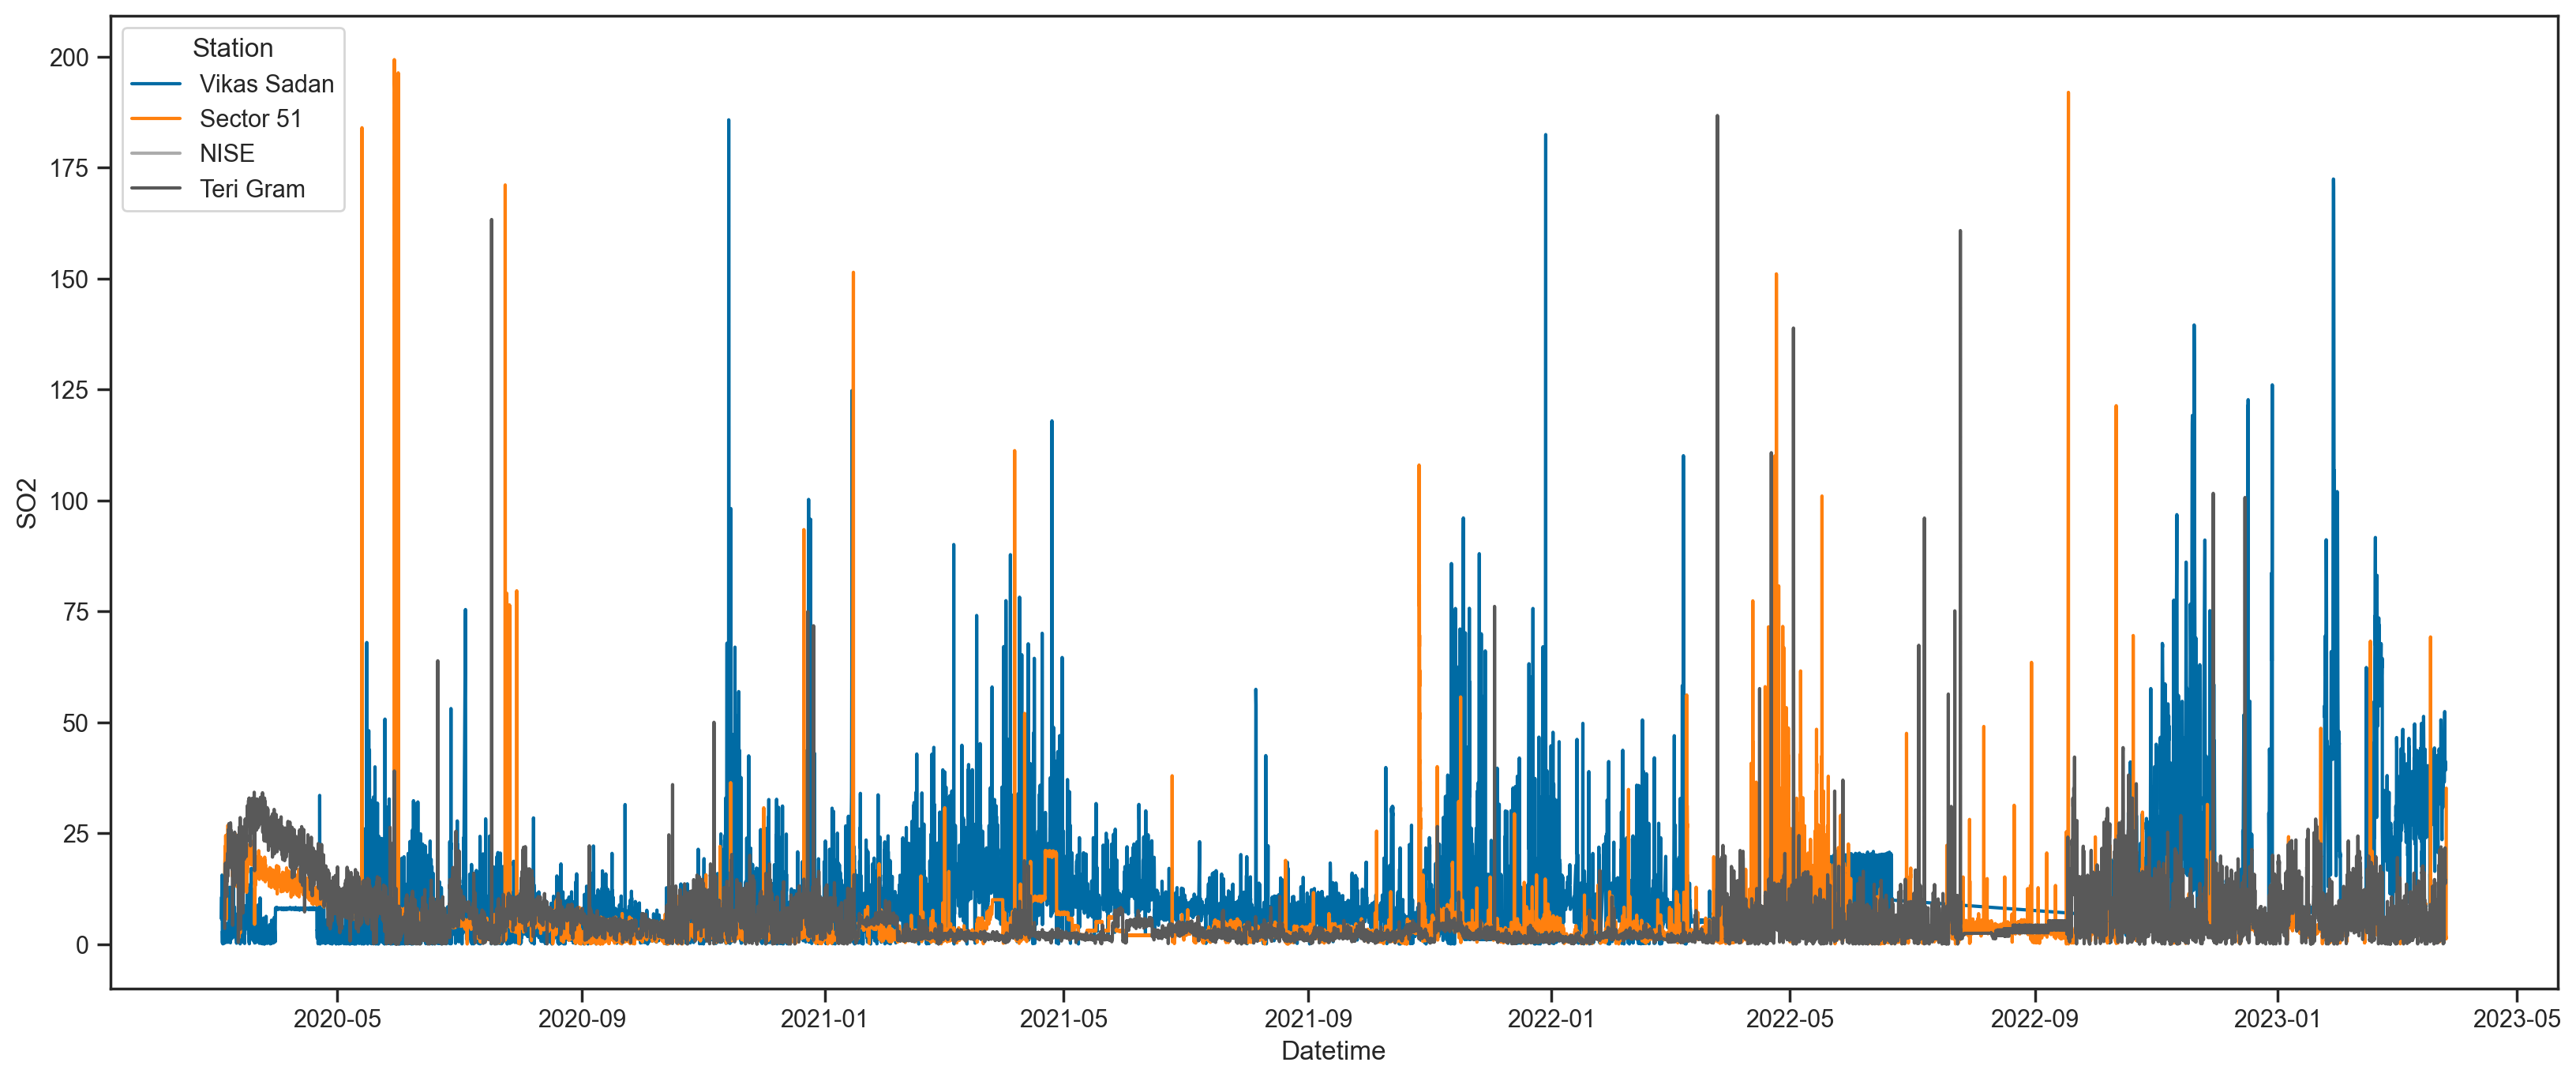

In [83]:
plt.figure(figsize=(20,8))
sns.lineplot(data=compiled[:107273], x="Datetime", y="SO2", hue="Station")

<Figure size 2000x800 with 0 Axes>

<AxesSubplot: xlabel='Datetime', ylabel='SO2'>

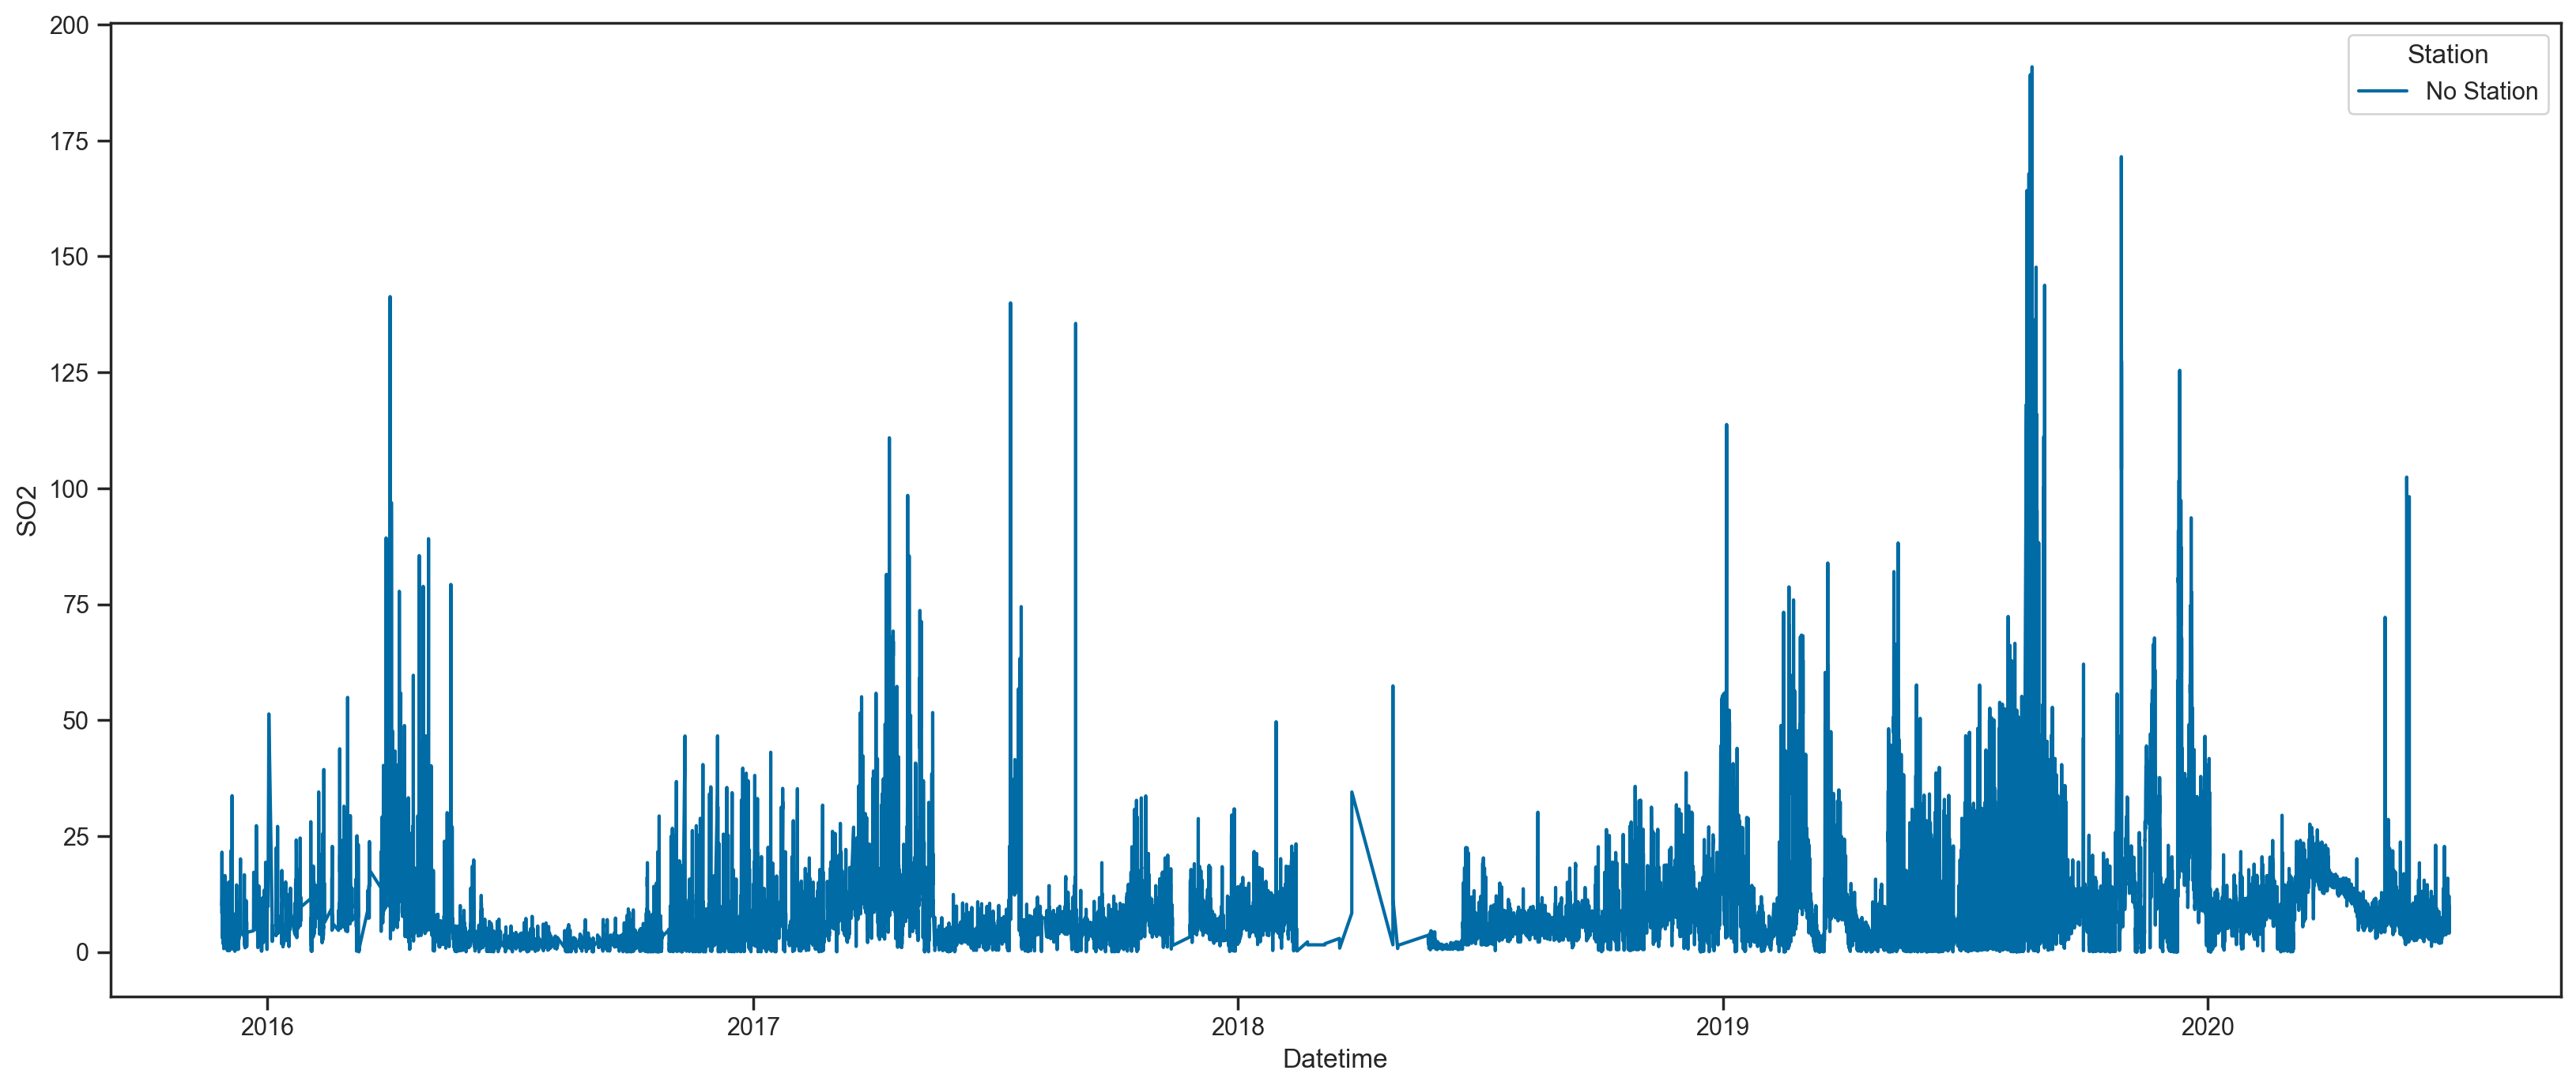

In [84]:
plt.figure(figsize=(20,8))
sns.lineplot(data=compiled[107273:], x="Datetime", y="SO2", hue="Station")

<AxesSubplot: ylabel='SO2'>

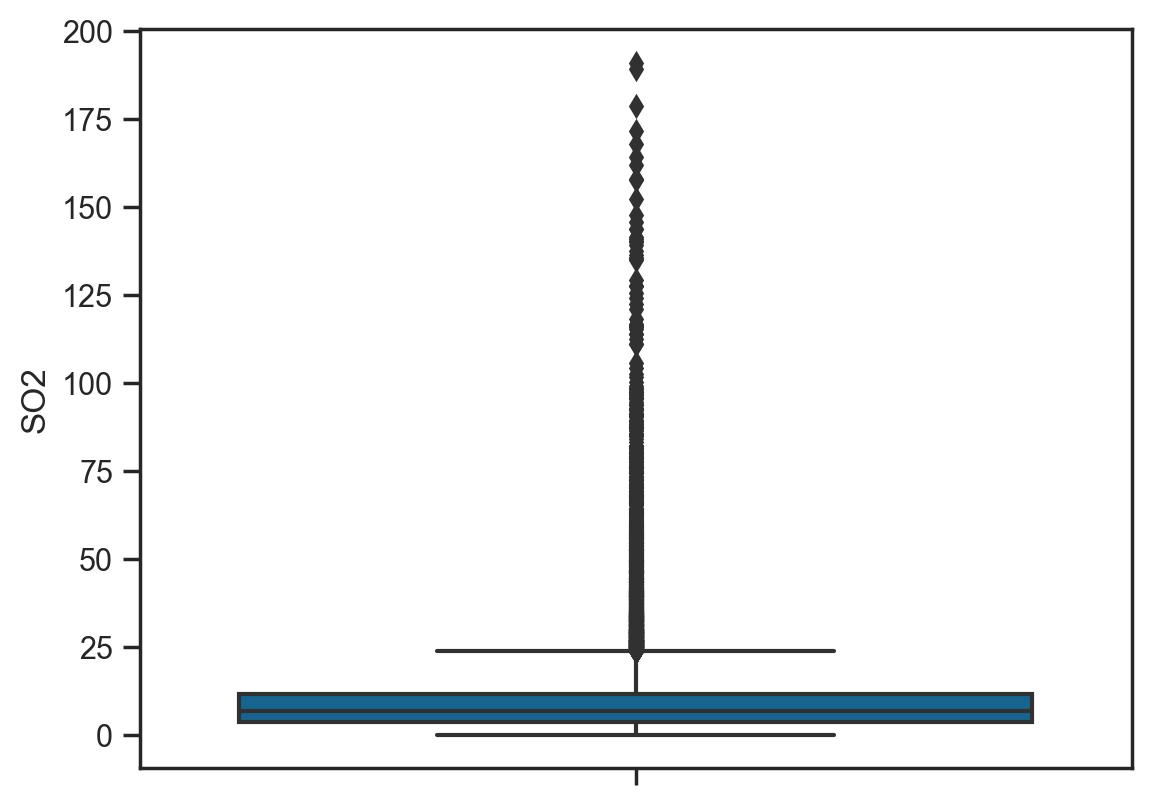

In [85]:
sns.boxplot(data=compiled[107273:],y="SO2")

<AxesSubplot: ylabel='SO2'>

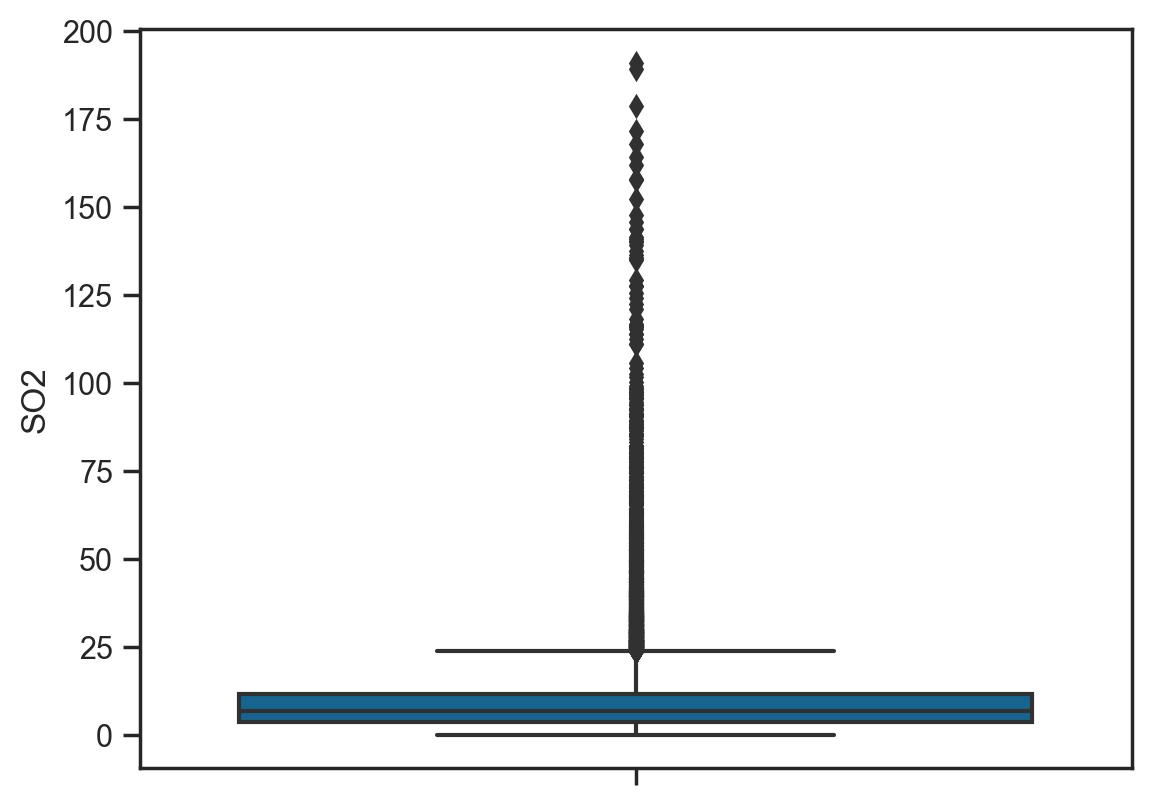

In [86]:
sns.boxplot(data=compiled[107273:],y="SO2")

<AxesSubplot: title={'center': 'SO2'}, xlabel='[Station]'>

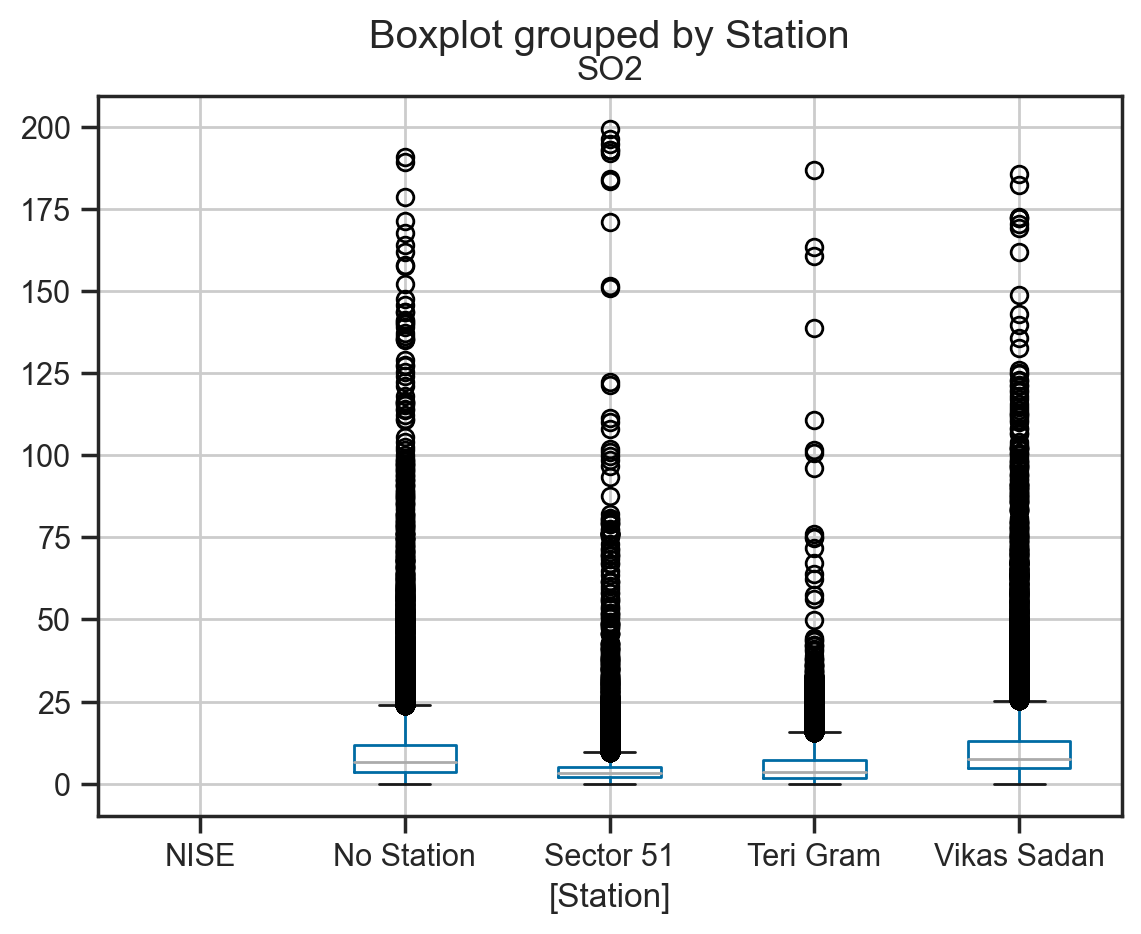

In [87]:
compiled.boxplot(column='SO2', by=['Station'])

In [88]:
# Let's drop >40% columns
temp = compiled.apply(lambda x : round(((x.isnull().sum() + (x=="None").sum())/compiled.shape[0])*100, 2))
temp[temp>40].index

Index(['Toluene', 'Eth-Benzene', 'MP-Xylene', 'O', 'Temp', 'RH', 'WS', 'WD',
       'SR', 'BP', 'VWS', 'Xylene', 'AT', 'RF', 'NH3', 'CO2', 'O3', 'AQI'],
      dtype='object')

In [89]:
compiled.columns.difference(set(['Toluene', 'Eth-Benzene', 'MP-Xylene', 'O', 'Temp', 'RH', 'WS', 'WD',
       'SR', 'BP', 'VWS', 'Xylene', 'AT', 'RF', 'NH3', 'CO2', 'O3']))

# set(['AQI', 'AQI_Bucket', 'Benzene', 'CO', 'Datetime', 'NO', 'NO2', 'NOx', 'Ozone', 'PM10', 'PM2.5', 'SO2', 'Station', 'TOT-RF']).add(set(['Toluene', 'Eth-Benzene', 'MP-Xylene', 'O', 'Temp', 'RH', 'WS', 'WD','SR', 'BP', 'VWS', 'Xylene', 'AT', 'RF', 'NH3', 'CO2', 'O3']))


# compiled.drop(columns = ['Toluene', 'Eth-Benzene', 'MP-Xylene', 'O', 'Temp', 'RH', 'WS', 'WD',
#        'SR', 'BP', 'VWS', 'Xylene', 'AT', 'RF', 'NH3', 'CO2', 'O3'], inplace=True)
compiled

Index(['AQI', 'AQI_Bucket', 'Benzene', 'CO', 'Datetime', 'Day', 'Hour',
       'Month', 'NO', 'NO2', 'NOx', 'Ozone', 'PM10', 'PM2.5', 'SO2', 'Station',
       'TOT-RF', 'Week', 'Year'],
      dtype='object')

Datetime      Station  PM2.5      NO    NO2     NOx    SO2  \
0      2020-03-04 00:00:00  Vikas Sadan  60.92  141.22  61.53  144.62  10.50   
1      2020-03-04 01:00:00  Vikas Sadan  56.88  177.38  56.39  170.94   5.64   
2      2020-03-04 02:00:00  Vikas Sadan  63.33  302.33  40.26  262.69   7.60   
3      2020-03-04 03:00:00  Vikas Sadan  67.60  377.93  29.18  317.53  10.53   
4      2020-03-04 04:00:00  Vikas Sadan  72.72  319.80  33.66  273.25   9.98   
...                    ...          ...    ...     ...    ...     ...    ...   
147526 2020-06-30 20:00:00   No Station  54.74    6.23  10.67   12.60   4.18   
147527 2020-06-30 21:00:00   No Station  54.37    6.30  10.28   11.88   4.03   
147528 2020-06-30 22:00:00   No Station  50.34    6.93  10.36   13.01   6.17   
147529 2020-06-30 23:00:00   No Station  53.23    6.64  10.30   12.75   6.31   
147530 2020-07-01 00:00:00   No Station  61.64    5.99  10.58   12.37   7.57   

          CO  Ozone  Benzene  ...   NH3  CO2     O3    AQI  AQI_Bucket  Day  \
0       3.01   5.08     2.04  ...   NaN  NaN    NaN    NaN         nan    4   
1       5.38   6.15     2.00  ...   NaN  NaN    NaN    NaN         nan    4   
2       1.85  12.72     2.02  ...   NaN  NaN    NaN    NaN         nan    4   
3       1.31  11.46     1.96  ...   NaN  NaN    NaN    NaN         nan    4   
4       0.63   4.76     2.01  ...   NaN  NaN    NaN    NaN         nan    4   
...      ...    ...      ...  ...   ...  ...    ...    ...         ...  ...   
147526  0.60    NaN     2.14  ...  2.95  NaN  70.95  154.0    Moderate   30   
147527  1.20    NaN     1.87  ...  3.47  NaN  55.13  154.0    Moderate   30   
147528  1.00    NaN     2.41  ...  3.76  NaN  42.60  155.0    Moderate   30   
147529  0.86    NaN     2.54  ...  3.36  NaN  35.61  156.0    Moderate   30   
147530  1.11    NaN     2.67  ...  2.91  NaN  44.14  157.0    Moderate    1   

        Month  Year  Week  Hour  
0           3  2020    10     0  
1           3  2020    10     1  
2           3  2020    10     2  
3           3  2020    10     3  
4           3  2020    10     4  
...       ...   ...   ...   ...  
147526      6  2020    27    20  
147527      6  2020    27    21  
147528      6  2020    27    22  
147529      6  2020    27    23  
147530      7  2020    27     0  

[147531 rows x 36 columns]

In [90]:
compiled.groupby(['Station']).apply(lambda x : ((x.isnull().sum() + (x=="None").sum())/compiled.shape[0])*100 ).T

Station           NISE  No Station  Sector 51  Teri Gram  Vikas Sadan
Datetime      0.000000    0.000000   0.000000   0.000000     0.000000
Station       0.000000    0.000000   0.000000   0.000000     0.000000
PM2.5         2.139211    4.164548   0.825589   1.153656     3.414198
NO            1.452576    4.572598   1.450543   1.026903     3.320658
NO2           1.451898    4.104222   0.886593   1.033003     3.313880
NOx           1.449187    8.609716   0.288075   0.182335     3.240675
SO2          18.176519    5.859785   0.496845   1.512225     3.776156
CO            1.455965    3.499603   0.210803   0.157933     3.286767
Ozone         1.411907   27.287824   0.487355   0.452108     3.980180
Benzene      18.176519    8.596837   7.460805   0.289431     3.105110
Toluene      18.176519   11.213237   7.479106   0.294175     3.102399
Eth-Benzene  18.176519   27.287824   9.435305   0.791020     3.239997
MP-Xylene    18.176519   27.287824   0.515146   0.981489     3.239319
O            18.176519   27.287824  18.182619  18.176519     3.117989
Temp         18.176519   27.287824  18.182619  18.176519     3.113922
RH           18.176519   27.287824   1.066217   0.694769     3.116633
WS           18.176519   27.287824   0.225715   0.412795    18.176519
WD           18.176519   27.287824   7.386922   0.410761     3.115955
SR           18.176519   27.287824   3.888674  10.431028     3.115277
BP           18.176519   27.287824  18.182619  18.176519     3.389118
VWS          18.176519   27.287824  18.182619  18.176519     3.115277
Xylene       18.176519   25.378395   9.345832   3.979503     3.102399
AT           18.176519   27.287824   0.742895   0.742217    18.176519
RF           18.164318   27.287824   0.146410  18.047732     8.015942
TOT-RF        0.000000   27.287824   0.000000   0.000000     0.000000
PM10          1.995513   16.069843   0.906250   1.055371    18.176519
NH3          18.176519   25.442788   0.891338   2.956667    18.176519
CO2          18.176519   27.287824  18.182619  18.176519    18.176519
O3           18.176519    3.704306  18.182619  18.176519    18.176519
AQI          18.176519    4.634958  18.182619  18.176519    18.176519
AQI_Bucket    0.000000    0.000000   0.000000   0.000000     0.000000
Day           0.000000    0.000000   0.000000   0.000000     0.000000
Month         0.000000    0.000000   0.000000   0.000000     0.000000
Year          0.000000    0.000000   0.000000   0.000000     0.000000
Week          0.000000    0.000000   0.000000   0.000000     0.000000
Hour          0.000000    0.000000   0.000000   0.000000     0.000000

In [91]:
px.bar(compiled.groupby(['Station']).apply(lambda x : round(((x.isnull().sum() + (x=="None").sum())/compiled.shape[0])*100, 2) ).T, text_auto=True)

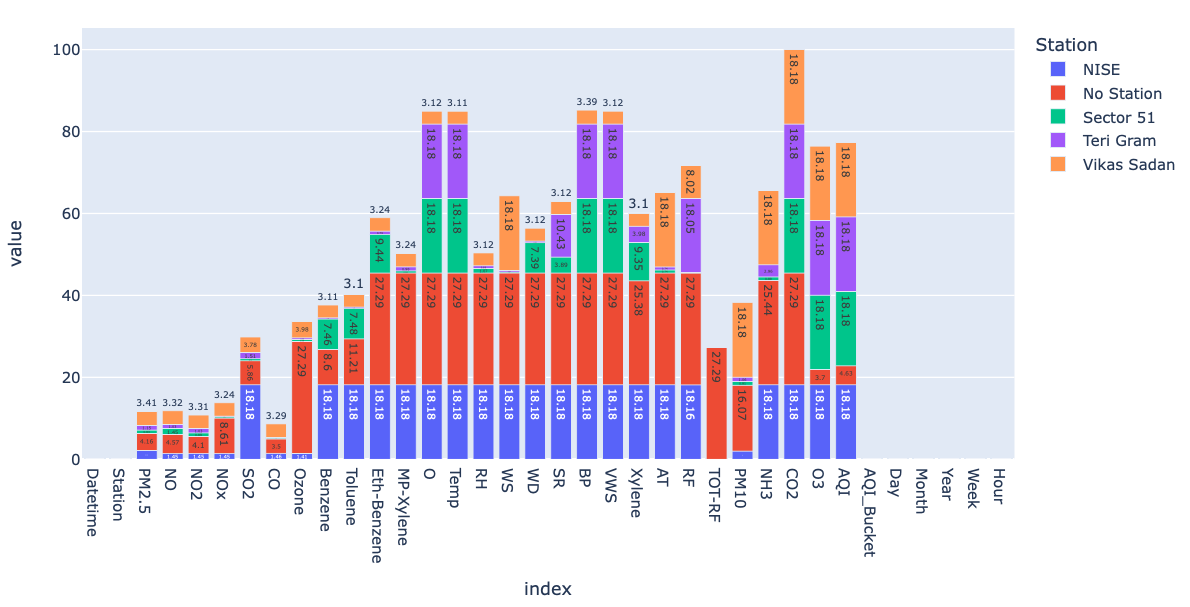

In [92]:
# AQI and bucket can be computed
['Toluene', 'Eth-Benzene', 'MP-Xylene', 'O', 'Temp', 'RH', 'WS', 'WD',
       'SR', 'BP', 'VWS', 'Xylene', 'AT', 'RF', 'NH3', 'CO2', 'O3']
compiled.columns

['Toluene',
 'Eth-Benzene',
 'MP-Xylene',
 'O',
 'Temp',
 'RH',
 'WS',
 'WD',
 'SR',
 'BP',
 'VWS',
 'Xylene',
 'AT',
 'RF',
 'NH3',
 'CO2',
 'O3']

Index(['Datetime', 'Station', 'PM2.5', 'NO', 'NO2', 'NOx', 'SO2', 'CO',
       'Ozone', 'Benzene', 'Toluene', 'Eth-Benzene', 'MP-Xylene', 'O', 'Temp',
       'RH', 'WS', 'WD', 'SR', 'BP', 'VWS', 'Xylene', 'AT', 'RF', 'TOT-RF',
       'PM10', 'NH3', 'CO2', 'O3', 'AQI', 'AQI_Bucket', 'Day', 'Month', 'Year',
       'Week', 'Hour'],
      dtype='object')

In [94]:
compiled

Datetime      Station  PM2.5      NO    NO2     NOx    SO2  \
0      2020-03-04 00:00:00  Vikas Sadan  60.92  141.22  61.53  144.62  10.50   
1      2020-03-04 01:00:00  Vikas Sadan  56.88  177.38  56.39  170.94   5.64   
2      2020-03-04 02:00:00  Vikas Sadan  63.33  302.33  40.26  262.69   7.60   
3      2020-03-04 03:00:00  Vikas Sadan  67.60  377.93  29.18  317.53  10.53   
4      2020-03-04 04:00:00  Vikas Sadan  72.72  319.80  33.66  273.25   9.98   
...                    ...          ...    ...     ...    ...     ...    ...   
147526 2020-06-30 20:00:00   No Station  54.74    6.23  10.67   12.60   4.18   
147527 2020-06-30 21:00:00   No Station  54.37    6.30  10.28   11.88   4.03   
147528 2020-06-30 22:00:00   No Station  50.34    6.93  10.36   13.01   6.17   
147529 2020-06-30 23:00:00   No Station  53.23    6.64  10.30   12.75   6.31   
147530 2020-07-01 00:00:00   No Station  61.64    5.99  10.58   12.37   7.57   

          CO  Ozone  Benzene  ...   NH3  CO2     O3    AQI  AQI_Bucket  Day  \
0       3.01   5.08     2.04  ...   NaN  NaN    NaN    NaN         nan    4   
1       5.38   6.15     2.00  ...   NaN  NaN    NaN    NaN         nan    4   
2       1.85  12.72     2.02  ...   NaN  NaN    NaN    NaN         nan    4   
3       1.31  11.46     1.96  ...   NaN  NaN    NaN    NaN         nan    4   
4       0.63   4.76     2.01  ...   NaN  NaN    NaN    NaN         nan    4   
...      ...    ...      ...  ...   ...  ...    ...    ...         ...  ...   
147526  0.60    NaN     2.14  ...  2.95  NaN  70.95  154.0    Moderate   30   
147527  1.20    NaN     1.87  ...  3.47  NaN  55.13  154.0    Moderate   30   
147528  1.00    NaN     2.41  ...  3.76  NaN  42.60  155.0    Moderate   30   
147529  0.86    NaN     2.54  ...  3.36  NaN  35.61  156.0    Moderate   30   
147530  1.11    NaN     2.67  ...  2.91  NaN  44.14  157.0    Moderate    1   

        Month  Year  Week  Hour  
0           3  2020    10     0  
1           3  2020    10     1  
2           3  2020    10     2  
3           3  2020    10     3  
4           3  2020    10     4  
...       ...   ...   ...   ...  
147526      6  2020    27    20  
147527      6  2020    27    21  
147528      6  2020    27    22  
147529      6  2020    27    23  
147530      7  2020    27     0  

[147531 rows x 36 columns]

In [93]:
# compiled.to_csv('../../data/preprocessing_data/compiled_part_1_end.csv')

# End of part 1